In [1]:
from class_separated_fp_explotimin import *
from scipy.integrate import quad
from scipy.special import binom
from scipy.integrate import simps
import matplotlib.patches as patches
import sys
import os
import requests
import json
from collections import OrderedDict

In [2]:
from astropy.coordinates import SkyCoord  # High-level coordinates
import sfdmap 
from PyAstronomy import pyasl

In [3]:
from matplotlib import rc

rc('font', **{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18



In [4]:
%matplotlib notebook

How to navigate this notebook: 


cmd+f if you want to find the following chapters: 

- 2d Subsample : Weak VS Strong Flasher count 
- Bias checks
- Overall check
- Building table
- Looking at K corrections

# Overall check

In [42]:






# table_infants  = ascii.read('/Users/r.saturn/PhD/WIP/Full_RISNeII_ZTF1/tables/RISNeIIfull_radeczeztexpflash_22122021.csv')
table_infants  = ascii.read('/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/tables/RISNeIIfull_radeczeztexpflashpeakclimb_15022022.csv')



In [7]:
table_infants.show_in_notebook()

idx,name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
0,ZTF18aaaibml,SN II,yes,SN II,2458881.872,2458880.921,2458891.515,SPRAT+LT,0.9508,10.594581,152.130328,9.2397339,0.034811,8e-05,2004SDSS3.C...0000:,--,--,no,yes,--,yes,2458898.904,LRIS+Keck,-0.4755000002,0.4754999999,2458881.397,10.1185,-17.972205285811885,0.00499031684820109,7.224256843025815,0.4760399343551046,-17.92291509886801,0.009245297976064092,13.198895852111104,0.5541040958619545,0.00771152107023726,0.0008224652071251661,0.031396472927404204,0.002975786386002807,99.0,99.0
1,ZTF18aadsuxd,SN II,no,SN II,2459155.965,2459154.018,2459156.939,SEDm+P60,1.9473,2.9204556,129.533971,31.667916,0.03114,3.2e-05,2004SDSS3.C...0000:,--,--,no,yes,--,yes?,2459163.882,SEDm+P60,-1.947000531,0.007045661888,2459154.018,2.92100053,-18.87616004634321,0.009411289147476442,17.275924560467757,1.0318745015716895,-19.01666988979831,0.01815331876476588,13.73982016524336,0.5498689150688045,0.03949195782351208,0.0016698698982383943,0.04223818320891067,0.0019924162251121653,12.239580380239499,11.894827269608745
2,ZTF18aahrzrb,SN II,no,SN II,2458217.74,2458216.74,2458251.817,LMI+DCT,1.0006,35.0804602,181.397225,34.3888042,0.04026899074,0.0005778185694,meas,2458251.817,LMI+DCT,no,yes,--,yes,2458251.817,LMI+DCT,-0.1592113868,0.04425250139,2458217.581,34.23621139,-17.201962480158187,0.03126146524580276,15.302622532812576,0.359265703802474,99.0,99.0,99.0,99.0,0.0013446238248692212,0.0016132936044630569,99.0,99.0,99.0,99.0
3,ZTF18aapifti,SN II,no,SN IIP,2458233.678,2458231.687,2458249.717,SEDm+P60,1.9909607,18.0300544,177.017646,30.3600716,0.021013,0.000168,2007SDSS6.C...0000:,--,--,no,yes,Sbc,yes,2458249.72,SEDm+P60,-2.844497657,0.001832241529,2458230.834,18.88349766,-16.367641261286963,0.01736103260473442,17.36134069054772,0.06039931036528287,-16.102712550234653,0.017407329390092676,9.595894973169841,0.05984218024549288,0.002096263946603315,0.0021424391638590894,0.021298900214770954,0.004127680063188465,99.0,99.0
4,ZTF18aaqkoyr,SN II,no,SN IIP,2458243.685,2458242.65,2458245.684,DBSP+P200,1.0358565,3.03460143,166.066683,50.0306395,0.023956,1.6e-05,2016SDSSD.C...0000:,--,--,no,yes,notype,yes,2458246.88,SEDm+P60,-0.9090126206,0.1982242048,2458242.776,2.90801262,-17.345983780206705,0.0037485696643061294,17.635057666448567,0.7831879602660898,-17.34481290626891,0.003969969781832504,6.844667835030683,0.29828813960336764,0.00829260809206087,0.001571683373578605,0.026508087826448524,0.001201953768752765,11.335448812451904,5.654246023831865
5,ZTF18aarpttw,SN II,no,SN II,2458246.822,2458244.849,2458249.0,DIS+APO,1.9726851,4.05030035,247.259916,43.6268251,0.04726910716,0.0003801703492,meas,2458248.9,DIS+APO,no,yes,--,yes,2458286.0,DBSP+P200,-0.01023141312,0.001126958025,2458246.812,2.18823141,-17.95149602644325,0.020632667603988228,8.066497964988958,0.7782702642145058,-17.94899599651717,0.01919722584691977,5.644725181571605,0.09262100790241808,99.0,99.0,99.0,99.0,99.0,99.0
6,ZTF18aatlfus,SN II,no,SN IIP,2458249.858,2458247.941,2458255.824,SEDm+P60,1.9171875,7.88367828,257.176414,28.5206041,0.045089,7e-06,2016SDSSD.C...0000:,--,--,no,yes,notype,yes?,2458256.81,SEDm+P60,-0.9584999997,0.9584999999,2458248.9,6.9245,-18.43491354019985,0.0044253010643659765,6.274041648483513,1.009860526965394,-18.494639435762195,0.008902402352272477,4.787776886446052,0.9809863969095557,0.030063443865656066,0.0018975469012159976,0.05326100665548559,0.0024020250257157615,99.0,99.0
7,ZTF18aavpady,SN II,no,SN IIL,2458256.93,2458255.976,2458312.0,LRIS+Keck,0.9544676,56.1245487,273.003116,44.3601877,0.04660782846,0.0002431166127,meas,2458312.105,L

In [7]:
ascii.write(table_infants['name','redshift'], '/Users/r.saturn/real_infants_hrich_ztf1_namez.ascii')

In [5]:
np.unique(table_infants['rach-classification'])

SN II
SN II-bump
SN II-pec
SN IIb
SN IIn


In [6]:
# table_infants.colnames

In [6]:
TNS                 = "www.wis-tns.org"
url_tns_api         = "https://" + TNS + "/api/get"

TNS_BOT_ID          = 59863
TNS_BOT_NAME        = "ePESSTOplus_Bot1"
TNS_API_KEY         = "49a56d2a2c94d87b434dc2d4c23a800e7c046419"


def get_iauname(candiname):
    '''
    This function fetched the IAU name from the TNS
    
    parameters
    ----------
    candiname [string]  internal name you want to query for the IAU name 
    
    returns
    -------
    IAU name [string]
    
    
    '''

    search_obj          = [("ra", ""), ("dec", ""), ("radius", ""), ("units", ""), 
                               ("objname", ""), ("objname_exact_match", 0), ("internal_name", candiname), 
                               ("internal_name_exact_match", 0), ("objid", ""), ("public_timestamp", "")]
    
    
    
    
    
    search_url  = url_tns_api + "/search"
    
    tns_marker  = 'tns_marker{"tns_id": "' + str(TNS_BOT_ID) + '", "type": "bot", "name": "' + TNS_BOT_NAME + '"}'
    
    headers     = {'User-Agent': tns_marker}
    
    json_file   = OrderedDict(search_obj)
    
    search_data = {'api_key': TNS_API_KEY, 'data': json.dumps(json_file)}
    
    response    = requests.post(search_url, headers = headers, data = search_data)
    
    
    jason   = response.json()
    
    iauname  = jason['data']['reply'][0]['objname']
    
#     iauname = retour['objname']

    return iauname
    
    
    
def get_object_from_internalname(candiname):
    '''
    This function fetched the IAU name from the TNS
    
    parameters
    ----------
    candiname [string]  internal name you want to query for the IAU name 
    
    returns
    -------
    IAU name [string]
    
    
    '''

    search_obj          = [("ra", ""), ("dec", ""), ("radius", ""), ("units", ""), 
                               ("objname", ""), ("objname_exact_match", 0), ("internal_name", candiname), 
                               ("internal_name_exact_match", 0), ("objid", ""), ("public_timestamp", "")]
    
    
    
    
    
    search_url  = url_tns_api + "/search"
    
    tns_marker  = 'tns_marker{"tns_id": "' + str(TNS_BOT_ID) + '", "type": "bot", "name": "' + TNS_BOT_NAME + '"}'
    
    headers     = {'User-Agent': tns_marker}
    
    json_file   = OrderedDict(search_obj)
    
    search_data = {'api_key': TNS_API_KEY, 'data': json.dumps(json_file)}
    
    response    = requests.post(search_url, headers = headers, data = search_data)
    
    
    jason   = response.json()

    return jason

In [8]:
# IAUnames = []
# non_existent = []

# for candiname in table_infants['name']:
    
#     try:
#         _temp = get_iauname(candiname)
#         IAUnames.append(_temp)
#     except IndexError:
#         non_existent.append(candiname)
#     except KeyError:
#         non_existent.append(candiname)
        
    

In [7]:
iaunames = ascii.read('iaunames.csv', delimiter = ',')

In [8]:
iaunames

internal_name,objid,name_prefix,iauname,type,redshift
str12,int64,str2,str8,str6,str8
ZTF18aaaibml,53664,SN,2020buc,SN II,0.0348
ZTF18aadsuxd,70268,AT,2020yui,NULL,NULL
ZTF18aahrzrb,26267,AT,2018bjh,NULL,NULL
ZTF18aapifti,26123,SN,2018bdv,SN IIP,0.0216
ZTF18aaqkoyr,26185,SN,2018bge,SN II,0.023894
ZTF18aarpttw,26524,SN,2018bqs,SN II,0.047
ZTF18aatlfus,27086,SN,2018clq,SN IIP,0.0451
ZTF18aavpady,26920,SN,2018cfj,SN II,0.047
ZTF18aawyjjq,26843,SN,2018ccp,SN II,0.04


## Now reported transients 

- 'ZTF18aaxwrjt', - done 2018mdx
- 'ZTF18aaymsbe',- done 2018mdy
- 'ZTF18abcqhgr',- done 2018mdz
- 'ZTF18abeewyu',- already existed 2018egj
- 'ZTF18abeteea',- already existed 2018dzo
- 'ZTF18abgxjie',- already existed 2018mbn
- 'ZTF19abmouqp',- already existed 2019pdm
- 'ZTF19abmxtrm',- done 2019aaqx
- 'ZTF20abojbrd',- already existed 2020pvg
- 'ZTF20abqwkxs' - done 2020afdi

In [9]:
earlier_detec = ['ZTF18aavpady', 'ZTF18aawyjjq', 'ZTF18abcfdzu', 'ZTF18abcezmh', 'ZTF18abckutn', 'ZTF18abcptmt', 'ZTF18abddjpt', 'ZTF18abojpnr', 'ZTF18abokyfk', 'ZTF18abqyvzy', 'ZTF18abrlljc', 'ZTF18abufaej', 'ZTF18abtswjk', 'ZTF18abvvmdf', 'ZTF18acnmifq', 'ZTF18acploez', 'ZTF19aamtwiz', 'ZTF19aatqzim', 'ZTF19aatqzrb', 'ZTF19aavbjfp', 'ZTF19aaymhay', 'ZTF19abjioie', 'ZTF19abgpgyp', 'ZTF19abmxtrm', 'ZTF19abmouqp', 'ZTF19abpidqn', 'ZTF19abpyqog', 'ZTF19abrbmvt', 'ZTF19abulzhy', 'ZTF19abulrfa', 'ZTF19abyuzch', 'ZTF19accbeju', 'ZTF19aceqlxc', 'ZTF19acgzzea', 'ZTF19actnwtn', 'ZTF20aaczkyw', 'ZTF20aahapgw', 'ZTF20aavvaup', 'ZTF20abbeoaa', 'ZTF20abjuxoy', 'ZTF20ablklei', 'ZTF20abmihnc', 'ZTF20abojbrd', 'ZTF20aburywx', 'ZTF20abykfsr', 'ZTF20acedqis', 'ZTF20acfdmex', 'ZTF20aceyolc', 'ZTF20acgided', 'ZTF20acgiglu', 'ZTF20acklcyp', 'ZTF20acocohy', 'ZTF20acpevli']
iau_earl_det  = []

for name in earlier_detec:
    _temp = iaunames[iaunames['internal_name'] == name]
    if len(_temp)>0:
        iau_earl_det.append(_temp['iauname'][0])
    if len(_temp)==0:
        iau_earl_det.append('NULL')
    

In [10]:
eardet = Table(data=([earlier_detec,iau_earl_det]), dtype=('S20', 'S20'))
# eardet.show_in_notebook()

In [11]:
for i in range(len(eardet['col0'])):
    
    if eardet['col0'][i] =='ZTF18aaxwrjt':
        eardet['col1'][i] = '2018mdx'
        
    if eardet['col0'][i] =='ZTF18aaymsbe':
        eardet['col1'][i] = '2018mdy'
        
    if eardet['col0'][i] =='ZTF18abcqhgr':
        eardet['col1'][i] = 'ZTF18abeteea'
        
    if eardet['col0'][i] =='ZTF18abeewyu':
        eardet['col1'][i] = '2018egj'
        
    if eardet['col0'][i] =='ZTF18abeteea':
        eardet['col1'][i] = '2018dzo'
        
    if eardet['col0'][i] =='ZTF18abgxjie':
        eardet['col1'][i] = '2018mbn'
        
    if eardet['col0'][i] =='ZTF19abmouqp':
        eardet['col1'][i] = '2019pdm'
        
    if eardet['col0'][i] =='ZTF19abmxtrm':
        eardet['col1'][i] = '2019aaqx'
        
    if eardet['col0'][i] =='ZTF20abojbrd':
        eardet['col1'][i] = '2020pvg'
        
    if eardet['col0'][i] =='ZTF20abqwkxs':
        eardet['col1'][i] = '2020afdi'
    
    if eardet['col0'][i] =='ZTF19abulrfa':
        eardet['col1'][i] = '2019ozf'
    
    if eardet['col0'][i] =='ZTF20aburywx':
        eardet['col1'][i] = '2020rsc'
        
        
        

In [14]:
list(eardet['col1'])

['2018cfj',
 '2018ccp',
 '2018dfa',
 '2018cyh',
 '2018cxn',
 '2018cug',
 '2018lti',
 '2018fzn',
 '2018fif',
 '2018fpb',
 '2018fso',
 '2018iwe',
 '2018gfx',
 '2018gts',
 '2018iug',
 '2018iua',
 '2019cem',
 '2019eoh',
 '2019ewb',
 '2019fkl',
 '2019hln',
 '2019mge',
 '2019lkw',
 '2019aaqx',
 '2019pdm',
 '2019njv',
 '2019oba',
 '2019oot',
 '2019pgu',
 '2019ozf',
 '2019qch',
 '2019rsw',
 '2019smj',
 '2019tbq',
 '2019vdl',
 '2020ks',
 '2020cnv',
 '2020iez',
 '2020lcc',
 '2020oco',
 '2020ovk',
 '2020pnn',
 '2020pvg',
 '2020rsc',
 '2020smm',
 '2020ufx',
 '2020uim',
 '2020uhf',
 '2020uqx',
 '2020urc',
 '2020xkx',
 '2020ykb',
 '2020yyo']

In [15]:
faulty_explotime = ['ZTF18aaaibml', 'ZTF18aatlfus', 'ZTF18abffyqp', 'ZTF18acploez', 'ZTF18acqwdla', 'ZTF18acqxyiq', 'ZTF19aapafqd', 'ZTF19aatesgp', 'ZTF19aavbjfp', 'ZTF19aavbkly', 'ZTF19abegizf','ZTF19abjioie', 'ZTF19abjsmmv', 'ZTF19abmxtrm', 'ZTF19abrbmvt','ZTF19abuzinv', 'ZTF19acctwpz', 'ZTF19aceqlxc', 'ZTF19actnwtn','ZTF20aahapgw', 'ZTF20aarbvub', 'ZTF20aasijew', 'ZTF20aayrobw', 'ZTF20aazpphd', 'ZTF20abojbrd', 'ZTF20abqferm', 'ZTF20abqkaoc', 'ZTF20abrmbdl', 'ZTF20abupxie', 'ZTF20abwftit', 'ZTF20abwzqzo', 'ZTF20abybeex', 'ZTF20abywoaa', 'ZTF20acfkyll', 'ZTF20acfkzcg', 'ZTF20acgiglu', 'ZTF20acklcyp']

iau_faulty_explotime  = []

for name in faulty_explotime:
    _temp = iaunames[iaunames['internal_name'] == name]
    if len(_temp)>0:
        iau_faulty_explotime.append(_temp['iauname'][0])
    if len(_temp)==0:
        iau_faulty_explotime.append('NULL')
iau_faulty_explotime

['2020buc',
 '2018clq',
 '2018dfi',
 '2018iua',
 '2018iuq',
 '2018jak',
 '2019dvw',
 '2019ehk',
 '2019fkl',
 '2019fmv',
 '2019kes',
 '2019mge',
 '2019mor',
 'NULL',
 '2019oot',
 '2019pkh',
 '2019rwd',
 '2019smj',
 '2019vdl',
 '2020cnv',
 '2020drl',
 '2020dya',
 '2020jmb',
 '2020jww',
 'NULL',
 '2020rhg',
 '2020qvw',
 '2020rfs',
 '2020rth',
 '2020sfy',
 '2020sbw',
 '2020sjv',
 '2020sur',
 '2020ult',
 '2020umi',
 '2020urc',
 '2020xkx']

In [17]:
faultyexplotable = Table(data=([faulty_explotime,iau_faulty_explotime]), dtype=('S20', 'S20'))
faultyexplotable.show_in_notebook()

idx,col0,col1
0,ZTF18aaaibml,2020buc
1,ZTF18aatlfus,2018clq
2,ZTF18abffyqp,2018dfi
3,ZTF18acploez,2018iua
4,ZTF18acqwdla,2018iuq
5,ZTF18acqxyiq,2018jak
6,ZTF19aapafqd,2019dvw
7,ZTF19aatesgp,2019ehk
8,ZTF19aavbjfp,2019fkl
9,ZTF19aavbkly,2019fmv


In [18]:
for i in range(len(faultyexplotable['col0'])):
    
    if faultyexplotable['col0'][i] =='ZTF19abmxtrm':
        faultyexplotable['col1'][i] = '2019aaqx'
        
    if faultyexplotable['col0'][i] =='ZTF20abojbrd':
        faultyexplotable['col1'][i] = '2020pvg'
        
 
        

In [19]:
list(faultyexplotable['col1'])

['2020buc',
 '2018clq',
 '2018dfi',
 '2018iua',
 '2018iuq',
 '2018jak',
 '2019dvw',
 '2019ehk',
 '2019fkl',
 '2019fmv',
 '2019kes',
 '2019mge',
 '2019mor',
 '2019aaqx',
 '2019oot',
 '2019pkh',
 '2019rwd',
 '2019smj',
 '2019vdl',
 '2020cnv',
 '2020drl',
 '2020dya',
 '2020jmb',
 '2020jww',
 '2020pvg',
 '2020rhg',
 '2020qvw',
 '2020rfs',
 '2020rth',
 '2020sfy',
 '2020sbw',
 '2020sjv',
 '2020sur',
 '2020ult',
 '2020umi',
 '2020urc',
 '2020xkx']

In [11]:
IAU_column = []


for candi in table_infants['name']:
    
    _temp = iaunames[iaunames['internal_name'] == candi]
    if len(_temp)>0:
        IAU_column.append(_temp['iauname'][0])
    if len(_temp)==0:
        IAU_column.append('NULL')

In [12]:
IAU_column

['2020buc',
 '2020yui',
 '2018bjh',
 '2018bdv',
 '2018bge',
 '2018bqs',
 '2018clq',
 '2018cfj',
 '2018ccp',
 'NULL',
 'NULL',
 '2018lth',
 '2018cyh',
 '2018dfa',
 '2018cxn',
 '2018cug',
 'NULL',
 '2018cyg',
 '2018lti',
 '2018dfc',
 'NULL',
 'NULL',
 '2018dfi',
 '2018egh',
 '2018efd',
 'NULL',
 '2018efj',
 '2018fzn',
 '2018fif',
 '2018fpb',
 '2018fso',
 '2018fsm',
 '2018gfx',
 '2018iwe',
 '2018gts',
 '2018grf',
 '2018gvn',
 '2018inm',
 '2018iug',
 '2018iua',
 '2018iuq',
 '2018jak',
 '2018leh',
 '2019cem',
 '2019dvw',
 '2019dlo',
 '2019dky',
 '2019dwf',
 '2019ehk',
 '2019eoh',
 '2019ewb',
 '2019fkl',
 '2019fmv',
 '2019gmh',
 '2019jhe',
 '2019hln',
 '2019ikb',
 '2019kes',
 '2019lkw',
 '2019lnl',
 '2019mge',
 '2019mkr',
 '2019mor',
 'NULL',
 'NULL',
 '2019njv',
 '2019oba',
 '2019nvm',
 '2019odf',
 '2019oot',
 '2019omp',
 '2019oxn',
 '2019pgu',
 '2019pkh',
 '2019qch',
 '2019rsw',
 '2019rwd',
 '2019smj',
 '2019ssi',
 '2019szo',
 '2019tbq',
 '2019tjt',
 '2019twk',
 '2019ust',
 '2019vdl',
 '20

In [13]:
table_infants['IAUnames'] = IAU_column

In [14]:
table_infants.show_in_notebook()

idx,name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g,IAUnames
0,ZTF18aaaibml,SN II,yes,SN II,2458881.872,2458880.921,2458891.515,SPRAT+LT,0.9508,10.594581,152.130328,9.2397339,0.034811,8e-05,2004SDSS3.C...0000:,--,--,no,yes,--,yes,2458898.904,LRIS+Keck,-0.4755000002,0.4754999999,2458881.397,10.1185,-17.972205285811885,0.00499031684820109,7.224256843025815,0.4760399343551046,-17.92291509886801,0.009245297976064092,13.198895852111104,0.5541040958619545,0.00771152107023726,0.0008224652071251661,0.031396472927404204,0.002975786386002807,99.0,99.0,2020buc
1,ZTF18aadsuxd,SN II,no,SN II,2459155.965,2459154.018,2459156.939,SEDm+P60,1.9473,2.9204556,129.533971,31.667916,0.03114,3.2e-05,2004SDSS3.C...0000:,--,--,no,yes,--,yes?,2459163.882,SEDm+P60,-1.947000531,0.007045661888,2459154.018,2.92100053,-18.87616004634321,0.009411289147476442,17.275924560467757,1.0318745015716895,-19.01666988979831,0.01815331876476588,13.73982016524336,0.5498689150688045,0.03949195782351208,0.0016698698982383943,0.04223818320891067,0.0019924162251121653,12.239580380239499,11.894827269608745,2020yui
2,ZTF18aahrzrb,SN II,no,SN II,2458217.74,2458216.74,2458251.817,LMI+DCT,1.0006,35.0804602,181.397225,34.3888042,0.04026899074,0.0005778185694,meas,2458251.817,LMI+DCT,no,yes,--,yes,2458251.817,LMI+DCT,-0.1592113868,0.04425250139,2458217.581,34.23621139,-17.201962480158187,0.03126146524580276,15.302622532812576,0.359265703802474,99.0,99.0,99.0,99.0,0.0013446238248692212,0.0016132936044630569,99.0,99.0,99.0,99.0,2018bjh
3,ZTF18aapifti,SN II,no,SN IIP,2458233.678,2458231.687,2458249.717,SEDm+P60,1.9909607,18.0300544,177.017646,30.3600716,0.021013,0.000168,2007SDSS6.C...0000:,--,--,no,yes,Sbc,yes,2458249.72,SEDm+P60,-2.844497657,0.001832241529,2458230.834,18.88349766,-16.367641261286963,0.01736103260473442,17.36134069054772,0.06039931036528287,-16.102712550234653,0.017407329390092676,9.595894973169841,0.05984218024549288,0.002096263946603315,0.0021424391638590894,0.021298900214770954,0.004127680063188465,99.0,99.0,2018bdv
4,ZTF18aaqkoyr,SN II,no,SN IIP,2458243.685,2458242.65,2458245.684,DBSP+P200,1.0358565,3.03460143,166.066683,50.0306395,0.023956,1.6e-05,2016SDSSD.C...0000:,--,--,no,yes,notype,yes,2458246.88,SEDm+P60,-0.9090126206,0.1982242048,2458242.776,2.90801262,-17.345983780206705,0.0037485696643061294,17.635057666448567,0.7831879602660898,-17.34481290626891,0.003969969781832504,6.844667835030683,0.29828813960336764,0.00829260809206087,0.001571683373578605,0.026508087826448524,0.001201953768752765,11.335448812451904,5.654246023831865,2018bge
5,ZTF18aarpttw,SN II,no,SN II,2458246.822,2458244.849,2458249.0,DIS+APO,1.9726851,4.05030035,247.259916,43.6268251,0.04726910716,0.0003801703492,meas,2458248.9,DIS+APO,no,yes,--,yes,2458286.0,DBSP+P200,-0.01023141312,0.001126958025,2458246.812,2.18823141,-17.95149602644325,0.020632667603988228,8.066497964988958,0.7782702642145058,-17.94899599651717,0.01919722584691977,5.644725181571605,0.09262100790241808,99.0,99.0,99.0,99.0,99.0,99.0,2018bqs
6,ZTF18aatlfus,SN II,no,SN IIP,2458249.858,2458247.941,2458255.824,SEDm+P60,1.9171875,7.88367828,257.176414,28.5206041,0.045089,7e-06,2016SDSSD.C...0000:,--,--,no,yes,notype,yes?,2458256.81,SEDm+P60,-0.9584999997,0.9584999999,2458248.9,6.9245,-18.43491354019985,0.0044253010643659765,6.274041648483513,1.009860526965394,-18.494639435762195,0.008902402352272477,4.787776886446052,0.9809863969095557,0.030063443865656066,0.0018975469012159976,0.05326100665548559,0.0024020250257157615,99.0,99.0,2018clq
7,ZTF18aavpady,SN II,no,SN IIL,2458256.93,2458255.976,2458312.0,LRIS+Keck,0.9544676,56.1245487,273.0

### Need to separate those which need classification reports and those who need to be reported as SN 

In [14]:
need_report = [x for x in table_infants['name'] if x not in iaunames['internal_name']]

In [15]:
need_report

['ZTF18aaxwrjt',
 'ZTF18aaymsbe',
 'ZTF18abcqhgr',
 'ZTF18abeewyu',
 'ZTF18abeteea',
 'ZTF18abgxjie',
 'ZTF19abmouqp',
 'ZTF19abmxtrm',
 'ZTF20abojbrd',
 'ZTF20abqwkxs']

In [27]:
# table_infants

In [16]:
need_classification = iaunames[iaunames['type']=='NULL']

In [17]:
need_classification

internal_name,objid,name_prefix,iauname,type,redshift
str12,int64,str2,str8,str6,str8
ZTF18aadsuxd,70268,AT,2020yui,NULL,NULL
ZTF18aahrzrb,26267,AT,2018bjh,NULL,NULL
ZTF19aapvltt,36332,AT,2019dlo,NULL,NULL
ZTF19aapygmq,36316,AT,2019dky,NULL,NULL
ZTF19aarfkch,36614,AT,2019dwf,NULL,NULL
ZTF19aatqzrb,37295,AT,2019ewb,NULL,NULL
ZTF19aaxqwjx,40323,AT,2019jhe,NULL,NULL
ZTF19aaymhay,39063,AT,2019hln,NULL,NULL
ZTF20aaczkyw,51823,AT,2020ks,NULL,NULL


In [20]:
table_infants['ND_2_EED'] = table_infants['Last Non Detection'] - table_infants['jd_t_exp']
table_infants['EED_2_FD'] = table_infants['First Detection'] - table_infants['jd_t_exp']

In [21]:
table_infants['jd_t_exp'].info.format = '7.3f'
# table_infants['First Detection'].info.format = '7.2f'
table_infants['ND_2_EED'].info.format = '7.3f'
table_infants['EED_2_FD'].info.format = '7.3f'
# table_infants['t_exp'].info.format = '7.3f'
table_infants['e_t_exp'].info.format = '7.3f'
table_infants['Fs-Texp'].info.format = '7.3f'





In [22]:
II = table_infants[(table_infants['rach-classification']=='SN II')|
                   (table_infants['rach-classification']=='SN II-bump')|
                   (table_infants['rach-classification']=='SN II-pec')]
IIn = table_infants[table_infants['rach-classification']=='SN IIn']
IIb = table_infants[table_infants['rach-classification']=='SN IIb']



In [23]:
II.sort('Fs-Texp')
IIb.sort('Fs-Texp')
IIn.sort('Fs-Texp')

In [24]:
ascii.write(II['IAUnames','name','rach-classification','jd_t_exp','e_t_exp', 'ND_2_EED','EED_2_FD',
                          'ra_med','dec_med', 'Fs-Texp', 'Flasher' ],
            sys.stdout, Writer = ascii.Latex, col_align='|l|',
            latexdict = {'tabletype': 'table*'})

\begin{table*}
\begin{tabular}{|l|}
IAUnames & name & rach-classification & jd_t_exp & e_t_exp & ND_2_EED & EED_2_FD & ra_med & dec_med & Fs-Texp & Flasher \\
2018iuq & ZTF18acqwdla & SN II & 2458443.832 & 0.042 & -0.043 & 0.042 & 106.472662 & 12.8929375 & 0.105 & no \\
2018grf & ZTF18abwlsoi & SN II & 2458377.609 & 0.003 & -0.869 & 0.021 & 261.897614 & 71.530251 & 0.142 & yes \\
2020acbm & ZTF20acwgxhk & SN II & 2459193.562 & 0.030 & -0.850 & 0.125 & 40.0741593 & 2.4270671 & 0.167 & no \\
2019nvm & ZTF19abqhobb & SN II & 2458714.625 & 0.006 & -0.883 & 0.038 & 261.4111 & 59.4467303 & 0.167 & yes \\
2020qvw & ZTF20abqkaoc & SN II & 2459067.290 & 0.490 & -0.490 & 0.490 & 250.983335 & 77.879897 & 0.710 & no \\
2020pni & ZTF20ablygyy & SN II & 2459046.539 & 0.031 & -0.785 & 0.159 & 225.958184 & 42.1140315 & 0.864 & yes \\
2020sic & ZTF20abxyjtx & SN II & 2459093.484 & 0.008 & -1.768 & 0.150 & 236.937978 & 28.6403193 & 0.891 & yes \\
2018cxn & ZTF18abckutn & SN II & 2458289.758 & 0.015 & 0.

In [17]:
ascii.write(IIn['IAUnames','name','rach-classification','jd_t_exp','e_t_exp', 'ND_2_EED','EED_2_FD',
                          'ra_med','dec_med', 'Fs-Texp', 'Flasher'],
            sys.stdout, Writer = ascii.Latex,
            latexdict = {'tabletype': 'table*'})

\begin{table*}
\begin{tabular}{ccccccccccc}
IAUnames & name & rach-classification & jd_t_exp & e_t_exp & ND_2_EED & EED_2_FD & ra_med & dec_med & Fs-Texp & Flasher \\
2019njv & ZTF19abpidqn & SN IIn & 2458707.708 & 0.067 & -0.816 & 0.005 & 304.988297 & 15.3774528 & 1.150 & no \\
2020dcs & ZTF20aaocqkr & SN IIn & 2458895.153 & 0.032 & -0.168 & 0.778 & 183.356159 & 37.6993902 & 2.484 & yes \\
2020rfs & ZTF20abrmbdl & SN IIn & 2459072.375 & 0.445 & -0.445 & 0.445 & 282.303159 & 74.3340239 & 3.125 & no \\
2020uqx & ZTF20acgided & SN IIn & 2459123.544 & 0.049 & -0.800 & 0.153 & 326.826979 & 32.0957996 & 3.143 & no \\
2020xkx & ZTF20acklcyp & SN IIn & 2459137.743 & 1.008 & -1.008 & 1.007 & 350.11738 & 22.9869004 & 7.870 & no \\
2019smj & ZTF19aceqlxc & SN IIn & 2458767.998 & 0.970 & -0.970 & 0.969 & 117.419661 & 5.0742059 & 11.899 & no \\
2019dvw & ZTF19aapafqd & SN IIn & 2458571.416 & 1.512 & -1.513 & 1.512 & 239.944168 & 37.033706 & 15.539 & no \\
2019pgu & ZTF19abulzhy & SN IIn & 2458722.

In [18]:
ascii.write(IIb['IAUnames','name','rach-classification','jd_t_exp','e_t_exp', 'ND_2_EED','EED_2_FD',
                          'ra_med','dec_med', 'Fs-Texp', 'Flasher'],
            sys.stdout, Writer = ascii.Latex,
            latexdict = {'tabletype': 'table*'})

\begin{table*}
\begin{tabular}{ccccccccccc}
IAUnames & name & rach-classification & jd_t_exp & e_t_exp & ND_2_EED & EED_2_FD & ra_med & dec_med & Fs-Texp & Flasher \\
2020sbw & ZTF20abwzqzo & SN IIb & 2459087.465 & 0.482 & -0.482 & 0.482 & 41.5138221 & 3.329908 & 0.578 & no \\
2018dfi & ZTF18abffyqp & SN IIb & 2458307.254 & 0.432 & -0.432 & 0.432 & 252.708677 & 45.3978958 & 0.596 & yes \\
2018fzn & ZTF18abojpnr & SN IIb & 2458350.935 & 0.003 & -0.001 & 0.724 & 297.487196 & 59.5927746 & 0.962 & no \\
2019dwf & ZTF19aarfkch & SN IIb & 2458592.665 & 0.013 & -0.745 & 0.015 & 221.131644 & 70.4559895 & 1.183 & no \\
2019ehk & ZTF19aatesgp & SN IIb & 2458602.285 & 0.500 & -0.500 & 0.500 & 185.733956 & 15.826127 & 1.474 & yes \\
2019rwd & ZTF19acctwpz & SN IIb & 2458761.165 & 0.485 & -0.485 & 0.485 & 2.691207 & 21.1390942 & 1.568 & no \\
2020urc & ZTF20acgiglu & SN IIb & 2459123.366 & 0.474 & -0.475 & 0.474 & 34.5461651 & 37.0971887 & 2.341 & no \\
NULL & ZTF18aaymsbe & SN IIb & 2458276.640 & 

## CHECK CLASSIFICATIONS 


- 2018dfi // ZTF18abffyqp :
Should be a IIb not a II 


- 2019dwf // ZTF19aarfkch : 
No classification: supposedly a IIb 


- 2019rwd // ZTF19acctwpz : 
SHould be a IIb. not  a II ?


- 2019njv // ZTF19abpidqn :
I have doubts about this classification as a IIN... 

- 2020uqx // ZTF20acgided : 
SN II on TNS... and it actually looks way more like a SN II than a IIn??!!! de maniere equivalente pour la LC!!! 


- 2018dfa // ZTF18abcfdzu : 
SN IIP on TNS ... I think it's a IIn given how vright it is 




In [5]:
table_infants.colnames

['name',
 'rach-classification',
 'Flasher',
 'classification',
 'First Detection',
 'Last Non Detection',
 'First Spectrum',
 'instrument-fs',
 'fD-lND',
 'fS-lND',
 'ra_med',
 'dec_med',
 'redshift',
 'e_redshift',
 'z_ref',
 'jd-redshift',
 'instrument-redshift',
 'UV',
 'host',
 'host_type',
 'P-cygni',
 'jd-pcyg',
 'instrument-pcyg',
 't_exp',
 'e_t_exp',
 'jd_t_exp',
 'Fs-Texp',
 'peakabsmag_r',
 'e_peakabsmag_r',
 'peakday_r',
 'e_peakday_r',
 'peakabsmag_g',
 'e_peakabsmag_g',
 'peakday_g',
 'e_peakday_g',
 'decline_r',
 'e_decline_r',
 'decline_g',
 'e_decline_g',
 'climb_time_r',
 'climb_time_g']

# Checking our filter capacity to catch SNe early

In [6]:
table_infants['fS-fD'] = table_infants['First Spectrum'] - table_infants['First Detection']

In [13]:
table_infants['fS-fD']

9.643000000156462
0.9739999999292195
34.07699999958277
16.039000000339
1.9989999998360872
2.1779999998398125
5.966000000014901
55.06999999983236
9.094000000040978
70.20999999996275
9.19400000013411


In [16]:
fup_within_1d = table_infants[table_infants['fS-fD']<=1]['name','fS-fD','Fs-Texp','Flasher','instrument-fs','rach-classification','UV','z_ref']
fup_within_1d['fS-fD'].info.format = '7.3f'

In [17]:
ascii.write(fup_within_1d,'/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/ZTF/scanning/filter/infant_sne_table_fup/fup_within_1d_sneII.ascii', delimiter = ',')



In [19]:
fup_within_m1d_l2d = table_infants[(table_infants['fS-fD']<=2)&(table_infants['fS-fD']>1)]['name','fS-fD','Fs-Texp','Flasher','instrument-fs','rach-classification','UV','z_ref']

fup_within_m1d_l2d['fS-fD'].info.format = '7.3f'

In [20]:
ascii.write(fup_within_m1d_l2d,'/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/ZTF/scanning/filter/infant_sne_table_fup/fup_m1d_l2d_sneII.ascii', delimiter = ',')

In [21]:
fup_within_m2d_l7d = table_infants[(table_infants['fS-fD']<=7)&(table_infants['fS-fD']>2)]['name','fS-fD','Fs-Texp','Flasher','instrument-fs','rach-classification','UV','z_ref']

fup_within_m2d_l7d['fS-fD'].info.format = '7.3f'

In [22]:
ascii.write(fup_within_m2d_l7d,'/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/ZTF/scanning/filter/infant_sne_table_fup/fup_m2d_l7d_sneII.ascii', delimiter = ',')

In [23]:
fup_within_m7d_l15d = table_infants[(table_infants['fS-fD']<=15)&(table_infants['fS-fD']>7)]['name','fS-fD','Fs-Texp','Flasher','instrument-fs','rach-classification','UV','z_ref']

fup_within_m7d_l15d['fS-fD'].info.format = '7.3f'

In [24]:
ascii.write(fup_within_m7d_l15d,'/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/ZTF/scanning/filter/infant_sne_table_fup/fup_m7d_l15d_sneII.ascii', delimiter = ',')

## Some details about ZTF19abgpgyp

In [5]:
# table_infants.colnames

In [5]:
table_infants[table_infants['name']=='ZTF19abgpgyp']['redshift']

0.07269997309


In [7]:
table_infants[table_infants['name']=='ZTF19abgpgyp']

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
str12,str10,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str69,float64,str11,str4,str4,str12,str4,float64,str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF19abgpgyp,SN II-bump,yes,SN II,2458677.768,2458676.823,2458685.892,SEDm+P60,0.9451157,9.0692269,256.287926,33.4425697,0.07269997309,0.002063496891,meas,2458722.733,LMI+DCT,yes?,no?,--,yes,2458759.669,SEDm+P60,-1.420321301,0.7904761052,2458676.348,9.5443213,-20.13088468288076,0.061727866858752145,14.02997405467773,0.8255193372848407,-20.37389935505916,0.06247113701534109,13.369529536832626,0.8114071014777039,99.0,99.0,99.0,99.0,99.0,99.0


In [6]:
table_infants[table_infants['rach-classification']=='SN IIn']

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
str12,str10,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str69,float64,str11,str4,str4,str12,str4,float64,str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abcfdzu,SN IIn,no,SN IIn,2458286.728,2458285.806,2458319.0,SEDm+P60,0.9220254,32.9724525,230.217161,54.2155543,0.1284706018,0.0003051552782,meas,2458669.023,LRIS+Keck,no,yes,--,no,--,--,-0.1519655225,0.2144753724,2458286.576,32.42396552,-20.095450764347895,0.007974660846874608,24.347222840224205,0.48485745675266045,-19.72561378930014,0.010697059448032098,18.49908101437977,0.31324632436989375,99.0,99.0,99.0,99.0,99.0,99.0
ZTF18abtswjk,SN IIn,no,SN IIn,2458366.947,2458365.996,2458397.943,SEDm+P60,0.9509491,31.9472381,38.2980122,-1.3056566,0.050325,0.00015,20096dF...C...0000J,--,--,no,yes,notype,no,2458397.943,SEDm+P60,-0.3841201053,0.2117822287,2458366.563,31.3801201,-19.627328791288683,0.015885100126784464,32.426292569123135,1.0111524957267104,-19.565424599299853,0.017919787607729838,27.300037771369652,0.993642150241137,99.0,99.0,99.0,99.0,99.0,99.0
ZTF19aapafqd,SN IIn,no,SN IIn,2458572.928,2458569.903,2458586.954,DBSP+P200,3.0250926,17.0513106,239.944168,37.033706,0.031633,3.7e-05,2016SDSSD.C...0000:,--,--,no,yes,notype,no,2458597.92,DBSP+P200,-1.5125,1.5125,2458571.416,15.5385,-17.62505693556624,0.01817725891172815,56.46092921106406,3.903131432086625,-17.43383242127127,0.01918445213080063,56.79512102608025,3.699655405950505,99.0,99.0,99.0,99.0,99.0,99.0
ZTF19abmouqp,SN IIn,no,SN IIn,2458695.907,2458694.958,2458733.0,DBSP+P200,0.9495718,37.8929505,353.667326,16.4185618,0.167228466,0.006902095222,meas,2458733.0,DBSP+P200,no,yes,--,no,2458733.0,DBSP+P200,-2.020137904,0.02772661496,2458693.887,39.1131379,-19.858470472292403,0.09206861985220793,26.404276358472718,3.1529429708853405,-19.59376819804472,0.08987733239905436,13.75170725971967,0.32877459426806,99.0,99.0,99.0,99.0,99.0,99.0
ZTF19abpidqn,SN IIn,no,SN IIn,2458707.713,2458706.892,2458708.858,SEDm+P60,0.8206713,1.9661608,304.988297,15.3774528,0.01458,0.000117,1999ApJS..121..287H,--,--,yes,yes,notype,no,2458733.85,DBSP+P200,-0.004695514956,0.06671302385,2458707.708,1.14969551,-16.388068758996756,0.019074496914229844,8.56151852054244,0.37133437192920543,-16.484725875781635,0.022854667803874067,7.239446196376228,0.5346613564569079,99.0,99.0,99.0,99.0,99.0,99.0
ZTF19abulzhy,SN IIn,no,SN IIn,2458723.796,2458722.797,2458740.682,SEDm+P60,0.9985417,17.8842035,244.678475,67.9000902,0.1054679841,0.0005716084048,meas,2458761.5,KAST+Lick,no,yes,--,no,2458762.0,KAST+Lick,-1.234046835,0.07722295146,2458722.562,18.12004683,-20.04647040741922,0.01305678409346576,19.532741954382512,0.2944312820239788,-20.105053870701248,0.012101456050643925,17.16306536736026,0.11644119636987926,99.0,99.0,99.0,99.0,99.0,99.0
ZTF19aceqlxc,SN IIn,no,SN IIn,2458768.967,2458767.028,2458779.896,SEDm+P60,1.9386921,12.8682386,117.419661,5.0742059,0.05654822781,0.008269337028,meas,2459256.979,LRIS+Keck,no,yes,--,no,--,--,-0.9695000001,0.9695000001,2458767.998,11.8985,-20.071082984697256,0.3175457532974929,24.852972240720028,0.9722428990237715,-19.879594106506154,0.3175646785244605,16.925708537424867,0.9873013498402312,99.0,99.0,99.0,99.0,99.0,99.0
ZTF20aahapgw,SN IIn,no,SN IIn,2458861.67,2458860.663,2458892.0,DBSP+P200,1.003044,31.140613,62.6199901,34.112782,0.1110648413,0.003157821713,meas,2458891.804,DBSP+P200,no,yes,--,no,2458892.0,DBSP+P200,-0.5034999996,0.5034999999,245886

## Spectroscopic subsample

In [5]:
table_infants[(table_infants['Fs-Texp']<=2)]

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
str12,str10,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str69,float64,str11,str4,str4,str12,str4,float64,str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abckutn,SN II,no,SN IIP,2458289.865,2458289.758,2458290.748,DBSP+P200,0.1074884,0.99028249,237.026897,55.7148553,0.040705,0.000123,1999PASP..111..438F,--,--,yes,yes,notype,yes,2458307.69,DBSP+P200,-0.1069391354,0.01501290292,2458289.758,0.98993913,-17.489833262081575,0.00961684735079223,16.19256326104363,0.29419405502410373,-17.511123656906882,0.014952041887626596,9.522573088435623,0.6234607506231766,0.008576205724715288,0.001859420359141762,0.029699745465459428,0.0059168450289302996,9.330205161421391,6.232506273806587
ZTF18abdbysy,SN II,yes?,SN IIP,2458295.705,2458294.781,2458296.4,ACAM+WHT,0.9234606,1.6180685,233.535367,56.6968577,0.012122,0.000175,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458334.75,DBSP+P200,-0.9810973016,0.001930022149,2458294.724,1.6760973,-15.49331020545953,0.0331526327068752,16.85753795836716,0.2862893468098687,-14.505103984137875,0.03272188124838144,10.372182527968567,0.3033303606071478,0.011610440903574113,0.0013302220278154035,0.03011464940724035,0.007192822166535693,10.821940937539091,7.09928796409179
ZTF18abeajml,SN II,yes,SN II,2458303.799,2458302.797,2458304.794,SEDm+P60,1.0019,1.99674769,252.03236,24.3040949,0.036526,8.6e-05,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458331.71,SEDm+P60,-0.02632267313,1.331885814,2458303.773,1.02132267,-18.50264443512861,0.015414958320710454,10.42687184147541,1.5013246095658397,-18.549787640366937,0.007498228090990184,7.372101208620604,1.351557480278869,0.0204867406038592,0.0009898916851182882,0.03619533929041421,0.0026608903799914055,6.572604715042432,4.575926693168947
ZTF18abffyqp,SN IIb,yes,SN IIb,2458307.686,2458306.822,2458307.85,DBSP+P200,0.8641,1.02749037,252.708677,45.3978958,0.031302,0.000157,1999PASP..111..438F,--,--,yes,yes,Sb,yes,2458432.716,LRIS+Keck,-0.432,0.432,2458307.254,0.596,-17.609854491274334,0.011990614229031015,2.66015859070649,0.4325518211604079,-17.758296472114907,0.015570650276522859,1.7225091037268083,0.4416819275725578,99.0,99.0,99.0,99.0,99.0,99.0
ZTF18abgqvwv,SN II,yes?,SN IIP,2458313.73,2458312.838,2458314.569,ISIS+WHT,0.8915,1.73143,254.316401,31.9631992,0.037726,9.7e-05,2004SDSS3.C...0000:,--,--,no,yes,notype,yes,2458351.82,DBSP+P200,-1.02018285,0.001249450749,2458312.71,1.85918285,-16.814019840514156,0.006961016565343625,16.7395086276049,0.780814570522296,-16.656944283657296,0.030287354900355737,5.723185790692419,0.6022522133450261,-0.002767699609499243,0.0017236495965795575,0.0069464632463789545,0.0022731549446064706,14.424816825463473,4.47988680579762
ZTF18abojpnr,SN IIb,no,SN IIb,2458351.659,2458350.934,2458351.897,SEDm+P60,0.7244907,0.9628849,297.487196,59.5927746,0.03746898569,0.0002620246407,meas,2458638.051,DBSP+P200,no,yes,--,yes?,2458374.0,DBSP+P200,-0.7239549087,0.002526066554,2458350.935,0.96195491,-17.63030220457361,0.024003459682283464,21.40574400752213,0.7111580069198933,-17.333900653194725,0.02564558406295755,17.80400339133716,0.8112155070327837,99.0,99.0,99.0,99.0,99.0,99.0
ZTF18abokyfk,SN II,yes,SN II,2458350.89,2458349.901,2458352.006,DBSP+P200,0.9891898,2.10471592,2.360629,47.3540827,0.017189,3.3e-05,1999ApJS..121..287H,--,--,yes,yes,Sbc,yes,2458470.335,ACAM+WHT,-0.01311684685,0.00810257263,2458350.877,1.12911685,-17.17781792076166,0.008184648340751678,14.129301377

In [48]:
table_infants[(table_infants['Fs-Texp']<=2)&(table_infants['instrument-fs']=='SEDm+P60')]

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
str12,str10,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str69,float64,str11,str4,str4,str12,str4,float64,str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abeajml,SN II,yes,SN II,2458303.80,2458302.797,2458304.794,SEDm+P60,1.0019,1.99674769,252.03236,24.3040949,0.036526,8.6e-05,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458331.71,SEDm+P60,-0.026,1.332,2458303.773,1.02132267,-18.50264443512861,0.015414958320710454,10.42687184147541,1.5013246095658397,-18.549787640366937,0.007498228090990184,7.372101208620604,1.351557480278869,0.0204867406038592,0.0009898916851182882,0.03619533929041421,0.0026608903799914055,6.572604715042432,4.575926693168947
ZTF18abojpnr,SN IIb,no,SN IIb,2458351.66,2458350.934,2458351.897,SEDm+P60,0.7244907,0.9628849,297.487196,59.5927746,0.03746898569,0.0002620246407,meas,2458638.051,DBSP+P200,no,yes,--,yes?,2458374.00,DBSP+P200,-0.724,0.003,2458350.935,0.96195491,-17.63030220457361,0.024003459682283464,21.40574400752213,0.7111580069198933,-17.333900653194725,0.02564558406295755,17.80400339133716,0.8112155070327837,99.0,99.0,99.0,99.0,99.0,99.0
ZTF18abwlsoi,SN II,yes,SN II,2458377.63,2458376.74,2458377.751,SEDm+P60,0.8952,1.0131723,261.897614,71.530251,0.05376479944,0.007318710553,meas,2458443.6,SEDm+P60,no,yes,--,yes,2458443.60,SEDm+P60,-0.021,0.003,2458377.609,0.14246235,-18.518220748706636,0.29569547023108217,6.291511375496778,0.3851094457398963,-18.581476347170103,0.2963036637351274,4.884686383300792,0.285709373570058,0.031614797151004376,0.008121157616170814,0.045954074587724325,0.007425436176296284,4.868515110202693,3.165895028481702
ZTF18acqwdla,SN II,no,SN II,2458443.87,2458443.789,2458443.937,SEDm+P60,0.0855324,0.1481347,106.472662,12.8929375,0.026212141,0.004739291488,meas,2458616.456,EFOSC2+NTT,no,yes,--,yes,2458616.46,EFOSC2+NTT,-0.042,0.042,2458443.832,0.1055,-18.60137684700958,0.39262836644613214,12.183829851753528,1.2991954919750475,-18.754296156407,0.39288470141123233,11.513745758265994,0.38590822695090043,0.01596825397963348,0.0006413914572852468,0.03923859349765954,0.0008299446480697324,99.0,99.0
ZTF19aarfkch,SN IIb,no,SN IIb,2458592.68,2458591.92,2458593.848,SEDm+P60,0.7607,1.924202,221.131644,70.4559895,0.05083223351,0.001573010477,meas,2458666.881,LRIS+Keck,no,yes,--,no?,2458666.88,LRIS+Keck,-0.015,0.013,2458592.665,1.18303309,-18.203336048326214,0.07001077894632139,6.945792430635295,0.5362816653949717,-18.061406123189087,0.06892036949631188,4.388580008672213,0.19270696371452656,99.0,99.0,99.0,99.0,99.0,99.0
ZTF19aatqzrb,SN II,no,SN II,2458606.80,2458605.888,2458607.87,SEDm+P60,0.9103588,1.9821106,221.652383,56.2342197,0.038136,9e-05,1988AJ.....95.1602S,--,--,no,yes,notype,no?,2458616.90,DBSP+P200,-0.012,0.003,2458606.787,1.08325466,-17.203746852930166,0.013660957745520251,17.561061757168286,0.729005380149389,-16.97636231923359,0.01592565259282788,10.330295126430208,0.9424960372674184,0.010127175501533262,0.0026255683466046543,0.02635034078202941,0.003927785695777718,13.29031357816509,5.845258530462861
ZTF19abbwfgp,SN II,no,SN IIP,2458661.82,2458660.843,2458663.759,SEDm+P60,0.9774,2.9160862,258.323795,43.7843194,0.025925,0.000117,1996AJ....112.1803M,--,--,no,yes,notype,yes,2458765.63,SEDm+P60,-0.003,3.554,2458661.817,1.94241484,-18.186342251238855,0.014048037207915394,16.568761702761094,3.902908966038234,-18.320690934249058,0.012077415898528105,10.069203091028774,3.5684189048473307,0.01048995925626

In [11]:
S2d_SSNeII = table_infants[(table_infants['rach-classification']=='SN II')&(table_infants['Fs-Texp']<=2)]

In [12]:
S2d_SSNeII

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
str12,str10,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str69,float64,str11,str4,str4,str12,str4,float64,str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abckutn,SN II,no,SN IIP,2458289.865,2458289.758,2458290.748,DBSP+P200,0.1074884,0.99028249,237.026897,55.7148553,0.040705,0.000123,1999PASP..111..438F,--,--,yes,yes,notype,yes,2458307.69,DBSP+P200,-0.1069391354,0.01501290292,2458289.758,0.98993913,-17.489833262081575,0.00961684735079223,16.19256326104363,0.29419405502410373,-17.511123656906882,0.014952041887626596,9.522573088435623,0.6234607506231766,0.008576205724715288,0.001859420359141762,0.029699745465459428,0.0059168450289302996,9.330205161421391,6.232506273806587
ZTF18abdbysy,SN II,yes?,SN IIP,2458295.705,2458294.781,2458296.4,ACAM+WHT,0.9234606,1.6180685,233.535367,56.6968577,0.012122,0.000175,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458334.75,DBSP+P200,-0.9810973016,0.001930022149,2458294.724,1.6760973,-15.49331020545953,0.0331526327068752,16.85753795836716,0.2862893468098687,-14.505103984137875,0.03272188124838144,10.372182527968567,0.3033303606071478,0.011610440903574113,0.0013302220278154035,0.03011464940724035,0.007192822166535693,10.821940937539091,7.09928796409179
ZTF18abeajml,SN II,yes,SN II,2458303.799,2458302.797,2458304.794,SEDm+P60,1.0019,1.99674769,252.03236,24.3040949,0.036526,8.6e-05,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458331.71,SEDm+P60,-0.02632267313,1.331885814,2458303.773,1.02132267,-18.50264443512861,0.015414958320710454,10.42687184147541,1.5013246095658397,-18.549787640366937,0.007498228090990184,7.372101208620604,1.351557480278869,0.0204867406038592,0.0009898916851182882,0.03619533929041421,0.0026608903799914055,6.572604715042432,4.575926693168947
ZTF18abgqvwv,SN II,yes?,SN IIP,2458313.73,2458312.838,2458314.569,ISIS+WHT,0.8915,1.73143,254.316401,31.9631992,0.037726,9.7e-05,2004SDSS3.C...0000:,--,--,no,yes,notype,yes,2458351.82,DBSP+P200,-1.02018285,0.001249450749,2458312.71,1.85918285,-16.814019840514156,0.006961016565343625,16.7395086276049,0.780814570522296,-16.656944283657296,0.030287354900355737,5.723185790692419,0.6022522133450261,-0.002767699609499243,0.0017236495965795575,0.0069464632463789545,0.0022731549446064706,14.424816825463473,4.47988680579762
ZTF18abokyfk,SN II,yes,SN II,2458350.89,2458349.901,2458352.006,DBSP+P200,0.9891898,2.10471592,2.360629,47.3540827,0.017189,3.3e-05,1999ApJS..121..287H,--,--,yes,yes,Sbc,yes,2458470.335,ACAM+WHT,-0.01311684685,0.00810257263,2458350.877,1.12911685,-17.17781792076166,0.008184648340751678,14.129301377718392,1.0319524497021388,-17.01907663711989,0.0332647297080407,10.042441351563802,1.685214752840058,0.005844303818708419,0.0014540596351276867,0.026480640502759393,0.0014649410130147898,10.31568752100516,6.276399839859646
ZTF18abwlsoi,SN II,yes,SN II,2458377.63,2458376.74,2458377.751,SEDm+P60,0.8952,1.0131723,261.897614,71.530251,0.05376479944,0.007318710553,meas,2458443.6,SEDm+P60,no,yes,--,yes,2458443.6,SEDm+P60,-0.02146235453,0.002665623404,2458377.609,0.14246235,-18.518220748706636,0.29569547023108217,6.291511375496778,0.3851094457398963,-18.581476347170103,0.2963036637351274,4.884686383300792,0.285709373570058,0.031614797151004376,0.008121157616170814,0.045954074587724325,0.007425436176296284,4.868515110202693,3.165895028481702
ZTF18acqwdla,SN II,no,SN II,2458443.874,2458443.789,2458443.937,SEDm+P60,0.0855324,0.1481347,106.472662,12.8929375,

In [13]:
S2d_SSNeII[S2d_SSNeII['instrument-fs']=='SEDm+P60']

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
str12,str10,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str69,float64,str11,str4,str4,str12,str4,float64,str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abeajml,SN II,yes,SN II,2458303.799,2458302.797,2458304.794,SEDm+P60,1.0019,1.99674769,252.03236,24.3040949,0.036526,8.6e-05,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458331.71,SEDm+P60,-0.02632267313,1.331885814,2458303.773,1.02132267,-18.50264443512861,0.015414958320710454,10.42687184147541,1.5013246095658397,-18.549787640366937,0.007498228090990184,7.372101208620604,1.351557480278869,0.0204867406038592,0.0009898916851182882,0.03619533929041421,0.0026608903799914055,6.572604715042432,4.575926693168947
ZTF18abwlsoi,SN II,yes,SN II,2458377.63,2458376.74,2458377.751,SEDm+P60,0.8952,1.0131723,261.897614,71.530251,0.05376479944,0.007318710553,meas,2458443.6,SEDm+P60,no,yes,--,yes,2458443.6,SEDm+P60,-0.02146235453,0.002665623404,2458377.609,0.14246235,-18.518220748706636,0.29569547023108217,6.291511375496778,0.3851094457398963,-18.581476347170103,0.2963036637351274,4.884686383300792,0.285709373570058,0.031614797151004376,0.008121157616170814,0.045954074587724325,0.007425436176296284,4.868515110202693,3.165895028481702
ZTF18acqwdla,SN II,no,SN II,2458443.874,2458443.789,2458443.937,SEDm+P60,0.0855324,0.1481347,106.472662,12.8929375,0.026212141,0.004739291488,meas,2458616.456,EFOSC2+NTT,no,yes,--,yes,2458616.456,EFOSC2+NTT,-0.04249999998,0.04249999998,2458443.832,0.1055,-18.60137684700958,0.39262836644613214,12.183829851753528,1.2991954919750475,-18.754296156407,0.39288470141123233,11.513745758265994,0.38590822695090043,0.01596825397963348,0.0006413914572852468,0.03923859349765954,0.0008299446480697324,99.0,99.0
ZTF19aatqzrb,SN II,no,SN II,2458606.799,2458605.888,2458607.87,SEDm+P60,0.9103588,1.9821106,221.652383,56.2342197,0.038136,9e-05,1988AJ.....95.1602S,--,--,no,yes,notype,no?,2458616.902,DBSP+P200,-0.01225465929,0.002565603556,2458606.787,1.08325466,-17.203746852930166,0.013660957745520251,17.561061757168286,0.729005380149389,-16.97636231923359,0.01592565259282788,10.330295126430208,0.9424960372674184,0.010127175501533262,0.0026255683466046543,0.02635034078202941,0.003927785695777718,13.29031357816509,5.845258530462861
ZTF19abbwfgp,SN II,no,SN IIP,2458661.82,2458660.843,2458663.759,SEDm+P60,0.9774,2.9160862,258.323795,43.7843194,0.025925,0.000117,1996AJ....112.1803M,--,--,no,yes,notype,yes,2458765.626,SEDm+P60,-0.003414843865,3.554028127,2458661.817,1.94241484,-18.186342251238855,0.014048037207915394,16.568761702761094,3.902908966038234,-18.320690934249058,0.012077415898528105,10.069203091028774,3.5684189048473307,0.010489959256260756,0.0008571756329513857,0.026363764932218915,0.0018966819703930445,8.963188294655511,6.870977314482737
ZTF19abqhobb,SN II,yes,SN II,2458714.663,2458713.742,2458714.792,SEDm+P60,0.9213,1.0508631,261.4111,59.4467303,0.01815,1e-05,2006AJ....132..231P,--,--,yes,yes,Scd( f ),yes,2458878.71,ALFOSC+NOT,-0.0379833268,0.00608132416,2458714.625,0.16698333,-17.64125267005545,0.00866796071694527,8.582697522693397,0.5669372272342655,-17.465368004847953,0.019635823367565336,7.682337884769271,1.2202711183018025,0.010103578145785736,0.0007073497740846882,0.02204664496274497,0.0014619438297216788,7.833160915760206,4.327674459143019
ZTF19abrlvij,SN II,no,SN II,2458719.65,2458718.81,2458719.863,SEDm+P60,0.8405,1.0517319,260.142987,51.6327799,0.04737034239,0.001434140161,mea

In [23]:
S2d_SSNeII[(S2d_SSNeII['Flasher']=='yes')|(S2d_SSNeII['Flasher']=='yes?')]

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
str12,str10,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str69,float64,str11,str4,str4,str12,str4,float64,str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abdbysy,SN II,yes?,SN IIP,2458295.705,2458294.781,2458296.4,ACAM+WHT,0.9234606,1.6180685,233.535367,56.6968577,0.012122,0.000175,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458334.75,DBSP+P200,-0.9810973016,0.001930022149,2458294.724,1.6760973,-15.49331020545953,0.0331526327068752,16.85753795836716,0.2862893468098687,-14.505103984137875,0.03272188124838144,10.372182527968567,0.3033303606071478,0.011610440903574113,0.0013302220278154035,0.03011464940724035,0.007192822166535693,10.821940937539091,7.09928796409179
ZTF18abeajml,SN II,yes,SN II,2458303.799,2458302.797,2458304.794,SEDm+P60,1.0019,1.99674769,252.03236,24.3040949,0.036526,8.6e-05,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458331.71,SEDm+P60,-0.02632267313,1.331885814,2458303.773,1.02132267,-18.50264443512861,0.015414958320710454,10.42687184147541,1.5013246095658397,-18.549787640366937,0.007498228090990184,7.372101208620604,1.351557480278869,0.0204867406038592,0.0009898916851182882,0.03619533929041421,0.0026608903799914055,6.572604715042432,4.575926693168947
ZTF18abgqvwv,SN II,yes?,SN IIP,2458313.73,2458312.838,2458314.569,ISIS+WHT,0.8915,1.73143,254.316401,31.9631992,0.037726,9.7e-05,2004SDSS3.C...0000:,--,--,no,yes,notype,yes,2458351.82,DBSP+P200,-1.02018285,0.001249450749,2458312.71,1.85918285,-16.814019840514156,0.006961016565343625,16.7395086276049,0.780814570522296,-16.656944283657296,0.030287354900355737,5.723185790692419,0.6022522133450261,-0.002767699609499243,0.0017236495965795575,0.0069464632463789545,0.0022731549446064706,14.424816825463473,4.47988680579762
ZTF18abokyfk,SN II,yes,SN II,2458350.89,2458349.901,2458352.006,DBSP+P200,0.9891898,2.10471592,2.360629,47.3540827,0.017189,3.3e-05,1999ApJS..121..287H,--,--,yes,yes,Sbc,yes,2458470.335,ACAM+WHT,-0.01311684685,0.00810257263,2458350.877,1.12911685,-17.17781792076166,0.008184648340751678,14.129301377718392,1.0319524497021388,-17.01907663711989,0.0332647297080407,10.042441351563802,1.685214752840058,0.005844303818708419,0.0014540596351276867,0.026480640502759393,0.0014649410130147898,10.31568752100516,6.276399839859646
ZTF18abwlsoi,SN II,yes,SN II,2458377.63,2458376.74,2458377.751,SEDm+P60,0.8952,1.0131723,261.897614,71.530251,0.05376479944,0.007318710553,meas,2458443.6,SEDm+P60,no,yes,--,yes,2458443.6,SEDm+P60,-0.02146235453,0.002665623404,2458377.609,0.14246235,-18.518220748706636,0.29569547023108217,6.291511375496778,0.3851094457398963,-18.581476347170103,0.2963036637351274,4.884686383300792,0.285709373570058,0.031614797151004376,0.008121157616170814,0.045954074587724325,0.007425436176296284,4.868515110202693,3.165895028481702
ZTF19abqhobb,SN II,yes,SN II,2458714.663,2458713.742,2458714.792,SEDm+P60,0.9213,1.0508631,261.4111,59.4467303,0.01815,1e-05,2006AJ....132..231P,--,--,yes,yes,Scd( f ),yes,2458878.71,ALFOSC+NOT,-0.0379833268,0.00608132416,2458714.625,0.16698333,-17.64125267005545,0.00866796071694527,8.582697522693397,0.5669372272342655,-17.465368004847953,0.019635823367565336,7.682337884769271,1.2202711183018025,0.010103578145785736,0.0007073497740846882,0.02204664496274497,0.0014619438297216788,7.833160915760206,4.327674459143019
ZTF19abueupg,SN II,yes,SN II,2458724.65,2458723.81,2458725.0,KAST+Lick,0.8381,1.05203241,267.80329,51.3825496,0.017,0.005,sup

In [24]:
S2d_SSNeII[(S2d_SSNeII['Flasher']=='no')&(S2d_SSNeII['instrument-fs']=='SEDm+P60')]

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
str12,str10,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str69,float64,str11,str4,str4,str12,str4,float64,str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18acqwdla,SN II,no,SN II,2458443.874,2458443.789,2458443.937,SEDm+P60,0.0855324,0.1481347,106.472662,12.8929375,0.026212141,0.004739291488,meas,2458616.456,EFOSC2+NTT,no,yes,--,yes,2458616.456,EFOSC2+NTT,-0.04249999998,0.04249999998,2458443.832,0.1055,-18.60137684700958,0.39262836644613214,12.183829851753528,1.2991954919750475,-18.754296156407,0.39288470141123233,11.513745758265994,0.38590822695090043,0.01596825397963348,0.0006413914572852468,0.03923859349765954,0.0008299446480697324,99.0,99.0
ZTF19aatqzrb,SN II,no,SN II,2458606.799,2458605.888,2458607.87,SEDm+P60,0.9103588,1.9821106,221.652383,56.2342197,0.038136,9e-05,1988AJ.....95.1602S,--,--,no,yes,notype,no?,2458616.902,DBSP+P200,-0.01225465929,0.002565603556,2458606.787,1.08325466,-17.203746852930166,0.013660957745520251,17.561061757168286,0.729005380149389,-16.97636231923359,0.01592565259282788,10.330295126430208,0.9424960372674184,0.010127175501533262,0.0026255683466046543,0.02635034078202941,0.003927785695777718,13.29031357816509,5.845258530462861
ZTF19abbwfgp,SN II,no,SN IIP,2458661.82,2458660.843,2458663.759,SEDm+P60,0.9774,2.9160862,258.323795,43.7843194,0.025925,0.000117,1996AJ....112.1803M,--,--,no,yes,notype,yes,2458765.626,SEDm+P60,-0.003414843865,3.554028127,2458661.817,1.94241484,-18.186342251238855,0.014048037207915394,16.568761702761094,3.902908966038234,-18.320690934249058,0.012077415898528105,10.069203091028774,3.5684189048473307,0.010489959256260756,0.0008571756329513857,0.026363764932218915,0.0018966819703930445,8.963188294655511,6.870977314482737
ZTF19abrlvij,SN II,no,SN II,2458719.65,2458718.81,2458719.863,SEDm+P60,0.8405,1.0517319,260.142987,51.6327799,0.04737034239,0.001434140161,meas,2458780.673,DBSP+P200,yes,yes,--,yes,2458781.0,DBSP+P200,-0.8406629158,0.009803902951,2458718.809,1.05366292,-17.791342492213754,0.06614611436315786,10.220441432622941,0.40581480560957633,-17.66064111955716,0.06817193330860039,7.644293032604692,0.44709852181771625,0.014235298328977889,0.0033275365092662107,0.029569488704127327,0.006285098627985899,9.523976021510613,4.545650233313706
ZTF20aasfhia,SN II,no,SN II,2458912.78,2458911.97,2458913.818,SEDm+P60,0.8106,1.8516465,184.913045,33.0403926,0.04869508011,0.01474643786,meas,2458936.893,SEDm+P60,yes,no,--,yes?,2458936.893,SEDm+P60,-0.08261871974,0.01188694661,2458912.697,1.12061872,-18.177945794632286,0.6686043863886,11.415664797123556,1.2159240347124567,-18.422525524030988,0.6607434809286058,7.920384955373292,0.5639222901267563,0.015904280323571995,0.0016076446339417143,0.062486875594247544,0.00369506588537152,6.311393057452039,4.700437260904928
ZTF20aasijew,SN II,no,SN II,2458912.958,2458912.05,2458913.883,SEDm+P60,0.9078356,1.8329015,216.905399,69.6864096,0.030074,0.000143,1999PASP..111..438F,--,--,yes,yes,SB( r )b,no?,2458939.73,SEDm+P60,-0.4540000004,0.4540000001,2458912.504,1.379,-17.551070668914477,0.01088077673062743,15.084002527197475,0.4646181670871612,99.0,99.0,99.0,99.0,0.0332274252705501,0.00196996316182331,99.0,99.0,99.0,99.0
ZTF20abybeex,SN II,no,SN II,2459094.698,2459093.701,2459095.707,SEDm+P60,0.9972241,2.0065039,260.769541,55.0724721,0.02777123985,0.003721313836,meas,2459099.636,DIS+APO,yes,yes,--,yes,2459107.651,SEDm+P60,-0.4984999998,0.4985,2459094.2,1.5075,-17.2

In [10]:
S2d_SSNeII[S2d_SSNeII['instrument-fs']=='SEDm+P60']

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
str12,str10,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str69,float64,str11,str4,str4,str12,str4,float64,str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abeajml,SN II,yes,SN II,2458303.799,2458302.797,2458304.794,SEDm+P60,1.0019,1.99674769,252.03236,24.3040949,0.036526,8.6e-05,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458331.71,SEDm+P60,-0.02632267313,1.331885814,2458303.773,1.02132267,-18.50264443512861,0.015414958320710454,10.42687184147541,1.5013246095658397,-18.549787640366937,0.007498228090990184,7.372101208620604,1.351557480278869,0.0204867406038592,0.0009898916851182882,0.03619533929041421,0.0026608903799914055,6.572604715042432,4.575926693168947
ZTF18abwlsoi,SN II,yes,SN II,2458377.63,2458376.74,2458377.751,SEDm+P60,0.8952,1.0131723,261.897614,71.530251,0.05376479944,0.007318710553,meas,2458443.6,SEDm+P60,no,yes,--,yes,2458443.6,SEDm+P60,-0.02146235453,0.002665623404,2458377.609,0.14246235,-18.518220748706636,0.29569547023108217,6.291511375496778,0.3851094457398963,-18.581476347170103,0.2963036637351274,4.884686383300792,0.285709373570058,0.031614797151004376,0.008121157616170814,0.045954074587724325,0.007425436176296284,4.868515110202693,3.165895028481702
ZTF18acqwdla,SN II,no,SN II,2458443.874,2458443.789,2458443.937,SEDm+P60,0.0855324,0.1481347,106.472662,12.8929375,0.026212141,0.004739291488,meas,2458616.456,EFOSC2+NTT,no,yes,--,yes,2458616.456,EFOSC2+NTT,-0.04249999998,0.04249999998,2458443.832,0.1055,-18.60137684700958,0.39262836644613214,12.183829851753528,1.2991954919750475,-18.754296156407,0.39288470141123233,11.513745758265994,0.38590822695090043,0.01596825397963348,0.0006413914572852468,0.03923859349765954,0.0008299446480697324,99.0,99.0
ZTF19aatqzrb,SN II,no,SN II,2458606.799,2458605.888,2458607.87,SEDm+P60,0.9103588,1.9821106,221.652383,56.2342197,0.038136,9e-05,1988AJ.....95.1602S,--,--,no,yes,notype,no?,2458616.902,DBSP+P200,-0.01225465929,0.002565603556,2458606.787,1.08325466,-17.203746852930166,0.013660957745520251,17.561061757168286,0.729005380149389,-16.97636231923359,0.01592565259282788,10.330295126430208,0.9424960372674184,0.010127175501533262,0.0026255683466046543,0.02635034078202941,0.003927785695777718,13.29031357816509,5.845258530462861
ZTF19abbwfgp,SN II,no,SN IIP,2458661.82,2458660.843,2458663.759,SEDm+P60,0.9774,2.9160862,258.323795,43.7843194,0.025925,0.000117,1996AJ....112.1803M,--,--,no,yes,notype,yes,2458765.626,SEDm+P60,-0.003414843865,3.554028127,2458661.817,1.94241484,-18.186342251238855,0.014048037207915394,16.568761702761094,3.902908966038234,-18.320690934249058,0.012077415898528105,10.069203091028774,3.5684189048473307,0.010489959256260756,0.0008571756329513857,0.026363764932218915,0.0018966819703930445,8.963188294655511,6.870977314482737
ZTF19abqhobb,SN II,yes,SN II,2458714.663,2458713.742,2458714.792,SEDm+P60,0.9213,1.0508631,261.4111,59.4467303,0.01815,1e-05,2006AJ....132..231P,--,--,yes,yes,Scd( f ),yes,2458878.71,ALFOSC+NOT,-0.0379833268,0.00608132416,2458714.625,0.16698333,-17.64125267005545,0.00866796071694527,8.582697522693397,0.5669372272342655,-17.465368004847953,0.019635823367565336,7.682337884769271,1.2202711183018025,0.010103578145785736,0.0007073497740846882,0.02204664496274497,0.0014619438297216788,7.833160915760206,4.327674459143019
ZTF19abrlvij,SN II,no,SN II,2458719.65,2458718.81,2458719.863,SEDm+P60,0.8405,1.0517319,260.142987,51.6327799,0.04737034239,0.001434140161,mea

In [4]:
# table_infants[table_infants['name']=='ZTF18acnmifq']

In [5]:
# redshift_SEDm = table_infants[table_infants['instrument-redshift']=='SEDm+P60']

In [6]:
# redshift_SEDm.show_in_notebook()

In [7]:
# redshift_SEDm['e_red_%'] = redshift_SEDm['e_redshift']*100/redshift_SEDm['redshift']

In [8]:
# redshift_SEDm[redshift_SEDm['e_red_%']>10]

In [7]:
# table_infants.show_in_browser()

In [8]:
# list(table_infants['name'])

In [9]:
# np.median(table_infants['t_exp'])

# UV purple sample 


TO DO: gather all the UV lightcurve (from the marshal). Correct for MW extinction and redshift. Check peak mag value. Perform interpolation and look at color evolution? 

In [10]:
purple_sample = table_infants[(table_infants['UV']=='yes') | (table_infants['UV']=='yes?') | (table_infants['UV']=='no?')  ]

In [13]:
purple_sample[(purple_sample['Flasher']=='yes')|(purple_sample['Flasher']=='yes?')]

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
str12,str10,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str69,float64,str11,str4,str4,str12,str4,float64,str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abcptmt,SN II,yes,SN II,2458290.864,2458290.741,2458293.0,SEDm+P60,0.1233217,1.97119441,267.329908,49.412409,0.04900083545,0.002407640269,meas,2458315.876,SEDm+P60,yes,yes,--,yes,2458316.0,SEDm+P60,-0.08533288599,0.02161122871,2458290.779,2.22133289,-18.19806881115713,0.10704328714024422,10.455747212544303,0.4791604314377097,-18.246052041161633,0.10798011165423668,7.556389923992768,0.28050109781598365,0.017631353831048892,0.001661523635728775,0.03508650669254258,0.003713596274717193,8.042431024805147,4.696733873131945
ZTF18abdbysy,SN II,yes?,SN IIP,2458295.705,2458294.781,2458296.4,ACAM+WHT,0.9234606,1.6180685,233.535367,56.6968577,0.012122,0.000175,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458334.75,DBSP+P200,-0.9810973016,0.001930022149,2458294.724,1.6760973,-15.49331020545953,0.0331526327068752,16.85753795836716,0.2862893468098687,-14.505103984137875,0.03272188124838144,10.372182527968567,0.3033303606071478,0.011610440903574113,0.0013302220278154035,0.03011464940724035,0.007192822166535693,10.821940937539091,7.09928796409179
ZTF18abeajml,SN II,yes,SN II,2458303.799,2458302.797,2458304.794,SEDm+P60,1.0019,1.99674769,252.03236,24.3040949,0.036526,8.6e-05,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458331.71,SEDm+P60,-0.02632267313,1.331885814,2458303.773,1.02132267,-18.50264443512861,0.015414958320710454,10.42687184147541,1.5013246095658397,-18.549787640366937,0.007498228090990184,7.372101208620604,1.351557480278869,0.0204867406038592,0.0009898916851182882,0.03619533929041421,0.0026608903799914055,6.572604715042432,4.575926693168947
ZTF18abffyqp,SN IIb,yes,SN IIb,2458307.686,2458306.822,2458307.85,DBSP+P200,0.8641,1.02749037,252.708677,45.3978958,0.031302,0.000157,1999PASP..111..438F,--,--,yes,yes,Sb,yes,2458432.716,LRIS+Keck,-0.432,0.432,2458307.254,0.596,-17.609854491274334,0.011990614229031015,2.66015859070649,0.4325518211604079,-17.758296472114907,0.015570650276522859,1.7225091037268083,0.4416819275725578,99.0,99.0,99.0,99.0,99.0,99.0
ZTF18abokyfk,SN II,yes,SN II,2458350.89,2458349.901,2458352.006,DBSP+P200,0.9891898,2.10471592,2.360629,47.3540827,0.017189,3.3e-05,1999ApJS..121..287H,--,--,yes,yes,Sbc,yes,2458470.335,ACAM+WHT,-0.01311684685,0.00810257263,2458350.877,1.12911685,-17.17781792076166,0.008184648340751678,14.129301377718392,1.0319524497021388,-17.01907663711989,0.0332647297080407,10.042441351563802,1.685214752840058,0.005844303818708419,0.0014540596351276867,0.026480640502759393,0.0014649410130147898,10.31568752100516,6.276399839859646
ZTF19aatesgp,SN IIb,yes,SN IIb,2458602.785,2458601.785,2458603.759,KAST+Lick,0.9998,1.97448657,185.733956,15.826127,0.00524,3e-06,1995AJ....109.2444R,--,--,yes,yes,SAB(s)bc,no?,2458637.897,LRIS+Keck,-0.5,0.5,2458602.285,1.474,-15.904912318389998,0.004110942900316666,12.563278010505352,0.5214985605500098,-14.691858207341188,0.02994352711808812,11.25010475801597,0.502322886822422,99.0,99.0,99.0,99.0,99.0,99.0
ZTF19aawgxdn,SN II,yes?,SN IIP,2458635.708,2458633.846,2458635.934,SEDm+P60,1.862,2.0881241,247.763189,41.1539613,0.030666,1.7e-05,2016SDSSD.C...0000:,--,--,yes,yes,notype,yes,2458746.5,KAST+Lick,-1.940285507,5.618337015,2458633.768,2.16628551,-17.404951222034228,0.0025499449578520574,13.557545385070917,5.638285737965007,-17.372231

In [14]:
purple_sample[purple_sample['Flasher']=='no']

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
str12,str10,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str69,float64,str11,str4,str4,str12,str4,float64,str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abckutn,SN II,no,SN IIP,2458289.865,2458289.758,2458290.748,DBSP+P200,0.1074884,0.99028249,237.026897,55.7148553,0.040705,0.000123,1999PASP..111..438F,--,--,yes,yes,notype,yes,2458307.69,DBSP+P200,-0.1069391354,0.01501290292,2458289.758,0.98993913,-17.489833262081575,0.00961684735079223,16.19256326104363,0.29419405502410373,-17.511123656906882,0.014952041887626596,9.522573088435623,0.6234607506231766,0.008576205724715288,0.001859420359141762,0.029699745465459428,0.0059168450289302996,9.330205161421391,6.232506273806587
ZTF18abgxjie,SN II,no,SN II,2458313.717,2458312.933,2458330.694,SEDm+P60,0.7834028,17.7607025,285.008531,51.9231897,0.1001027864,0.0005483887611,meas,2458372.899,LRIS+Keck,yes,yes,--,yes,2458372.899,LRIS+Keck,-1.004302453,0.04751803151,2458312.713,17.98130245,-19.643718372958382,0.014744735947092212,17.664772166626353,0.18595502077394216,-19.706440343538333,0.02289731178611265,18.29220708969725,1.4232177378594264,0.028971511981822767,0.003443193156738569,0.04869484046382681,0.004209762247691068,17.05781467117274,14.707856878841033
ZTF19aatqzim,SN II,no,SN II,2458606.691,2458601.782,2458607.906,SEDm+P60,4.9085996,6.123721,195.955635,38.2891552,0.050123,0.000181,2007SDSS6.C...0000:,--,--,yes,yes,notype,yes,2458675.406,ACAM+WHT,-1.715138186,0.4215383787,2458604.976,2.93013819,-18.36563435835806,0.011851835788309303,13.425920360442493,0.6189046532635694,-18.468439598220808,0.021422204862568996,9.254691971860085,0.6737674636799549,0.02829039756611742,0.0025522599085939443,0.044660518632275575,0.0030197562256021084,10.899137415738126,7.036666029564071
ZTF19abpidqn,SN IIn,no,SN IIn,2458707.713,2458706.892,2458708.858,SEDm+P60,0.8206713,1.9661608,304.988297,15.3774528,0.01458,0.000117,1999ApJS..121..287H,--,--,yes,yes,notype,no,2458733.85,DBSP+P200,-0.004695514956,0.06671302385,2458707.708,1.14969551,-16.388068758996756,0.019074496914229844,8.56151852054244,0.37133437192920543,-16.484725875781635,0.022854667803874067,7.239446196376228,0.5346613564569079,99.0,99.0,99.0,99.0,99.0,99.0
ZTF19abrlvij,SN II,no,SN II,2458719.65,2458718.81,2458719.863,SEDm+P60,0.8405,1.0517319,260.142987,51.6327799,0.04737034239,0.001434140161,meas,2458780.673,DBSP+P200,yes,yes,--,yes,2458781.0,DBSP+P200,-0.8406629158,0.009803902951,2458718.809,1.05366292,-17.791342492213754,0.06614611436315786,10.220441432622941,0.40581480560957633,-17.66064111955716,0.06817193330860039,7.644293032604692,0.44709852181771625,0.014235298328977889,0.0033275365092662107,0.029569488704127327,0.006285098627985899,9.523976021510613,4.545650233313706
ZTF19acctwpz,SN IIb,no,SN II,2458761.65,2458760.68,2458762.733,SEDm+P60,0.9703,2.0558419,2.691207,21.1390942,0.02941194307,0.0009348666691,meas,2458822.527,EFOSC2+NTT,yes,yes,--,yes?,--,--,-0.4849999999,0.4849999999,2458761.165,1.568,-17.59002228543016,0.06918973887739087,2.043955096417255,0.5141695181627108,-17.786565313510174,0.07672239259535964,1.7222920315737404,0.5053932503410905,99.0,99.0,99.0,99.0,99.0,99.0
ZTF20aasfhia,SN II,no,SN II,2458912.78,2458911.97,2458913.818,SEDm+P60,0.8106,1.8516465,184.913045,33.0403926,0.04869508011,0.01474643786,meas,2458936.893,SEDm+P60,yes,no,--,yes?,2458936.893,SEDm+P60,-0.08261871974,0.01188694661,2458912.697,1.12061872,-18.177945794632286,0

In [8]:
purple_sample[purple_sample['rach-classification']=='SN IIb']

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g
str12,str10,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str69,float64,str11,str4,str4,str12,str4,float64,str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abffyqp,SN IIb,yes,SN IIb,2458307.686,2458306.822,2458307.85,DBSP+P200,0.8641,1.02749037,252.708677,45.3978958,0.031302,0.000157,1999PASP..111..438F,--,--,yes,yes,Sb,yes,2458432.716,LRIS+Keck,-0.432,0.432,2458307.254,0.596,-17.609854491274334,0.011990614229031015,2.66015859070649,0.4325518211604079,-17.758296472114907,0.015570650276522859,1.7225091037268083,0.4416819275725578,99.0,99.0,99.0,99.0
ZTF19aatesgp,SN IIb,yes,SN IIb,2458602.785,2458601.785,2458603.759,KAST+Lick,0.9998,1.97448657,185.733956,15.826127,0.00524,3e-06,1995AJ....109.2444R,--,--,yes,yes,SAB(s)bc,no?,2458637.897,LRIS+Keck,-0.5,0.5,2458602.285,1.474,-15.904912318389998,0.004110942900316666,12.563278010505352,0.5214985605500098,-14.691858207341188,0.02994352711808812,11.25010475801597,0.502322886822422,99.0,99.0,99.0,99.0
ZTF19acctwpz,SN IIb,no,SN II,2458761.65,2458760.68,2458762.733,SEDm+P60,0.9703,2.0558419,2.691207,21.1390942,0.02941194307,0.0009348666691,meas,2458822.527,EFOSC2+NTT,yes,yes,--,yes?,--,--,-0.4849999999,0.4849999999,2458761.165,1.568,-17.59002228543016,0.06918973887739087,2.043955096417255,0.5141695181627108,-17.786565313510174,0.07672239259535964,1.7222920315737404,0.5053932503410905,99.0,99.0,99.0,99.0
ZTF20abwzqzo,SN IIb,no,SN IIb,2459087.947,2459086.983,2459088.043,GMOS+Gemini,0.9644,1.06037745,41.5138221,3.329908,0.023033,0.000103,1999ApJS..121..287H,--,--,yes,yes,--,yes,2459106.66,ALFOSC+NOT,-0.4820000003,0.4820000001,2459087.465,0.578,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0


In [6]:
len(purple_sample)

35

In [11]:
uv_sampy = ascii.read('/Users/r.saturn/PhD/WIP/Full_RISNeII_ZTF1/UV_sample/UV_sample_fromIdo_122021.csv', delimiter = ',')

In [8]:
len(uv_sampy)

56

In [10]:
_uv_overlap = [x for x in purple_sample if x['name'] in uv_sampy['name']]
uv_overlap  = vstack(_uv_overlap)

In [20]:
# ascii.write(uv_overlap, '/Users/r.saturn/PhD/WIP/Full_RISNeII_ZTF1/UV_sample/Infant_ZTF1_UVSample_122021.csv', delimiter = ',')

In [19]:
# save_forcedphot = '/Users/r.saturn/PhD/WIP/Full_RISNeII_ZTF1/forced_photometry/sample422/lc/'
# save_path       = '/Users/r.saturn/PhD/WIP/Full_RISNeII_ZTF1/UV_sample/fp_lc_4_uvsample/'
# fig_path        = '/Users/r.saturn/PhD/WIP/Full_RISNeII_ZTF1/UV_sample/fp_lc_4_uvsample/mag_lc_fig/'
# for candiname in uv_overlap['name'][:1]:
#     plt.figure(figsize=(6*np.sqrt(2),5.4))
#     ax = plt.subplot(111)
    
#     la_force_ohoto = save_forcedphot  +  f'{candiname}_fp.ascii' 
    
#     # RBAND
#     r_band         = ForcedPhot(la_force_ohoto,'ZTF_r', candiname )
#     if len(r_band.table) != 0 :
#         r_band.correct_lc(correct_unc = True, correct_z = False, correct_ext = False, add_jd_f_texp= True) # self.table['tfromexplo_zc'] = self.table['jd_zcorr'] - self._jd_texp_zcor
#         if len(r_band.table) != 0 :        
#             mag_rband           = r_band.add_magnitudes_detvndet_meas(return_magtable=True)
#             mag_rband['filter'] = 'r'
                
#             det_rband = mag_rband[mag_rband['mag']!=99.]
#             ndet_rband = mag_rband[mag_rband['mag']==99.]
#             # these functions are useful for plotting the secondary axis. 
#             def to_abs_mag(x,dm = r_band._DM):
#                 return x - dm
#             def to_app_mag(x,dm = r_band._DM):
#                 return x + dm
#             # PLOT and save the lightcurve
#             ax.errorbar(det_rband['tfromexplo_znc'], det_rband['mag'], det_rband['emag'], fmt = 'o', ms = 5,color = 'orangered', label = 'ZTF-r')
#             ax.plot(ndet_rband['tfromexplo_znc'],ndet_rband['limmag'], lw = 0, marker = 'v', alpha = 0.2, color = 'orangered')
#             ax2 = ax.secondary_yaxis('right', functions=(to_abs_mag, to_app_mag))
            
#         elif len(r_band.table) == 0:
#             mag_rband = []
            
#     g_band = ForcedPhot(la_force_ohoto,'ZTF_g', candiname )
#     if len(g_band.table) != 0 : 
#         g_band.correct_lc(correct_unc = True, correct_z = False, correct_ext = False, add_jd_f_texp= True)
    
#         if len(g_band.table)!= 0:
#             mag_gband           = g_band.add_magnitudes_detvndet_meas(return_magtable=True)
#             mag_gband['filter'] = 'g'
#             det_gband = mag_gband[mag_gband['mag']!=99.]
#             ndet_gband = mag_gband[mag_gband['mag']==99.]
    
#             def to_abs_mag2(x,dm = g_band._DM):
#                 return x - dm
    
#             def to_app_mag2(x,dm = g_band._DM):
#                 return x + dm
#             # PLOT and save the lightcurve
#             # plt.figure(figsize=(6*np.sqrt(2),5.4))
#             # ax = plt.subplot(111)
    
#             ax.errorbar(det_gband['tfromexplo_znc'], det_gband['mag'], det_gband['emag'], fmt = 'o', ms = 5,color = 'darkolivegreen', label = 'ZTF-g')
#             ax.plot(ndet_gband['tfromexplo_znc'],ndet_gband['limmag'], lw = 0, marker = 'v', alpha = 0.2, color = 'darkolivegreen')
#             ax2 = ax.secondary_yaxis('right', functions=(to_abs_mag2, to_app_mag2))
#         elif len(g_band.table) == 0:
#             mag_gband = []
    
#     if len(mag_rband)!=0 :
    
#         if  len(mag_gband)!=0 : 
#             _fullmag = vstack([mag_rband,mag_gband])
#             print(_fullmag)
    
#         elif len(mag_gband)==0 : 
#             _fullmag = mag_rband
#             print(_fullmag)
    
#     elif len(mag_rband)==0 : 
    
#         if  len(mag_gband)!=0 : 
#             _fullmag = mag_gband
#             print(_fullmag)
#         else :
#             print(f'There is no data for {candiname}')
#             pass
        
#     if len(_fullmag)!= 0:
#         _fullmag.sort('tfromexplo_znc') 
#         # discomagtab.add_row([candiname, _fullmag['mag'][0], _fullmag['jd'][0], _fullmag['filter'][0]])
#         print(_fullmag)
#         ascii.write(_fullmag,save_path+f'{candiname}_mag_fp_lc.ascii')
    
#     else:
#         print(f'No magtable for {candiname}')
    
    
#     ax.set_ylabel('Apparent Magnitude', size = 15)
#     ax2.set_ylabel('Absolute Magnitude', size = 15)
#     plt.axvline(0,alpha = 0.3, ls = ':', lw = 0.75)
#     plt.xlabel('T from explosion, rest frame', size = 15)
#     plt.xlim([-10,50])
#     plt.ylim([16.5,21.5])
#     plt.text(0.5, 21, candiname,  fontsize = 15)
#     plt.legend(fontsize = 13)
#     plt.gca().invert_yaxis()
#     plt.savefig(fig_path+f'{candiname}_COMBINED_zoomedx2.pdf')
#     plt.close()
        
        

In [12]:
_uv_miss = [x for x in uv_sampy if x['name'] not in purple_sample['name']]
uv_miss  = vstack(_uv_miss)

In [21]:
# uv_miss.show_in_notebook()

<b> ZTF19abulrfa </b> was kicked out of the sample because the spectra form SEDm are inconclusive for the redshift estimation... No spectra on wiserep to confirm this or the SN II classification

<b> ZTF18aaayemw </b> was kicked out cause disgusting LC...? 

<b> ZTF18aabybkt </b> same reason as above

<b> ZTF19aczlldp </b> not infant

<b> ZTF20aapchqy </b> not infant

<b> ZTF20aaynrrh </b> not infant with P48... 

<b> ZTF20abhjwvh </b> not infant with P48 ... 

<b> ZTF20abjonjs </b> not infant with P48 ...

<b> ZTF20aclkdlu </b> not infant 

<b> ZTF20acrinvz </b> not infant

<b> ZTF20acvjlev </b> did not pass the infant criteria stricto sensu...  

<b> All the candidates from 2021 </b> are not considered by my sample study... 

In [4]:
# table_infants.show_in_notebook()

In [5]:
# table_infants.colnames

## Spectra which are unuasable at early time :

ZTF20abfcdkj - bad gemini acquisition and reduction: should remove 
ZTF20absgwch - re-check SEDm reduction



# Statistics of flashers 

In [ ]:
## The full infanyt flasher sample 

In [29]:
# np.unique(table_infants['Flasher'])

In [30]:
# table_infants[table_infants['Flasher']=='no?']

In [6]:
infant_flasher_sample = table_infants[(table_infants['Flasher'] == 'yes') | (table_infants['Flasher'] == 'yes?')]

In [7]:
infant_flasher_sample.show_in_notebook()

idx,name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
0,ZTF18aaaibml,SN II,yes,SN II,2458881.872,2458880.921,2458891.515,SPRAT+LT,0.9508,10.594581,152.130328,9.2397339,0.034811,8e-05,2004SDSS3.C...0000:,--,--,no,yes,--,yes,2458898.904,LRIS+Keck,-0.4755000002,0.4754999999,2458881.397,10.1185,-17.972205285811885,0.00499031684820109,7.224256843025815,0.4760399343551046,-17.92291509886801,0.009245297976064092,13.198895852111104,0.5541040958619545,0.00771152107023726,0.0008224652071251661,0.031396472927404204,0.002975786386002807,99.0,99.0
1,ZTF18abcptmt,SN II,yes,SN II,2458290.864,2458290.741,2458293.0,SEDm+P60,0.1233217,1.97119441,267.329908,49.412409,0.04900083545,0.002407640269,meas,2458315.876,SEDm+P60,yes,yes,--,yes,2458316.0,SEDm+P60,-0.08533288599,0.02161122871,2458290.779,2.22133289,-18.19806881115713,0.10704328714024422,10.455747212544303,0.4791604314377097,-18.246052041161633,0.10798011165423668,7.556389923992768,0.28050109781598365,0.017631353831048892,0.001661523635728775,0.03508650669254258,0.003713596274717193,8.042431024805147,4.696733873131945
2,ZTF18abdbysy,SN II,yes?,SN IIP,2458295.705,2458294.781,2458296.4,ACAM+WHT,0.9234606,1.6180685,233.535367,56.6968577,0.012122,0.000175,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458334.75,DBSP+P200,-0.9810973016,0.001930022149,2458294.724,1.6760973,-15.49331020545953,0.0331526327068752,16.85753795836716,0.2862893468098687,-14.505103984137875,0.03272188124838144,10.372182527968567,0.3033303606071478,0.011610440903574113,0.0013302220278154035,0.03011464940724035,0.007192822166535693,10.821940937539091,7.09928796409179
3,ZTF18abeajml,SN II,yes,SN II,2458303.799,2458302.797,2458304.794,SEDm+P60,1.0019,1.99674769,252.03236,24.3040949,0.036526,8.6e-05,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458331.71,SEDm+P60,-0.02632267313,1.331885814,2458303.773,1.02132267,-18.50264443512861,0.015414958320710454,10.42687184147541,1.5013246095658397,-18.549787640366937,0.007498228090990184,7.372101208620604,1.351557480278869,0.0204867406038592,0.0009898916851182882,0.03619533929041421,0.0026608903799914055,6.572604715042432,4.575926693168947
4,ZTF18abffyqp,SN IIb,yes,SN IIb,2458307.686,2458306.822,2458307.85,DBSP+P200,0.8641,1.02749037,252.708677,45.3978958,0.031302,0.000157,1999PASP..111..438F,--,--,yes,yes,Sb,yes,2458432.716,LRIS+Keck,-0.432,0.432,2458307.254,0.596,-17.609854491274334,0.011990614229031015,2.66015859070649,0.4325518211604079,-17.758296472114907,0.015570650276522859,1.7225091037268083,0.4416819275725578,99.0,99.0,99.0,99.0,99.0,99.0
5,ZTF18abgqvwv,SN II,yes?,SN IIP,2458313.73,2458312.838,2458314.569,ISIS+WHT,0.8915,1.73143,254.316401,31.9631992,0.037726,9.7e-05,2004SDSS3.C...0000:,--,--,no,yes,notype,yes,2458351.82,DBSP+P200,-1.02018285,0.001249450749,2458312.71,1.85918285,-16.814019840514156,0.006961016565343625,16.7395086276049,0.780814570522296,-16.656944283657296,0.030287354900355737,5.723185790692419,0.6022522133450261,-0.002767699609499243,0.0017236495965795575,0.0069464632463789545,0.0022731549446064706,14.424816825463473,4.47988680579762
6,ZTF18abokyfk,SN II,yes,SN II,2458350.89,2458349.901,2458352.006,DBSP+P200,0.9891898,2.10471592,2.360629,47.3540827,0.017189,3.3e-05,1999ApJS..121..287H,--,--,yes,yes,Sbc,yes,2458470.335,ACAM+WHT,-0.01311684685,0.00810257263,2458350.877,1.12911685,-17.17781792076166,0.008184648340751678,14.129301377718392,1.0319524497021388,-17.01907663711989,0.0332647297080407,10.042441351563802,1.685214752840058,0.005844303818708419,0.0014540596351276867,0.026480640502759393,0.0014649410130147898,10.31568752100516,6.276399839859646
7,ZTF18abvvmdf,SN I

In [9]:
np.percentile(infant_flasher_sample['Fs-Texp'], 80)

4.093563636000004

## The 80th percentile for the time to first spectrum is ~4 days

In [ ]:
SNII = 

In [10]:
table_infants[(table_infants['Fs-Texp']<=2)]

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
str12,str10,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str69,float64,str11,str4,str4,str12,str4,float64,str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abckutn,SN II,no,SN IIP,2458289.865,2458289.758,2458290.748,DBSP+P200,0.1074884,0.99028249,237.026897,55.7148553,0.040705,0.000123,1999PASP..111..438F,--,--,yes,yes,notype,yes,2458307.69,DBSP+P200,-0.1069391354,0.01501290292,2458289.758,0.98993913,-17.489833262081575,0.00961684735079223,16.19256326104363,0.29419405502410373,-17.511123656906882,0.014952041887626596,9.522573088435623,0.6234607506231766,0.008576205724715288,0.001859420359141762,0.029699745465459428,0.0059168450289302996,9.330205161421391,6.232506273806587
ZTF18abdbysy,SN II,yes?,SN IIP,2458295.705,2458294.781,2458296.4,ACAM+WHT,0.9234606,1.6180685,233.535367,56.6968577,0.012122,0.000175,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458334.75,DBSP+P200,-0.9810973016,0.001930022149,2458294.724,1.6760973,-15.49331020545953,0.0331526327068752,16.85753795836716,0.2862893468098687,-14.505103984137875,0.03272188124838144,10.372182527968567,0.3033303606071478,0.011610440903574113,0.0013302220278154035,0.03011464940724035,0.007192822166535693,10.821940937539091,7.09928796409179
ZTF18abeajml,SN II,yes,SN II,2458303.799,2458302.797,2458304.794,SEDm+P60,1.0019,1.99674769,252.03236,24.3040949,0.036526,8.6e-05,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458331.71,SEDm+P60,-0.02632267313,1.331885814,2458303.773,1.02132267,-18.50264443512861,0.015414958320710454,10.42687184147541,1.5013246095658397,-18.549787640366937,0.007498228090990184,7.372101208620604,1.351557480278869,0.0204867406038592,0.0009898916851182882,0.03619533929041421,0.0026608903799914055,6.572604715042432,4.575926693168947
ZTF18abffyqp,SN IIb,yes,SN IIb,2458307.686,2458306.822,2458307.85,DBSP+P200,0.8641,1.02749037,252.708677,45.3978958,0.031302,0.000157,1999PASP..111..438F,--,--,yes,yes,Sb,yes,2458432.716,LRIS+Keck,-0.432,0.432,2458307.254,0.596,-17.609854491274334,0.011990614229031015,2.66015859070649,0.4325518211604079,-17.758296472114907,0.015570650276522859,1.7225091037268083,0.4416819275725578,99.0,99.0,99.0,99.0,99.0,99.0
ZTF18abgqvwv,SN II,yes?,SN IIP,2458313.73,2458312.838,2458314.569,ISIS+WHT,0.8915,1.73143,254.316401,31.9631992,0.037726,9.7e-05,2004SDSS3.C...0000:,--,--,no,yes,notype,yes,2458351.82,DBSP+P200,-1.02018285,0.001249450749,2458312.71,1.85918285,-16.814019840514156,0.006961016565343625,16.7395086276049,0.780814570522296,-16.656944283657296,0.030287354900355737,5.723185790692419,0.6022522133450261,-0.002767699609499243,0.0017236495965795575,0.0069464632463789545,0.0022731549446064706,14.424816825463473,4.47988680579762
ZTF18abojpnr,SN IIb,no,SN IIb,2458351.659,2458350.934,2458351.897,SEDm+P60,0.7244907,0.9628849,297.487196,59.5927746,0.03746898569,0.0002620246407,meas,2458638.051,DBSP+P200,no,yes,--,yes?,2458374.0,DBSP+P200,-0.7239549087,0.002526066554,2458350.935,0.96195491,-17.63030220457361,0.024003459682283464,21.40574400752213,0.7111580069198933,-17.333900653194725,0.02564558406295755,17.80400339133716,0.8112155070327837,99.0,99.0,99.0,99.0,99.0,99.0
ZTF18abokyfk,SN II,yes,SN II,2458350.89,2458349.901,2458352.006,DBSP+P200,0.9891898,2.10471592,2.360629,47.3540827,0.017189,3.3e-05,1999ApJS..121..287H,--,--,yes,yes,Sbc,yes,2458470.335,ACAM+WHT,-0.01311684685,0.00810257263,2458350.877,1.12911685,-17.17781792076166,0.008184648340751678,14.129301377

In [8]:
table_infants[(table_infants['Fs-Texp']<=2)&(table_infants['instrument-fs']=='SEDm+P60')]

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
str12,str10,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str69,float64,str11,str4,str4,str12,str4,float64,str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abeajml,SN II,yes,SN II,2458303.799,2458302.797,2458304.794,SEDm+P60,1.0019,1.99674769,252.03236,24.3040949,0.036526,8.6e-05,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458331.71,SEDm+P60,-0.02632267313,1.331885814,2458303.773,1.02132267,-18.50264443512861,0.015414958320710454,10.42687184147541,1.5013246095658397,-18.549787640366937,0.007498228090990184,7.372101208620604,1.351557480278869,0.0204867406038592,0.0009898916851182882,0.03619533929041421,0.0026608903799914055,6.572604715042432,4.575926693168947
ZTF18abojpnr,SN IIb,no,SN IIb,2458351.659,2458350.934,2458351.897,SEDm+P60,0.7244907,0.9628849,297.487196,59.5927746,0.03746898569,0.0002620246407,meas,2458638.051,DBSP+P200,no,yes,--,yes?,2458374.0,DBSP+P200,-0.7239549087,0.002526066554,2458350.935,0.96195491,-17.63030220457361,0.024003459682283464,21.40574400752213,0.7111580069198933,-17.333900653194725,0.02564558406295755,17.80400339133716,0.8112155070327837,99.0,99.0,99.0,99.0,99.0,99.0
ZTF18abwlsoi,SN II,yes,SN II,2458377.63,2458376.74,2458377.751,SEDm+P60,0.8952,1.0131723,261.897614,71.530251,0.05376479944,0.007318710553,meas,2458443.6,SEDm+P60,no,yes,--,yes,2458443.6,SEDm+P60,-0.02146235453,0.002665623404,2458377.609,0.14246235,-18.518220748706636,0.29569547023108217,6.291511375496778,0.3851094457398963,-18.581476347170103,0.2963036637351274,4.884686383300792,0.285709373570058,0.031614797151004376,0.008121157616170814,0.045954074587724325,0.007425436176296284,4.868515110202693,3.165895028481702
ZTF18acqwdla,SN II,no,SN II,2458443.874,2458443.789,2458443.937,SEDm+P60,0.0855324,0.1481347,106.472662,12.8929375,0.026212141,0.004739291488,meas,2458616.456,EFOSC2+NTT,no,yes,--,yes,2458616.456,EFOSC2+NTT,-0.04249999998,0.04249999998,2458443.832,0.1055,-18.60137684700958,0.39262836644613214,12.183829851753528,1.2991954919750475,-18.754296156407,0.39288470141123233,11.513745758265994,0.38590822695090043,0.01596825397963348,0.0006413914572852468,0.03923859349765954,0.0008299446480697324,99.0,99.0
ZTF19aarfkch,SN IIb,no,SN IIb,2458592.68,2458591.92,2458593.848,SEDm+P60,0.7607,1.924202,221.131644,70.4559895,0.05083223351,0.001573010477,meas,2458666.881,LRIS+Keck,no,yes,--,no?,2458666.881,LRIS+Keck,-0.015033092,0.01301668502,2458592.665,1.18303309,-18.203336048326214,0.07001077894632139,6.945792430635295,0.5362816653949717,-18.061406123189087,0.06892036949631188,4.388580008672213,0.19270696371452656,99.0,99.0,99.0,99.0,99.0,99.0
ZTF19aatqzrb,SN II,no,SN II,2458606.799,2458605.888,2458607.87,SEDm+P60,0.9103588,1.9821106,221.652383,56.2342197,0.038136,9e-05,1988AJ.....95.1602S,--,--,no,yes,notype,no?,2458616.902,DBSP+P200,-0.01225465929,0.002565603556,2458606.787,1.08325466,-17.203746852930166,0.013660957745520251,17.561061757168286,0.729005380149389,-16.97636231923359,0.01592565259282788,10.330295126430208,0.9424960372674184,0.010127175501533262,0.0026255683466046543,0.02635034078202941,0.003927785695777718,13.29031357816509,5.845258530462861
ZTF19abbwfgp,SN II,no,SN IIP,2458661.82,2458660.843,2458663.759,SEDm+P60,0.9774,2.9160862,258.323795,43.7843194,0.025925,0.000117,1996AJ....112.1803M,--,--,no,yes,notype,yes,2458765.626,SEDm+P60,-0.003414843865,3.554028127,2458661.817,1.94241484,-18.186342251238855,0.014048037207915394,16.56876170276109

In [6]:
infant_nflasher_sample = table_infants[(table_infants['Flasher'] == 'no') | (table_infants['Flasher'] == 'no?')]

In [7]:
ss2d_nf = infant_nflasher_sample[(infant_nflasher_sample['Fs-Texp']<=2)&(infant_nflasher_sample['instrument-fs']=='SEDm+P60')]

In [9]:
ss2d_nf

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
str12,str10,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str69,float64,str11,str4,str4,str12,str4,float64,str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abojpnr,SN IIb,no,SN IIb,2458351.659,2458350.934,2458351.897,SEDm+P60,0.7244907,0.9628849,297.487196,59.5927746,0.03746898569,0.0002620246407,meas,2458638.051,DBSP+P200,no,yes,--,yes?,2458374.0,DBSP+P200,-0.7239549087,0.002526066554,2458350.935,0.96195491,-17.63030220457361,0.024003459682283464,21.40574400752213,0.7111580069198933,-17.333900653194725,0.02564558406295755,17.80400339133716,0.8112155070327837,99.0,99.0,99.0,99.0,99.0,99.0
ZTF18acqwdla,SN II,no,SN II,2458443.874,2458443.789,2458443.937,SEDm+P60,0.0855324,0.1481347,106.472662,12.8929375,0.026212141,0.004739291488,meas,2458616.456,EFOSC2+NTT,no,yes,--,yes,2458616.456,EFOSC2+NTT,-0.04249999998,0.04249999998,2458443.832,0.1055,-18.60137684700958,0.39262836644613214,12.183829851753528,1.2991954919750475,-18.754296156407,0.39288470141123233,11.513745758265994,0.38590822695090043,0.01596825397963348,0.0006413914572852468,0.03923859349765954,0.0008299446480697324,99.0,99.0
ZTF19aarfkch,SN IIb,no,SN IIb,2458592.68,2458591.92,2458593.848,SEDm+P60,0.7607,1.924202,221.131644,70.4559895,0.05083223351,0.001573010477,meas,2458666.881,LRIS+Keck,no,yes,--,no?,2458666.881,LRIS+Keck,-0.015033092,0.01301668502,2458592.665,1.18303309,-18.203336048326214,0.07001077894632139,6.945792430635295,0.5362816653949717,-18.061406123189087,0.06892036949631188,4.388580008672213,0.19270696371452656,99.0,99.0,99.0,99.0,99.0,99.0
ZTF19aatqzrb,SN II,no,SN II,2458606.799,2458605.888,2458607.87,SEDm+P60,0.9103588,1.9821106,221.652383,56.2342197,0.038136,9e-05,1988AJ.....95.1602S,--,--,no,yes,notype,no?,2458616.902,DBSP+P200,-0.01225465929,0.002565603556,2458606.787,1.08325466,-17.203746852930166,0.013660957745520251,17.561061757168286,0.729005380149389,-16.97636231923359,0.01592565259282788,10.330295126430208,0.9424960372674184,0.010127175501533262,0.0026255683466046543,0.02635034078202941,0.003927785695777718,13.29031357816509,5.845258530462861
ZTF19abbwfgp,SN II,no,SN IIP,2458661.82,2458660.843,2458663.759,SEDm+P60,0.9774,2.9160862,258.323795,43.7843194,0.025925,0.000117,1996AJ....112.1803M,--,--,no,yes,notype,yes,2458765.626,SEDm+P60,-0.003414843865,3.554028127,2458661.817,1.94241484,-18.186342251238855,0.014048037207915394,16.568761702761094,3.902908966038234,-18.320690934249058,0.012077415898528105,10.069203091028774,3.5684189048473307,0.010489959256260756,0.0008571756329513857,0.026363764932218915,0.0018966819703930445,8.963188294655511,6.870977314482737
ZTF19abpidqn,SN IIn,no,SN IIn,2458707.713,2458706.892,2458708.858,SEDm+P60,0.8206713,1.9661608,304.988297,15.3774528,0.01458,0.000117,1999ApJS..121..287H,--,--,yes,yes,notype,no,2458733.85,DBSP+P200,-0.004695514956,0.06671302385,2458707.708,1.14969551,-16.388068758996756,0.019074496914229844,8.56151852054244,0.37133437192920543,-16.484725875781635,0.022854667803874067,7.239446196376228,0.5346613564569079,99.0,99.0,99.0,99.0,99.0,99.0
ZTF19abrlvij,SN II,no,SN II,2458719.65,2458718.81,2458719.863,SEDm+P60,0.8405,1.0517319,260.142987,51.6327799,0.04737034239,0.001434140161,meas,2458780.673,DBSP+P200,yes,yes,--,yes,2458781.0,DBSP+P200,-0.8406629158,0.009803902951,2458718.809,1.05366292,-17.791342492213754,0.06614611436315786,10.220441432622941,0.40581480560957633,-17.66064111955716,0.06817193330860039,7.6442930

In [112]:
send_younglo = ss2d_nf['name','First Spectrum']

In [113]:
from astropy.time import Time

time_ymd = Time(send_younglo['First Spectrum'], format = 'jd')



time_ymd.ymdhms

rec.array([(2018,  8, 21,  9, 31, 40.7999897 ),
           (2018, 11, 21, 10, 29, 16.79999292),
           (2019,  4, 20,  8, 21,  7.20001996),
           (2019,  5,  4,  8, 52, 48.00000966),
           (2019,  6, 29,  6, 12, 57.60000676),
           (2019,  8, 13,  8, 35, 31.20000064),
           (2019, 10,  6,  5, 35, 31.20000064),
           (2020,  3,  5,  7, 37, 55.19999742),
           (2020,  3,  5,  9, 11, 31.1999926 ),
           (2020,  9,  3,  4, 58,  4.79999453),
           (2020, 10, 18, 11,  3, 50.40001094),
           (2020, 11, 29,  1, 55, 12.00000644),
           (2020, 12, 10,  5, 29,  2.40001738)],
          dtype=[('year', '<i4'), ('month', '<i4'), ('day', '<i4'), ('hour', '<i4'), ('minute', '<i4'), ('second', '<f8')])

In [122]:
time_commeilfaut = []
for _ in range(len(time_ymd.ymdhms)):
    year = str(time_ymd.ymdhms[_][0])
    
    if len(str(time_ymd.ymdhms[_][1]))==1:
        month = '0'+ str(time_ymd.ymdhms[_][1])
    elif len(str(time_ymd.ymdhms[_][1]))==2:
        month = str(time_ymd.ymdhms[_][1])
    
    
    if len(str(time_ymd.ymdhms[_][2]))==1:
        day = '0'+ str(time_ymd.ymdhms[_][2])
    elif len(str(time_ymd.ymdhms[_][2]))==2:
        day = str(time_ymd.ymdhms[_][2])
        
        
    date = year+month+day
    
    time_commeilfaut.append(date)
    
    
time_commeilfaut

['20180821',
 '20181121',
 '20190420',
 '20190504',
 '20190629',
 '20190813',
 '20191006',
 '20200305',
 '20200305',
 '20200903',
 '20201018',
 '20201129',
 '20201210']

In [123]:
send_younglo['firstspec-ymd'] = time_commeilfaut

In [125]:
send_younglo.show_in_browser()

In [13]:
## FUNCTIONS FOR THE FLASHER STATISTICS

def prior(p):
    #truth is we don't really need this function at this stage... but for the clarity we're keeping it
    '''
    this is the prior on the flashers, we assume a uniform distribution
    this means that whichever is p, we always return 1 here 
    
    parameters
    ----------
    p[float] : the value of the probability for a SN II to be a flasher
    
    returns
    -------
    the probability of p, which is uniform distribution here so =1
    '''
    return 1
    
    
    
    
def likelihood(p, total_draws, num_success, num_fail):
    '''
    
    this function describes the likelihood function, which is the probability of 
    the result B (i.e. we had 11 successes) given that A is true (here that p is some random
    value between 0 and 1)
    we include the normalisation in there? normalisation being the sum over 
    
    parameters
    ----------
    p[float] : the value of the probability for a SN II to be a flasher
    total_draws : the  ensemble of realisation (how many candidates in this case, in the subsample)
    num_success : number of successes (ie how many are flashers)
    num_fail    : number of failures (non flashers)
    
    returns
    -------
    P(D|p)/P(D)
    
    '''
    
    bin_coef = binom(total_draws,num_success)
    binomial = lambda x : bin_coef*(x**num_success)*((1-x)**num_fail)
    z = quad(binomial,0,1)# *1 since the probability distribution is here uniform for this interval
    #print(z[0])
    likho = binomial(p)/z[0]
    #likho = binomial(p)
    #print(likho)
    return likho
    
    
    
def posterior(p, total_draws, num_success, num_fail):
    '''
    this function describes the "updated" probability for the parameter p to be p knowing
    the data we obtained, i.e.: P(p|D)
    
    parameters
    ----------
    p[float] : the value of the probability for a SN II to be a flasher
    
    returns
    -------
    P(p|D) = P(D|p)*P(p)/P(D)
    
    '''
    postip = likelihood(p,total_draws, num_success, num_fail)*prior(p) #normalised in likelihood?
    #print(postip)
    return postip
    

# 2d Subsample : Weak VS Strong Flasher count

In [5]:
weak = ascii.read('/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/tables/WeakFlasher_2dsubsample_07042022.csv')


In [6]:
weak = weak[weak['name']!='ZTF19abueupg']

In [7]:
weak

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
str12,str5,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str19,float64,str10,str3,str3,str9,str4,float64,str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abckutn,SN II,no,SN IIP,2458289.865,2458289.758,2458290.748,DBSP+P200,0.1074884,0.99028249,237.026897,55.7148553,0.040705,0.000123,1999PASP..111..438F,--,--,yes,yes,notype,yes,2458307.69,DBSP+P200,-0.1069391354,0.01501290292,2458289.758,0.98993913,-17.489833262081575,0.00961684735079223,16.19256326104363,0.29419405502410373,-17.511123656906882,0.014952041887626596,9.522573088435623,0.6234607506231766,0.008576205724715288,0.001859420359141762,0.029699745465459428,0.0059168450289302996,9.330205161421391,6.232506273806587
ZTF18abdbysy,SN II,yes?,SN IIP,2458295.705,2458294.781,2458296.4,ACAM+WHT,0.9234606,1.6180685,233.535367,56.6968577,0.012122,0.000175,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458334.75,DBSP+P200,-0.9810973016,0.001930022149,2458294.724,1.6760973,-15.49331020545953,0.0331526327068752,16.85753795836716,0.2862893468098687,-14.505103984137875,0.03272188124838144,10.372182527968567,0.3033303606071478,0.011610440903574113,0.0013302220278154035,0.03011464940724035,0.007192822166535693,10.821940937539091,7.09928796409179
ZTF18abeajml,SN II,yes,SN II,2458303.799,2458302.797,2458304.794,SEDm+P60,1.0019,1.99674769,252.03236,24.3040949,0.036526,8.6e-05,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458331.71,SEDm+P60,-0.02632267313,1.331885814,2458303.773,1.02132267,-18.50264443512861,0.015414958320710454,10.42687184147541,1.5013246095658397,-18.549787640366937,0.007498228090990184,7.372101208620604,1.351557480278869,0.0204867406038592,0.0009898916851182882,0.03619533929041421,0.0026608903799914055,6.572604715042432,4.575926693168947
ZTF18abgqvwv,SN II,yes?,SN IIP,2458313.73,2458312.838,2458314.569,ISIS+WHT,0.8915,1.73143,254.316401,31.9631992,0.037726,9.7e-05,2004SDSS3.C...0000:,--,--,no,yes,notype,yes,2458351.82,DBSP+P200,-1.02018285,0.001249450749,2458312.71,1.85918285,-16.814019840514156,0.006961016565343625,16.7395086276049,0.780814570522296,-16.656944283657296,0.030287354900355737,5.723185790692419,0.6022522133450261,-0.002767699609499243,0.0017236495965795575,0.0069464632463789545,0.0022731549446064706,14.424816825463473,4.47988680579762
ZTF18abokyfk,SN II,yes,SN II,2458350.89,2458349.901,2458352.006,DBSP+P200,0.9891898,2.10471592,2.360629,47.3540827,0.017189,3.3e-05,1999ApJS..121..287H,--,--,yes,yes,Sbc,yes,2458470.335,ACAM+WHT,-0.01311684685,0.00810257263,2458350.877,1.12911685,-17.17781792076166,0.008184648340751678,14.129301377718392,1.0319524497021388,-17.01907663711989,0.0332647297080407,10.042441351563802,1.685214752840058,0.005844303818708419,0.0014540596351276867,0.026480640502759393,0.0014649410130147898,10.31568752100516,6.276399839859646
ZTF18abwlsoi,SN II,yes,SN II,2458377.63,2458376.74,2458377.751,SEDm+P60,0.8952,1.0131723,261.897614,71.530251,0.05376479944,0.007318710553,meas,2458443.6,SEDm+P60,no,yes,--,yes,2458443.6,SEDm+P60,-0.02146235453,0.002665623404,2458377.609,0.14246235,-18.518220748706636,0.29569547023108217,6.291511375496778,0.3851094457398963,-18.581476347170103,0.2963036637351274,4.884686383300792,0.285709373570058,0.031614797151004376,0.008121157616170814,0.045954074587724325,0.007425436176296284,4.868515110202693,3.165895028481702
ZTF18acqwdla,SN II,no,SN II,2458443.874,2458443.789,2458443.937,SEDm+P60,0.0855324,0.1481347,106.472662,12.8929375,0.

In [8]:
len(weak)

17

In [9]:
weak[(weak['Flasher']=='yes')|(weak['Flasher']=='yes?')]

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
str12,str5,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str19,float64,str10,str3,str3,str9,str4,float64,str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abdbysy,SN II,yes?,SN IIP,2458295.705,2458294.781,2458296.4,ACAM+WHT,0.9234606,1.6180685,233.535367,56.6968577,0.012122,0.000175,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458334.75,DBSP+P200,-0.9810973016,0.001930022149,2458294.724,1.6760973,-15.49331020545953,0.0331526327068752,16.85753795836716,0.2862893468098687,-14.505103984137875,0.03272188124838144,10.372182527968567,0.3033303606071478,0.011610440903574113,0.0013302220278154035,0.03011464940724035,0.007192822166535693,10.821940937539091,7.09928796409179
ZTF18abeajml,SN II,yes,SN II,2458303.799,2458302.797,2458304.794,SEDm+P60,1.0019,1.99674769,252.03236,24.3040949,0.036526,8.6e-05,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458331.71,SEDm+P60,-0.02632267313,1.331885814,2458303.773,1.02132267,-18.50264443512861,0.015414958320710454,10.42687184147541,1.5013246095658397,-18.549787640366937,0.007498228090990184,7.372101208620604,1.351557480278869,0.0204867406038592,0.0009898916851182882,0.03619533929041421,0.0026608903799914055,6.572604715042432,4.575926693168947
ZTF18abgqvwv,SN II,yes?,SN IIP,2458313.73,2458312.838,2458314.569,ISIS+WHT,0.8915,1.73143,254.316401,31.9631992,0.037726,9.7e-05,2004SDSS3.C...0000:,--,--,no,yes,notype,yes,2458351.82,DBSP+P200,-1.02018285,0.001249450749,2458312.71,1.85918285,-16.814019840514156,0.006961016565343625,16.7395086276049,0.780814570522296,-16.656944283657296,0.030287354900355737,5.723185790692419,0.6022522133450261,-0.002767699609499243,0.0017236495965795575,0.0069464632463789545,0.0022731549446064706,14.424816825463473,4.47988680579762
ZTF18abokyfk,SN II,yes,SN II,2458350.89,2458349.901,2458352.006,DBSP+P200,0.9891898,2.10471592,2.360629,47.3540827,0.017189,3.3e-05,1999ApJS..121..287H,--,--,yes,yes,Sbc,yes,2458470.335,ACAM+WHT,-0.01311684685,0.00810257263,2458350.877,1.12911685,-17.17781792076166,0.008184648340751678,14.129301377718392,1.0319524497021388,-17.01907663711989,0.0332647297080407,10.042441351563802,1.685214752840058,0.005844303818708419,0.0014540596351276867,0.026480640502759393,0.0014649410130147898,10.31568752100516,6.276399839859646
ZTF18abwlsoi,SN II,yes,SN II,2458377.63,2458376.74,2458377.751,SEDm+P60,0.8952,1.0131723,261.897614,71.530251,0.05376479944,0.007318710553,meas,2458443.6,SEDm+P60,no,yes,--,yes,2458443.6,SEDm+P60,-0.02146235453,0.002665623404,2458377.609,0.14246235,-18.518220748706636,0.29569547023108217,6.291511375496778,0.3851094457398963,-18.581476347170103,0.2963036637351274,4.884686383300792,0.285709373570058,0.031614797151004376,0.008121157616170814,0.045954074587724325,0.007425436176296284,4.868515110202693,3.165895028481702
ZTF19abqhobb,SN II,yes,SN II,2458714.663,2458713.742,2458714.792,SEDm+P60,0.9213,1.0508631,261.4111,59.4467303,0.01815,1e-05,2006AJ....132..231P,--,--,yes,yes,Scd( f ),yes,2458878.71,ALFOSC+NOT,-0.0379833268,0.00608132416,2458714.625,0.16698333,-17.64125267005545,0.00866796071694527,8.582697522693397,0.5669372272342655,-17.465368004847953,0.019635823367565336,7.682337884769271,1.2202711183018025,0.010103578145785736,0.0007073497740846882,0.02204664496274497,0.0014619438297216788,7.833160915760206,4.327674459143019
ZTF19acryurj,SN II,yes,SN II,2458800.79,2458799.805,2458801.991,GMOS+Gemini,0.9845,2.18556632,13.5933959,31.6701819,0.022035,3e

In [10]:
weak[weak['Flasher']=='no']

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
str12,str5,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str19,float64,str10,str3,str3,str9,str4,float64,str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abckutn,SN II,no,SN IIP,2458289.865,2458289.758,2458290.748,DBSP+P200,0.1074884,0.99028249,237.026897,55.7148553,0.040705,0.000123,1999PASP..111..438F,--,--,yes,yes,notype,yes,2458307.69,DBSP+P200,-0.1069391354,0.01501290292,2458289.758,0.98993913,-17.489833262081575,0.00961684735079223,16.19256326104363,0.29419405502410373,-17.511123656906882,0.014952041887626596,9.522573088435623,0.6234607506231766,0.008576205724715288,0.001859420359141762,0.029699745465459428,0.0059168450289302996,9.330205161421391,6.232506273806587
ZTF18acqwdla,SN II,no,SN II,2458443.874,2458443.789,2458443.937,SEDm+P60,0.0855324,0.1481347,106.472662,12.8929375,0.026212141,0.004739291488,meas,2458616.456,EFOSC2+NTT,no,yes,--,yes,2458616.456,EFOSC2+NTT,-0.04249999998,0.04249999998,2458443.832,0.1055,-18.60137684700958,0.39262836644613214,12.183829851753528,1.2991954919750475,-18.754296156407,0.39288470141123233,11.513745758265994,0.38590822695090043,0.01596825397963348,0.0006413914572852468,0.03923859349765954,0.0008299446480697324,99.0,99.0
ZTF20aasijew,SN II,no,SN II,2458912.958,2458912.05,2458913.883,SEDm+P60,0.9078356,1.8329015,216.905399,69.6864096,0.030074,0.000143,1999PASP..111..438F,--,--,yes,yes,SB( r )b,no?,2458939.73,SEDm+P60,-0.4540000004,0.4540000001,2458912.504,1.379,-17.551070668914477,0.01088077673062743,15.084002527197475,0.4646181670871612,99.0,99.0,99.0,99.0,0.0332274252705501,0.00196996316182331,99.0,99.0,99.0,99.0
ZTF20abfcdkj,SN II,no,SN II,2459013.75,2459012.82,2459015.0,GMOS+Gemini,0.9342,2.26059114,281.793965,60.4968018,0.05791714076,0.01083013884,meas,2459032.607,ALFOSC+NOT,yes,yes,--,yes,2459033.0,ALFOSC+NOT,-0.04948199798,0.007785345089,2459013.701,1.299482,-18.133900357482435,0.40617030183954944,15.059195936150012,0.7177939336865377,-18.08678188554342,0.40637722108978397,10.900480613206733,0.8449487500290667,0.00970984174913531,0.002348876267753915,0.025832792517778237,0.004240091807650365,11.62110115953528,6.141094110446522
ZTF20abqkaoc,SN II,no,SN II,2459067.78,2459066.8,2459068.0,SPRAT+LT,0.9785,1.6040925,250.983335,77.879897,0.05471561806,0.002772355382,meas,2459075.5,DBSP+P200,yes,yes,--,yes,2459083.0,ALFOSC+NOT,-0.4899999998,0.49,2459067.29,0.71,-18.395962911287413,0.13310995822771887,10.832546170926655,0.5895848438055468,99.0,99.0,99.0,99.0,0.018447448005717453,0.0019185363956680853,99.0,99.0,99.0,99.0
ZTF20acfdmex,SN II,no,SN II,2459118.848,2459117.861,2459120.565,SPRAT+LT,0.9877778,2.7045834,28.1887405,36.6231594,0.018413,0.00014,1991RC3.9.C...0000d,--,--,yes,yes,SAB(rs)c,yes,2459133.811,SEDm+P60,-0.002126854999,0.00514396114,2459118.846,1.71912685,-16.775620819801787,0.016844083324413176,18.615381095482796,1.4621491374577071,-16.868473375781043,0.02043239604115501,7.190153704892142,0.7276825167056561,0.0015743278494891612,0.0007397307956498636,0.020517511177230222,0.0017355938582289381,10.10934718583829,4.414348290407204
ZTF20acuaqlf,SN II,no,SN II,2459181.608,2459179.671,2459182.58,SEDm+P60,1.9369,2.9093748,357.775211,6.9424927,0.01687162048,0.001183141989,meas,2459185.825,FTN+FLOYDS,no,yes,--,yes?,2459185.82,FLOYDS+FTN,-0.2344647215,0.05977340656,2459181.374,1.20646472,-16.65719327083771,0.15277339720004107,24.75632772110278,1.9278644772404734,-16.526599375589242,0.15236759625426

### Raw stat without Bayesian analysis 

## considering the "yes?" as flashers
### 61 % have flash features



In [11]:
10*100/17

58.8235294117647

In [14]:
peas = np.linspace(0,1,1001)


pofpknowd = []

for pp in peas:
    P_p_D = posterior(pp,17,10,7)
    pofpknowd.append(P_p_D)

In [15]:
lapaix    = Table([peas,pofpknowd],names = ('p','P(p|D)'))
lapaix['P(p|D)_norm'] = lapaix['P(p|D)']/np.sum(lapaix['P(p|D)'])


In [16]:

y    = lapaix['P(p|D)']
full = simps(y,peas)

## 95% confidence interval 

## 0.358<p<0.785

In [17]:


lowerbound = lapaix[lapaix['p']<=0.358]

p_lb   = lowerbound['p'] 
PpD_lb = lowerbound['P(p|D)']
dpc_l = simps(PpD_lb,p_lb)
dpc_l

0.025297236729048628

In [18]:
upperbound = lapaix[lapaix['p']>=0.785]

p_ub   = upperbound['p'] 
PpD_ub = upperbound['P(p|D)']
dpc_u = simps(PpD_ub,p_ub)
dpc_u


0.024800246293960517


## 99% CL

## 0.297<p<0.833



In [19]:
lowerbound = lapaix[lapaix['p']<=0.297]

p_lb   = lowerbound['p'] 
PpD_lb = lowerbound['P(p|D)']
dpc_l = simps(PpD_lb,p_lb)
dpc_l

0.005579371111036396

In [20]:
upperbound = lapaix[lapaix['p']>=0.833]

p_ub   = upperbound['p'] 
PpD_ub = upperbound['P(p|D)']
dpc_u = simps(PpD_ub,p_ub)
dpc_u


0.005406217607642775

<IPython.core.display.Javascript object>


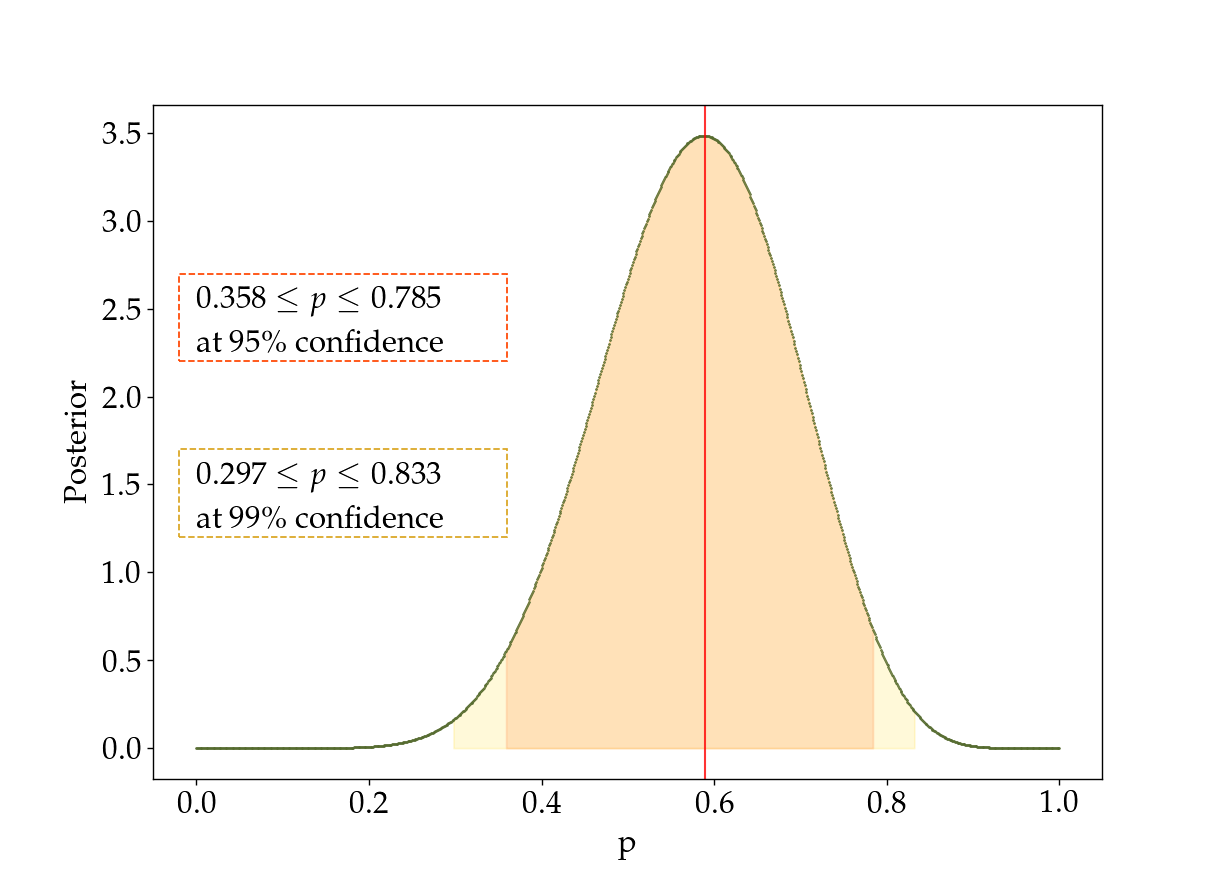

Text(0, 0.5, 'Posterior')

In [21]:




fig = plt.figure(figsize = (7*1.4,7))
ax  = fig.subplots(1)
ax.plot(lapaix['p'],lapaix['P(p|D)'], lw =0, marker = 'o', ms = 0.5, color = 'darkolivegreen' )

# 11 flashers / 18

## 95% confidence interval 

## 0.384<p<0.798

## 99% CL

## 0.322<p<0.845

ax.fill_between(lapaix['p'],0,lapaix['P(p|D)'], where= (lapaix['p']>0.358) & (lapaix['p']<0.785) ,
                color = 'orangered', alpha = 0.15) # 95% CL


ax.fill_between(lapaix['p'],0,lapaix['P(p|D)'], where= (lapaix['p']>0.297) & (lapaix['p']<0.833) ,
                color = 'gold', alpha = 0.15) # 99% CL


# ax.fill_between(lapaix['p'],0,lapaix['P(p|D)'], where= (lapaix['p']>0.2915) & (lapaix['p']<0.6225) ,
#                 color = 'orangered', alpha = 0.15) # 95% CL


# ax.fill_between(lapaix['p'],0,lapaix['P(p|D)'], where= (lapaix['p']>0.246) & (lapaix['p']<0.673) ,
#                 color = 'gold', alpha = 0.15) # 99% CL 


ax.axvline(0.59,lw = 1.2, color = 'red', alpha = 0.8)
# ax.axvline(0.2915, ymax = 0.2, lw = 1.2, ls = '--', color = 'orangered', alpha = 0.8)
# ax.axvline(0.6225, ymax = 0.25 ,lw = 1.2, ls = '--', color = 'orangered', alpha = 0.8)


# ax.axvline(0.246, ymax = 0.09, lw = 1.2, ls = '--', color = 'goldenrod')
# ax.axvline(0.673, ymax = 0.1 ,lw = 1.2, ls = '--', color = 'goldenrod')



ax.text(0.,2.5,r'$0.358 \leq p \leq 0.785 $', size = 18)
ax.text(0.,2.25,'at 95\% confidence', size = 18)

ax.add_patch(patches.Rectangle((-0.02, 2.2),0.38,0.5,fill=False, color = 'orangered', ls = '--' )  ) 
ax.add_patch(patches.Rectangle((-0.02, 1.2),0.38,0.5,fill=False, color = 'goldenrod', ls = '--'  )  ) 



ax.text(0.,1.5,r'$0.297 \leq p \leq 0.833 $', size = 18)
ax.text(0.,1.25,'at 99\% confidence', size = 18)


plt.xlabel('p', size = 18)
plt.ylabel('Posterior', size = 18)






In [58]:
plt.savefig('/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/figures/flasher_statistics/2d_subsample_weak_flasher_10vs17_04092022.pdf')

### REpeating figure but with transparency background for poster

<IPython.core.display.Javascript object>


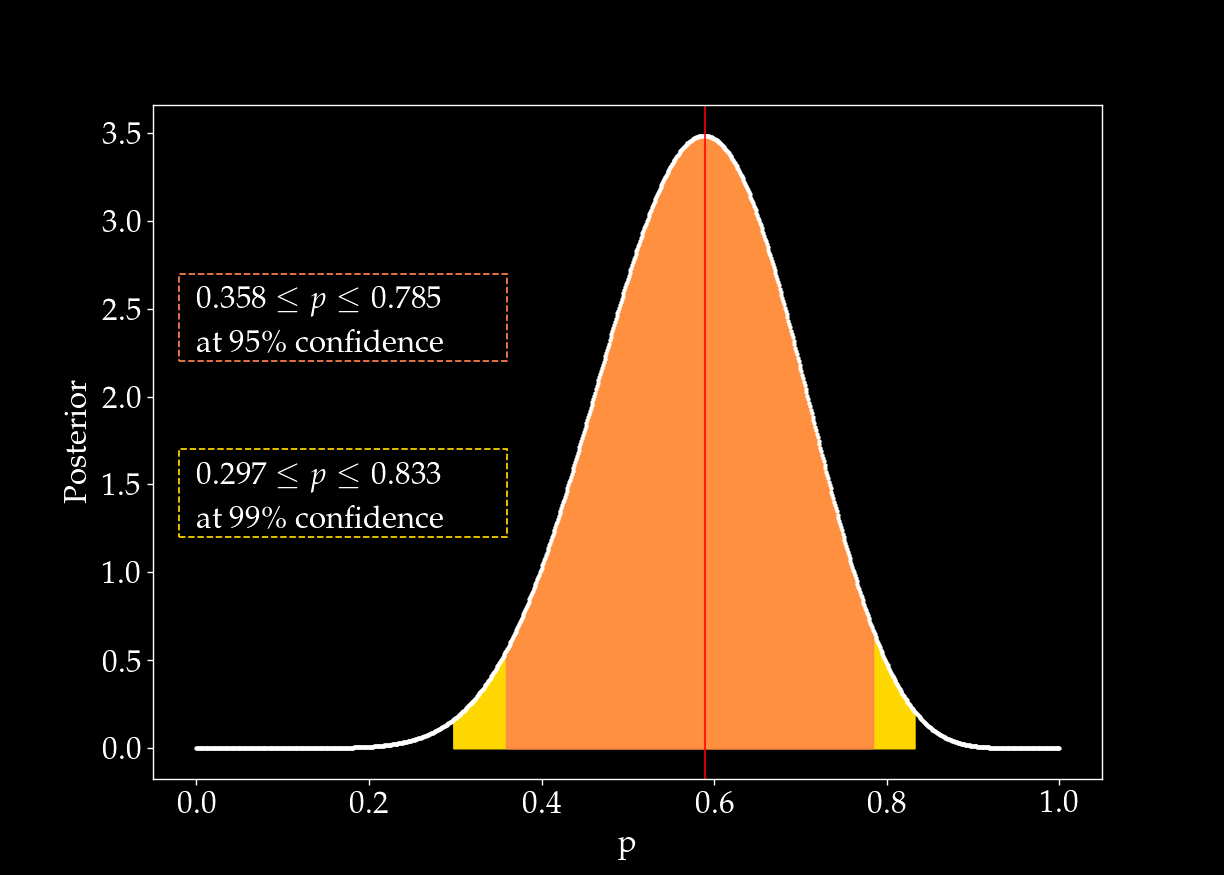

Text(0, 0.5, 'Posterior')

In [38]:




fig = plt.figure(figsize = (7*1.4,7))
ax  = fig.subplots(1)
ax.plot(lapaix['p'],lapaix['P(p|D)'], lw =0, marker = 'o', ms = 1.5, color = 'white' )

fig.patch.set_facecolor('black')
ax.patch.set_facecolor('black')





ax.fill_between(lapaix['p'],0,lapaix['P(p|D)'], where= (lapaix['p']>0.297) & (lapaix['p']<0.833) ,
                color = 'gold', alpha = 1) # 99% CL

ax.fill_between(lapaix['p'],0,lapaix['P(p|D)'], where= (lapaix['p']>0.358) & (lapaix['p']<0.785) ,
                color = 'coral', alpha = 0.8) # 95% CL


# ax.fill_between(lapaix['p'],0,lapaix['P(p|D)'], where= (lapaix['p']>0.2915) & (lapaix['p']<0.6225) ,
#                 color = 'orangered', alpha = 0.15) # 95% CL


# ax.fill_between(lapaix['p'],0,lapaix['P(p|D)'], where= (lapaix['p']>0.246) & (lapaix['p']<0.673) ,
#                 color = 'gold', alpha = 0.15) # 99% CL 


ax.axvline(0.59,lw = 1.2, color = 'red', alpha = 0.8)
# ax.axvline(0.2915, ymax = 0.2, lw = 1.2, ls = '--', color = 'orangered', alpha = 0.8)
# ax.axvline(0.6225, ymax = 0.25 ,lw = 1.2, ls = '--', color = 'orangered', alpha = 0.8)


# ax.axvline(0.246, ymax = 0.09, lw = 1.2, ls = '--', color = 'goldenrod')
# ax.axvline(0.673, ymax = 0.1 ,lw = 1.2, ls = '--', color = 'goldenrod')



ax.text(0.,2.5,r'$0.358 \leq p \leq 0.785 $', size = 18, color='white')
ax.text(0.,2.25,'at 95\% confidence', size = 18, color='white')

ax.add_patch(patches.Rectangle((-0.02, 2.2),0.38,0.5,fill=False, color = 'coral', ls = '--' )  ) 
ax.add_patch(patches.Rectangle((-0.02, 1.2),0.38,0.5,fill=False, color = 'gold', ls = '--'  )  ) 



ax.text(0.,1.5,r'$0.297 \leq p \leq 0.833 $', size = 18, color='white')
ax.text(0.,1.25,'at 99\% confidence', size = 18,color='white')

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.xaxis.label.set_color('white')        #setting up X-axis label color to yellow
ax.yaxis.label.set_color('white')          #setting up Y-axis label color to blue

ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='white')  #setting up Y-axis tick color to black




plt.xlabel('p', size = 18)
plt.ylabel('Posterior', size = 18)






In [39]:
plt.savefig('/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/reports_proposals_pres/poster/figures/2d_subsample_weak_flasher_10vs17_28032023_transparent.pdf', transparent=True)

## strong

In [60]:
strong = ascii.read('/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/tables/StrongFlasher_2dsubsample_07042022.csv')

In [61]:
strong = strong[strong['name']!='ZTF19abueupg']

In [62]:
len(strong)

23

In [63]:
strong[(strong['Flasher']=='yes')|(strong['Flasher']=='yes?')]

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
str12,str5,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str19,float64,str10,str3,str3,str9,str4,float64,str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abdbysy,SN II,yes?,SN IIP,2458295.705,2458294.781,2458296.4,ACAM+WHT,0.9234606,1.6180685,233.535367,56.6968577,0.012122,0.000175,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458334.75,DBSP+P200,-0.9810973016,0.001930022149,2458294.724,1.6760973,-15.49331020545953,0.0331526327068752,16.85753795836716,0.2862893468098687,-14.505103984137875,0.03272188124838144,10.372182527968567,0.3033303606071478,0.011610440903574113,0.0013302220278154035,0.03011464940724035,0.007192822166535693,10.821940937539091,7.09928796409179
ZTF18abeajml,SN II,yes,SN II,2458303.799,2458302.797,2458304.794,SEDm+P60,1.0019,1.99674769,252.03236,24.3040949,0.036526,8.6e-05,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458331.71,SEDm+P60,-0.02632267313,1.331885814,2458303.773,1.02132267,-18.50264443512861,0.015414958320710454,10.42687184147541,1.5013246095658397,-18.549787640366937,0.007498228090990184,7.372101208620604,1.351557480278869,0.0204867406038592,0.0009898916851182882,0.03619533929041421,0.0026608903799914055,6.572604715042432,4.575926693168947
ZTF18abgqvwv,SN II,yes?,SN IIP,2458313.73,2458312.838,2458314.569,ISIS+WHT,0.8915,1.73143,254.316401,31.9631992,0.037726,9.7e-05,2004SDSS3.C...0000:,--,--,no,yes,notype,yes,2458351.82,DBSP+P200,-1.02018285,0.001249450749,2458312.71,1.85918285,-16.814019840514156,0.006961016565343625,16.7395086276049,0.780814570522296,-16.656944283657296,0.030287354900355737,5.723185790692419,0.6022522133450261,-0.002767699609499243,0.0017236495965795575,0.0069464632463789545,0.0022731549446064706,14.424816825463473,4.47988680579762
ZTF18abokyfk,SN II,yes,SN II,2458350.89,2458349.901,2458352.006,DBSP+P200,0.9891898,2.10471592,2.360629,47.3540827,0.017189,3.3e-05,1999ApJS..121..287H,--,--,yes,yes,Sbc,yes,2458470.335,ACAM+WHT,-0.01311684685,0.00810257263,2458350.877,1.12911685,-17.17781792076166,0.008184648340751678,14.129301377718392,1.0319524497021388,-17.01907663711989,0.0332647297080407,10.042441351563802,1.685214752840058,0.005844303818708419,0.0014540596351276867,0.026480640502759393,0.0014649410130147898,10.31568752100516,6.276399839859646
ZTF18abwlsoi,SN II,yes,SN II,2458377.63,2458376.74,2458377.751,SEDm+P60,0.8952,1.0131723,261.897614,71.530251,0.05376479944,0.007318710553,meas,2458443.6,SEDm+P60,no,yes,--,yes,2458443.6,SEDm+P60,-0.02146235453,0.002665623404,2458377.609,0.14246235,-18.518220748706636,0.29569547023108217,6.291511375496778,0.3851094457398963,-18.581476347170103,0.2963036637351274,4.884686383300792,0.285709373570058,0.031614797151004376,0.008121157616170814,0.045954074587724325,0.007425436176296284,4.868515110202693,3.165895028481702
ZTF19abqhobb,SN II,yes,SN II,2458714.663,2458713.742,2458714.792,SEDm+P60,0.9213,1.0508631,261.4111,59.4467303,0.01815,1e-05,2006AJ....132..231P,--,--,yes,yes,Scd( f ),yes,2458878.71,ALFOSC+NOT,-0.0379833268,0.00608132416,2458714.625,0.16698333,-17.64125267005545,0.00866796071694527,8.582697522693397,0.5669372272342655,-17.465368004847953,0.019635823367565336,7.682337884769271,1.2202711183018025,0.010103578145785736,0.0007073497740846882,0.02204664496274497,0.0014619438297216788,7.833160915760206,4.327674459143019
ZTF19acryurj,SN II,yes,SN II,2458800.79,2458799.805,2458801.991,GMOS+Gemini,0.9845,2.18556632,13.5933959,31.6701819,0.022035,3e

In [64]:
strong[(strong['Flasher']=='no')]

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
str12,str5,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str19,float64,str10,str3,str3,str9,str4,float64,str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abckutn,SN II,no,SN IIP,2458289.865,2458289.758,2458290.748,DBSP+P200,0.1074884,0.99028249,237.026897,55.7148553,0.040705,0.000123,1999PASP..111..438F,--,--,yes,yes,notype,yes,2458307.69,DBSP+P200,-0.1069391354,0.01501290292,2458289.758,0.98993913,-17.489833262081575,0.00961684735079223,16.19256326104363,0.29419405502410373,-17.511123656906882,0.014952041887626596,9.522573088435623,0.6234607506231766,0.008576205724715288,0.001859420359141762,0.029699745465459428,0.0059168450289302996,9.330205161421391,6.232506273806587
ZTF18acqwdla,SN II,no,SN II,2458443.874,2458443.789,2458443.937,SEDm+P60,0.0855324,0.1481347,106.472662,12.8929375,0.026212141,0.004739291488,meas,2458616.456,EFOSC2+NTT,no,yes,--,yes,2458616.456,EFOSC2+NTT,-0.04249999998,0.04249999998,2458443.832,0.1055,-18.60137684700958,0.39262836644613214,12.183829851753528,1.2991954919750475,-18.754296156407,0.39288470141123233,11.513745758265994,0.38590822695090043,0.01596825397963348,0.0006413914572852468,0.03923859349765954,0.0008299446480697324,99.0,99.0
ZTF19abbwfgp,SN II,no,SN IIP,2458661.82,2458660.843,2458663.759,SEDm+P60,0.9774,2.9160862,258.323795,43.7843194,0.025925,0.000117,1996AJ....112.1803M,--,--,no,yes,notype,yes,2458765.626,SEDm+P60,-0.003414843865,3.554028127,2458661.817,1.94241484,-18.186342251238855,0.014048037207915394,16.568761702761094,3.902908966038234,-18.320690934249058,0.012077415898528105,10.069203091028774,3.5684189048473307,0.010489959256260756,0.0008571756329513857,0.026363764932218915,0.0018966819703930445,8.963188294655511,6.870977314482737
ZTF19abrlvij,SN II,no,SN II,2458719.65,2458718.81,2458719.863,SEDm+P60,0.8405,1.0517319,260.142987,51.6327799,0.04737034239,0.001434140161,meas,2458780.673,DBSP+P200,yes,yes,--,yes,2458781.0,DBSP+P200,-0.8406629158,0.009803902951,2458718.809,1.05366292,-17.791342492213754,0.06614611436315786,10.220441432622941,0.40581480560957633,-17.66064111955716,0.06817193330860039,7.644293032604692,0.44709852181771625,0.014235298328977889,0.0033275365092662107,0.029569488704127327,0.006285098627985899,9.523976021510613,4.545650233313706
ZTF20aasfhia,SN II,no,SN II,2458912.78,2458911.97,2458913.818,SEDm+P60,0.8106,1.8516465,184.913045,33.0403926,0.04869508011,0.01474643786,meas,2458936.893,SEDm+P60,yes,no,--,yes?,2458936.893,SEDm+P60,-0.08261871974,0.01188694661,2458912.697,1.12061872,-18.177945794632286,0.6686043863886,11.415664797123556,1.2159240347124567,-18.422525524030988,0.6607434809286058,7.920384955373292,0.5639222901267563,0.015904280323571995,0.0016076446339417143,0.062486875594247544,0.00369506588537152,6.311393057452039,4.700437260904928
ZTF20aasijew,SN II,no,SN II,2458912.958,2458912.05,2458913.883,SEDm+P60,0.9078356,1.8329015,216.905399,69.6864096,0.030074,0.000143,1999PASP..111..438F,--,--,yes,yes,SB( r )b,no?,2458939.73,SEDm+P60,-0.4540000004,0.4540000001,2458912.504,1.379,-17.551070668914477,0.01088077673062743,15.084002527197475,0.4646181670871612,99.0,99.0,99.0,99.0,0.0332274252705501,0.00196996316182331,99.0,99.0,99.0,99.0
ZTF20abfcdkj,SN II,no,SN II,2459013.75,2459012.82,2459015.0,GMOS+Gemini,0.9342,2.26059114,281.793965,60.4968018,0.05791714076,0.01083013884,meas,2459032.607,ALFOSC+NOT,yes,yes,--,yes,2459033.0,ALFOSC+NOT,-0.04948199798,0.007785345089,2459013.7


### Raw stat without Bayesian analysis 

## considering the "yes?" as flashers
### 45.8 % have (strong) flash features



In [65]:
10*100/23

43.47826086956522

In [66]:
peas = np.linspace(0,1,1001)

In [67]:
pofpknowd = []

for pp in peas:
    P_p_D = posterior(pp,23,10,13)
    pofpknowd.append(P_p_D)

lapaix    = Table([peas,pofpknowd],names = ('p','P(p|D)'))
lapaix['P(p|D)_norm'] = lapaix['P(p|D)']/np.sum(lapaix['P(p|D)'])



y    = lapaix['P(p|D)']
full = simps(y,peas)


## 95% confidence interval 

## 0.256<p<0.633


In [75]:

lowerbound = lapaix[lapaix['p']<=0.256]

p_lb   = lowerbound['p'] 
PpD_lb = lowerbound['P(p|D)']
dpc_l = simps(PpD_lb,p_lb)
dpc_l

0.025332061028748597

In [93]:
upperbound = lapaix[lapaix['p']>=0.633]

p_ub   = upperbound['p'] 
PpD_ub = upperbound['P(p|D)']
dpc_u = simps(PpD_ub,p_ub)
dpc_u

0.025351821575597566

## 99% CL

## 0.209<p<0.688



In [95]:
lowerbound = lapaix[lapaix['p']<=0.209]

p_lb   = lowerbound['p'] 
PpD_lb = lowerbound['P(p|D)']
dpc_l = simps(PpD_lb,p_lb)
dpc_l

0.005407701111554466

In [101]:
upperbound = lapaix[lapaix['p']>=0.688]

p_ub   = upperbound['p'] 
PpD_ub = upperbound['P(p|D)']
dpc_u = simps(PpD_ub,p_ub)
dpc_u

0.005401137240388956

<IPython.core.display.Javascript object>


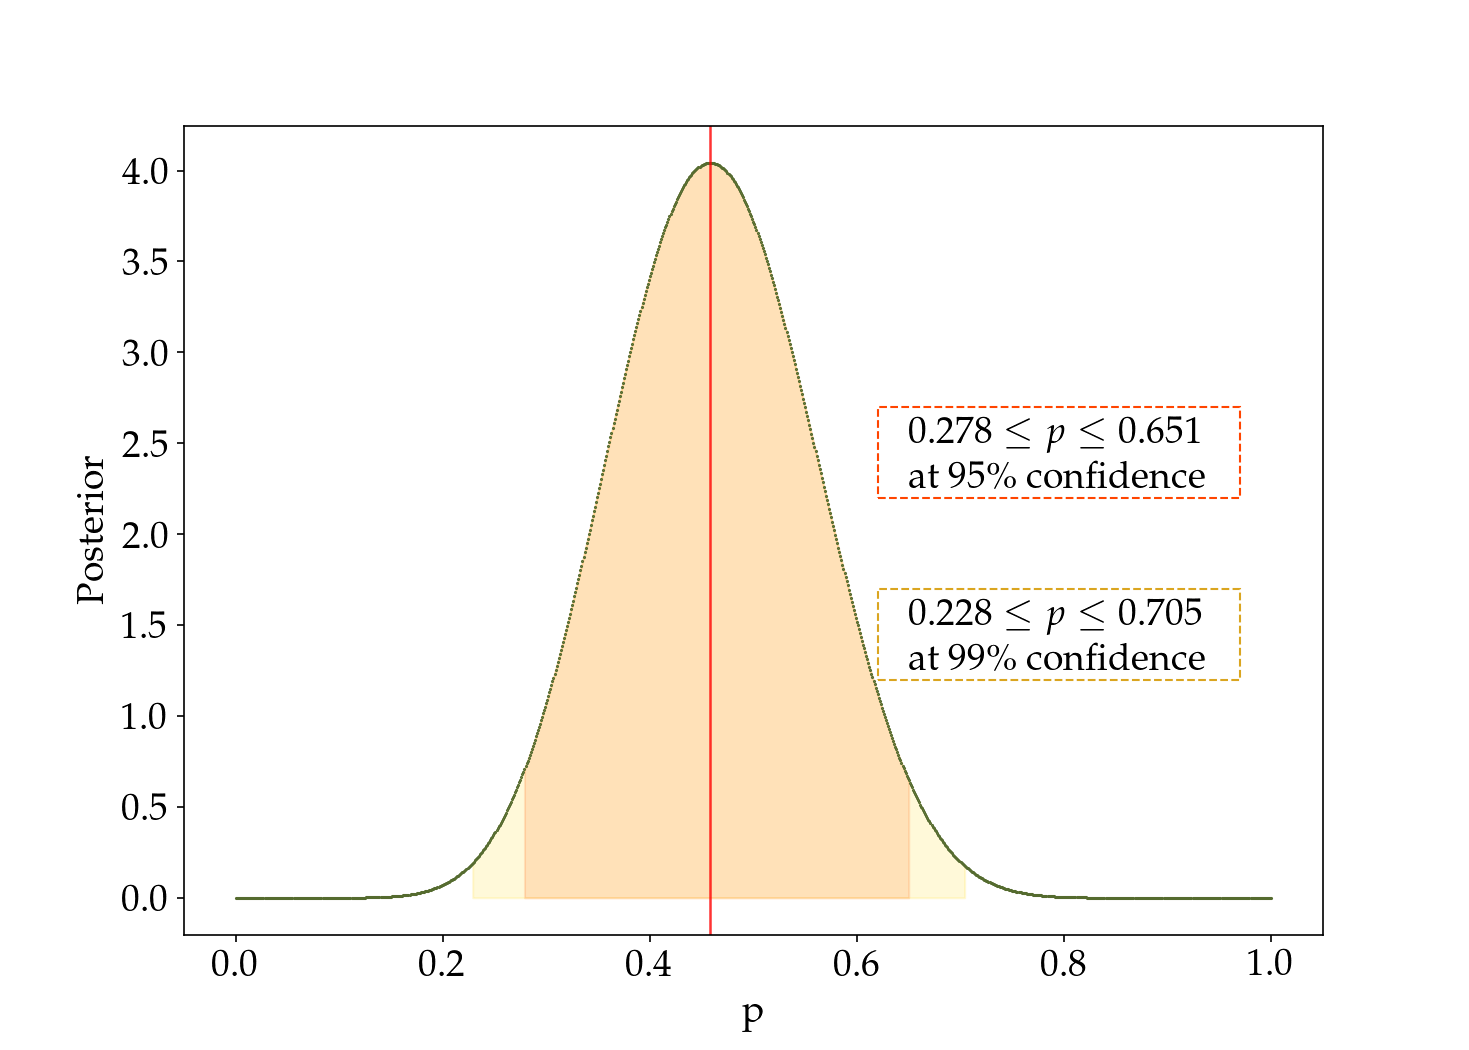

Text(0, 0.5, 'Posterior')

In [112]:

fig = plt.figure(figsize = (7*1.4,7))
ax  = fig.subplots(1)
ax.plot(lapaix['p'],lapaix['P(p|D)'], lw =0, marker = 'o', ms = 0.5, color = 'darkolivegreen' )

# 9 STRONG flashers / 24

# 95% confidence interval
# 0.278<p<0.651

## 99% CL

## 0.228<p<0.705

ax.fill_between(lapaix['p'],0,lapaix['P(p|D)'], where= (lapaix['p']>0.278) & (lapaix['p']<0.651) ,
                color = 'orangered', alpha = 0.15) # 95% CL


ax.fill_between(lapaix['p'],0,lapaix['P(p|D)'], where= (lapaix['p']>0.228) & (lapaix['p']<0.705) ,
                color = 'gold', alpha = 0.15) # 99% CL


# ax.fill_between(lapaix['p'],0,lapaix['P(p|D)'], where= (lapaix['p']>0.2915) & (lapaix['p']<0.6225) ,
#                 color = 'orangered', alpha = 0.15) # 95% CL


# ax.fill_between(lapaix['p'],0,lapaix['P(p|D)'], where= (lapaix['p']>0.246) & (lapaix['p']<0.673) ,
#                 color = 'gold', alpha = 0.15) # 99% CL 


ax.axvline(0.458,lw = 1.2, color = 'red', alpha = 0.8)
# ax.axvline(0.2915, ymax = 0.2, lw = 1.2, ls = '--', color = 'orangered', alpha = 0.8)
# ax.axvline(0.6225, ymax = 0.25 ,lw = 1.2, ls = '--', color = 'orangered', alpha = 0.8)


# ax.axvline(0.246, ymax = 0.09, lw = 1.2, ls = '--', color = 'goldenrod')
# ax.axvline(0.673, ymax = 0.1 ,lw = 1.2, ls = '--', color = 'goldenrod')



ax.text(0.65,2.5,r'$0.278 \leq p \leq 0.651 $', size = 18)
ax.text(0.65,2.25,'at 95\% confidence', size = 18)

ax.add_patch(patches.Rectangle((0.62, 2.2),0.35,0.5,fill=False, color = 'orangered', ls = '--' )  ) 
ax.add_patch(patches.Rectangle((0.62, 1.2),0.35,0.5,fill=False, color = 'goldenrod', ls = '--'  )  ) 



ax.text(0.65,1.5,r'$0.228 \leq p \leq 0.705 $', size = 18)
ax.text(0.65,1.25,'at 99\% confidence', size = 18)


plt.xlabel('p', size = 18)
plt.ylabel('Posterior', size = 18)








In [113]:
plt.savefig('/Users/r.saturn/PhD/WIP/Full_RISNeII_ZTF1/figures/flasher_statistics/2d_subsample_strong_flasher_11vs18_07042022.pdf')

# Bias Check

# Magnitude at time of first spectrum

In [16]:
def mad(x):
    '''
    median absolute deviation defined as median(|x(i)-median(x)|)
    '''
    return np.median(abs(x-np.median(x)))

In [17]:
LC               = '/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/forced_photometry/case_by_case/fp_lc_non_corrected/'

In [25]:

#### g band

# t_fs_g          = []
valmag_atFS_g   = []
e_valmag_atFS_g = []

for _ in range(len(weak)):
    
    
    candiname = weak['name'][_]
    t_fs      = weak['Fs-Texp'][_]
    
        
    try:
        _tablc    = ascii.read(LC+f'{candiname}_gband_exzcorr.ascii')
        
        low       = math.floor(t_fs) - 1
        if low<0:
            low = 0
        up        = math.floor(t_fs) + 1
        
        vtab_at_fs   = _tablc[ (_tablc['tfromexplo_znc']>= 0) & (_tablc['tfromexplo_znc']<= 2) ]
        vtab_at_fs   = vtab_at_fs[vtab_at_fs['mag']!=99.]
        
        if len(vtab_at_fs)>0:
            vmag_at_fs   = np.average(vtab_at_fs['mag'])
            e_vmag_at_fs = np.average(vtab_at_fs['emag'])
            
            valmag_atFS_g.append(vmag_at_fs)
            e_valmag_atFS_g.append(e_vmag_at_fs)
            
        else:
            print(candiname)
            valmag_atFS_g.append(99.)
            e_valmag_atFS_g.append(99.)

    except FileNotFoundError:
        print(f'No data for {candiname}')
        valmag_atFS_g.append(99.)
        e_valmag_atFS_g.append(99.)

        

print('R BAND')
        
#### r band


valmag_atFS_r   = []
e_valmag_atFS_r = []

for _ in range(len(weak)):
    
    
    candiname = weak['name'][_]
    t_fs      = weak['Fs-Texp'][_]

    
    try:
        _tablc    = ascii.read(LC+f'{candiname}_rband_exzcorr.ascii')
        
        low       = math.floor(t_fs) - 1
        if low<0:
            low = 0
        up        = math.floor(t_fs) + 1
        
        vtab_at_fs   = _tablc[ (_tablc['tfromexplo_znc']>= 0) & (_tablc['tfromexplo_znc']<= 2) ]
        vtab_at_fs   = vtab_at_fs[vtab_at_fs['mag']!=99.]
#         if candiname == 'ZTF20ablygyy':
#             print(t_fs)
#             print(low)
#             print(up)
#             print(vtab_at_fs)


        
        if len(vtab_at_fs)>0:
            vmag_at_fs_r   = np.average(vtab_at_fs['mag'])
            e_vmag_at_fs_r = np.average(vtab_at_fs['emag'])
            
            valmag_atFS_r.append(vmag_at_fs_r)
            e_valmag_atFS_r.append(e_vmag_at_fs_r)
            
        else:
            print(candiname)
            valmag_atFS_r.append(99.)
            e_valmag_atFS_r.append(99.)

    except FileNotFoundError:
        print(f'No data for {candiname}')
        valmag_atFS_r.append(99.)
        e_valmag_atFS_r.append(99.)

        



R BAND
ZTF20acfdmex


In [26]:

weak['mag_at_FS_g']  = valmag_atFS_g
weak['emag_at_FS_g'] = e_valmag_atFS_g


weak['mag_at_FS_r']  = valmag_atFS_r
weak['emag_at_FS_r'] = e_valmag_atFS_r

In [27]:
_p48   = { 'ZTF_r': 6339.6,'ZTF_g': 4722.7,'ZTF_i': 7886.1 }
# the EBV depends on the position
gal_reddening            = sfdmap.SFDMap('/Volumes/Machiavelli/code_library/python/sfddata-master/', scaling=0.86)


ebv_g = []
for candi in weak['name']:
    _temp = weak[weak['name']==candi]
    co    = SkyCoord (np.array(_temp['ra_med'][0]),np.array(_temp['dec_med'][0]),unit = 'deg', frame = 'fk5')
    ebv   = gal_reddening.ebv(co)
    ebv_g.append(ebv)
    
weak['EBV'] = ebv_g



In [28]:
extinction_g = []
extinction_r = []

for i in range(len(weak['EBV'])):
    ebv_ = weak['EBV'][i]
    alamg = extinction.ccm89(np.array([_p48.get('ZTF_g')]) , ebv_ * 3.1, 3.1, unit = 'aa')
    extinction_g.append(alamg[0])
    
    alamr = extinction.ccm89(np.array([_p48.get('ZTF_r')]) , ebv_ * 3.1, 3.1, unit = 'aa')
    extinction_r.append(alamr[0])
    
    
    
    
weak['extinction_g'] = extinction_g

weak['extinction_r'] = extinction_r

/Users/r.saturn/opt/anaconda3/envs/astropy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/Users/r.saturn/opt/anaconda3/envs/astropy37/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


In [29]:
weak

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g,mag_at_FS_g,emag_at_FS_g,mag_at_FS_r,emag_at_FS_r,EBV,extinction_g,extinction_r
str12,str5,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str19,float64,str10,str3,str3,str9,str4,float64,str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abckutn,SN II,no,SN IIP,2458289.865,2458289.758,2458290.748,DBSP+P200,0.1074884,0.99028249,237.026897,55.7148553,0.040705,0.000123,1999PASP..111..438F,--,--,yes,yes,notype,yes,2458307.69,DBSP+P200,-0.1069391354,0.01501290292,2458289.758,0.98993913,-17.489833262081575,0.00961684735079223,16.19256326104363,0.29419405502410373,-17.511123656906882,0.014952041887626596,9.522573088435623,0.6234607506231766,0.008576205724715288,0.001859420359141762,0.029699745465459428,0.0059168450289302996,9.330205161421391,6.232506273806587,19.73888126714557,0.10239562636486421,19.816213827600034,0.10291217757340841,0.015276236046797792,0.057274720990724684,0.04036405161363562
ZTF18abdbysy,SN II,yes?,SN IIP,2458295.705,2458294.781,2458296.4,ACAM+WHT,0.9234606,1.6180685,233.535367,56.6968577,0.012122,0.000175,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458334.75,DBSP+P200,-0.9810973016,0.001930022149,2458294.724,1.6760973,-15.49331020545953,0.0331526327068752,16.85753795836716,0.2862893468098687,-14.505103984137875,0.03272188124838144,10.372182527968567,0.3033303606071478,0.011610440903574113,0.0013302220278154035,0.03011464940724035,0.007192822166535693,10.821940937539091,7.09928796409179,20.101895104925617,0.2816300959250786,19.75713819816182,0.14509845751918385,0.015643794081706873,0.05865279500272776,0.041335241862766825
ZTF18abeajml,SN II,yes,SN II,2458303.799,2458302.797,2458304.794,SEDm+P60,1.0019,1.99674769,252.03236,24.3040949,0.036526,8.6e-05,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458331.71,SEDm+P60,-0.02632267313,1.331885814,2458303.773,1.02132267,-18.50264443512861,0.015414958320710454,10.42687184147541,1.5013246095658397,-18.549787640366937,0.007498228090990184,7.372101208620604,1.351557480278869,0.0204867406038592,0.0009898916851182882,0.03619533929041421,0.0026608903799914055,6.572604715042432,4.575926693168947,18.150426400060695,0.027024975788558097,19.107070891082614,0.055482649879298636,0.07315470564211132,0.27427668320749793,0.19329501752085543
ZTF18abgqvwv,SN II,yes?,SN IIP,2458313.73,2458312.838,2458314.569,ISIS+WHT,0.8915,1.73143,254.316401,31.9631992,0.037726,9.7e-05,2004SDSS3.C...0000:,--,--,no,yes,notype,yes,2458351.82,DBSP+P200,-1.02018285,0.001249450749,2458312.71,1.85918285,-16.814019840514156,0.006961016565343625,16.7395086276049,0.780814570522296,-16.656944283657296,0.030287354900355737,5.723185790692419,0.6022522133450261,-0.002767699609499243,0.0017236495965795575,0.0069464632463789545,0.0022731549446064706,14.424816825463473,4.47988680579762,20.23615163853679,0.12962101649918933,20.164522417687742,0.10929898910978349,0.026665694507007582,0.09997686656805135,0.07045815907118794
ZTF18abokyfk,SN II,yes,SN II,2458350.89,2458349.901,2458352.006,DBSP+P200,0.9891898,2.10471592,2.360629,47.3540827,0.017189,3.3e-05,1999ApJS..121..287H,--,--,yes,yes,Sbc,yes,2458470.335,ACAM+WHT,-0.01311684685,0.00810257263,2458350.877,1.12911685,-17.17781792076166,0.008184648340751678,14.129301377718392,1.0319524497021388,-17.01907663711989,0.0332647297080407,10.042441351563802,1.685214752840058,0.005844303818708419,0.0014540596351276867,0.026480640502759393,0.001

In [30]:
weakr = weak[weak['mag_at_FS_r']!=99.]

weakg = weak[weak['mag_at_FS_g']!=99.]

In [ ]:
# weakg['app_mag_g_at_FS']  = weakg['magcorr_at_FS_g'] + weakg['extinction_g']

# weakr['app_mag_r_at_FS']  = weakr['magcorr_at_FS_r'] + weakr['extinction_r']

In [31]:
flashr   = weakr[(weakr['Flasher']=='yes')|(weakr['Flasher']=='yes?')]
flashg   = weakg[(weakg['Flasher']=='yes')|(weakg['Flasher']=='yes?')]

noflashr = weakr[weakr['Flasher']=='no']
noflashg = weakg[weakg['Flasher']=='no']

<IPython.core.display.Javascript object>


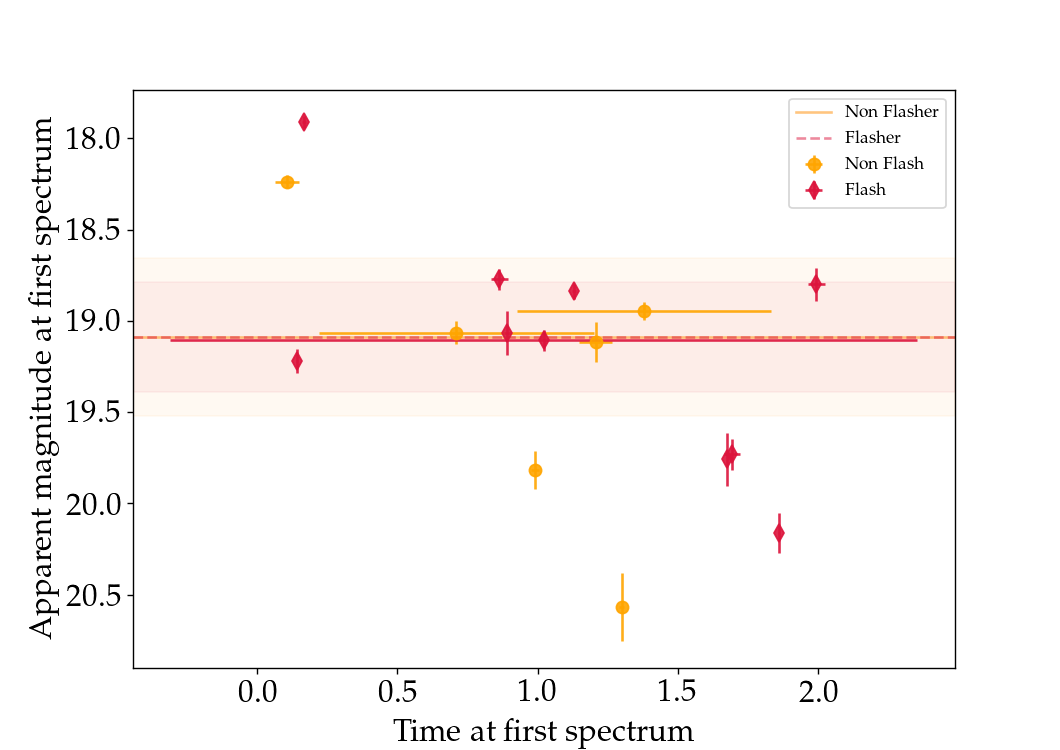

In [34]:
# ap magnitude at time of first spectrum (within 2d from explosion) 
### r band

appmag_flash_r    = np.median(flashr['mag_at_FS_r'])
e_appmag_flash_r  = mad(flashr['mag_at_FS_r'])


appmag_nflash_r   = np.median(noflashr['mag_at_FS_r'])
e_appmag_nflash_r = mad(noflashr['mag_at_FS_r'])

plt.figure(figsize = (6*np.sqrt(2),6))



## Non flash
plt.errorbar(noflashr['Fs-Texp'],noflashr['mag_at_FS_r'], noflashr['emag_at_FS_r'], noflashr['e_t_exp'],
                 fmt='o',ms = 7,alpha = 0.9 ,color = 'orange', label = 'Non Flash')

plt.axhline(appmag_nflash_r, alpha = 0.5, color = 'darkorange', label = 'Non Flasher')
plt.axhspan(appmag_nflash_r- e_appmag_nflash_r, 
            appmag_nflash_r+ e_appmag_nflash_r, alpha = 0.05, color = 'darkorange')



## Flash
plt.errorbar(flashr['Fs-Texp'],flashr['mag_at_FS_r'], flashr['emag_at_FS_r'], flashr['e_t_exp'],
                 fmt='d',ms = 7,alpha = 0.9 ,color = 'crimson', label = 'Flash')

plt.axhline(appmag_flash_r, alpha = 0.5, color = 'crimson', ls = '--', label = 'Flasher')
plt.axhspan(appmag_flash_r-e_appmag_flash_r, 
            appmag_flash_r+e_appmag_flash_r, alpha = 0.05, color = 'crimson')


#### Text

# plt.text(18,flashmean_r-0.1, r'$\mu_{flash}$ = '+muflashr_strin+ r'$\pm$ '+ eflashr_strin +' mag', color = 'crimson', size = 10)
# plt.text(18,nflashmean_r+0.12, r'$\mu_{non flash}$ = '+ munflashr_strin+ r'$\pm$ '+ enflashr_strin +' mag', color = 'darkorange', size = 10)


# plt.text(rise_flashmean_r-1, -16,
#          r'$\mu_{flash}$ = '+mu_riseflashr_strin+ r'$\pm$ '+ e_riseflashr_strin +' d',
#          color = 'crimson', size = 10, rotation=90)
# plt.text(rise_nflashmean_r+0.12, -16,
#          r'$\mu_{non flash}$ = '+ mu_risenflashr_strin+ r'$\pm$ '+ e_risenflashr_strin +' d', 
#          color = 'darkorange', size = 10, rotation=90)



plt.xlabel('Time at first spectrum', size = 18)
plt.ylabel('Apparent magnitude at first spectrum', size = 18)
plt.legend()
plt.gca().invert_yaxis()

In [35]:
plt.savefig('/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/figures/biases/rband_brightnessfirstspectrum.pdf')

<IPython.core.display.Javascript object>


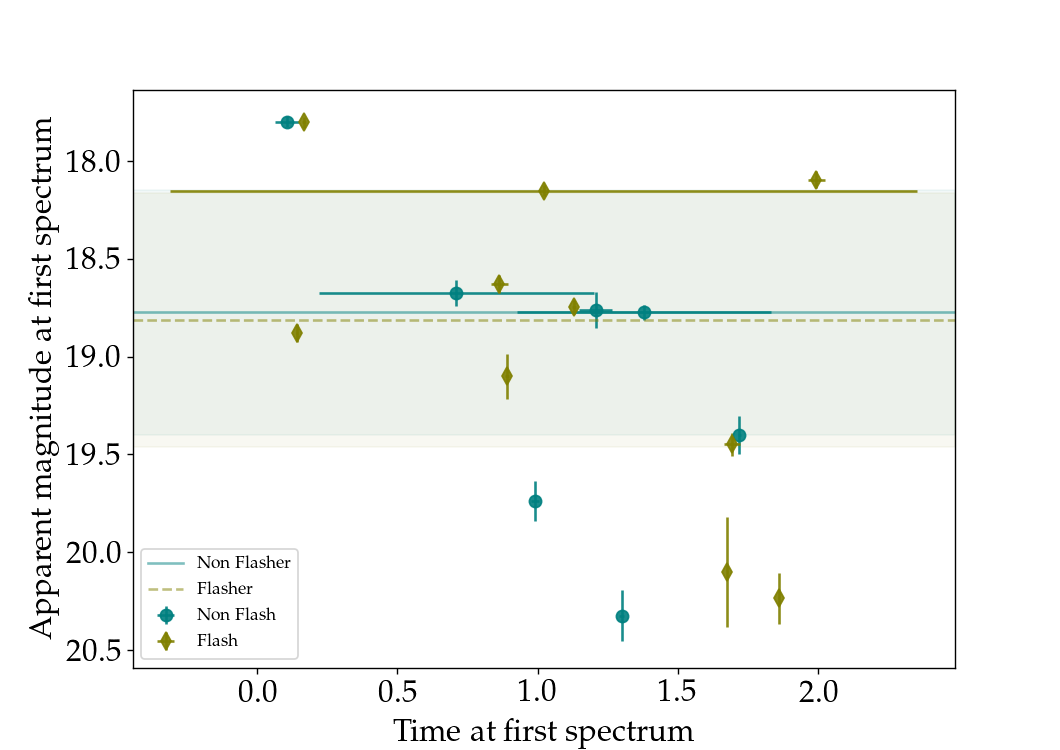

In [36]:
# ap magnitude at time of first spectrum (within 2d from explosion) 
### r band

appmag_flash_g    = np.median(flashg['mag_at_FS_g'])
e_appmag_flash_g  = mad(flashg['mag_at_FS_g'])


appmag_nflash_g   = np.median(noflashg['mag_at_FS_g'])
e_appmag_nflash_g = mad(noflashg['mag_at_FS_g'])

plt.figure(figsize = (6*np.sqrt(2),6))



## Non flash
plt.errorbar(noflashg['Fs-Texp'],noflashg['mag_at_FS_g'], noflashg['emag_at_FS_g'], noflashg['e_t_exp'],
                 fmt='o',ms = 7,alpha = 0.9 ,color = 'teal', label = 'Non Flash')

plt.axhline(appmag_nflash_g, alpha = 0.5, color = 'teal', label = 'Non Flasher')
plt.axhspan(appmag_nflash_g- e_appmag_nflash_g, 
            appmag_nflash_g+ e_appmag_nflash_g, alpha = 0.05, color = 'teal')



## Flash
plt.errorbar(flashg['Fs-Texp'],flashg['mag_at_FS_g'], flashg['emag_at_FS_g'], flashg['e_t_exp'],
                 fmt='d',ms = 7,alpha = 0.9 ,color = 'olive', label = 'Flash')

plt.axhline(appmag_flash_g, alpha = 0.5, color = 'olive', ls = '--', label = 'Flasher')
plt.axhspan(appmag_flash_g-e_appmag_flash_g, 
            appmag_flash_g+e_appmag_flash_g, alpha = 0.05, color = 'olive')


#### Text

# plt.text(18,flashmean_r-0.1, r'$\mu_{flash}$ = '+muflashr_strin+ r'$\pm$ '+ eflashr_strin +' mag', color = 'crimson', size = 10)
# plt.text(18,nflashmean_r+0.12, r'$\mu_{non flash}$ = '+ munflashr_strin+ r'$\pm$ '+ enflashr_strin +' mag', color = 'darkorange', size = 10)


# plt.text(rise_flashmean_r-1, -16,
#          r'$\mu_{flash}$ = '+mu_riseflashr_strin+ r'$\pm$ '+ e_riseflashr_strin +' d',
#          color = 'crimson', size = 10, rotation=90)
# plt.text(rise_nflashmean_r+0.12, -16,
#          r'$\mu_{non flash}$ = '+ mu_risenflashr_strin+ r'$\pm$ '+ e_risenflashr_strin +' d', 
#          color = 'darkorange', size = 10, rotation=90)



plt.xlabel('Time at first spectrum', size = 18)
plt.ylabel('Apparent magnitude at first spectrum', size = 18)
plt.legend()
plt.gca().invert_yaxis()

In [37]:
plt.savefig('/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/figures/biases/gband_brightnessfirstspectrum.pdf')

## Repeating the process but separating the time at which the spectrum was obtained

In [7]:

#### g band

t_fs_g          = []
valmag_atFS_g   = []
e_valmag_atFS_g = []

for _ in range(len(weak)):
    
    candiname = weak['name'][_]
    t_fs      = weak['Fs-Texp'][_]
    
        
    try:
        _tablc    = ascii.read(LC+f'{candiname}_gband_exzcorr.ascii')
        
        low       = math.floor(t_fs) 
        up        = math.floor(t_fs) + 1
        
        vtab_at_fs   = _tablc[ (_tablc['tfromexplo_zc']>= low) & (_tablc['tfromexplo_zc']<= up) ]

        t_fs_g.append((low+up)/2)
        
        if len(vtab_at_fs)>0:
            vmag_at_fs_r   = np.median(vtab_at_fs['mag'])
            e_vmag_at_fs_r = np.median(vtab_at_fs['emag'])
            
            valmag_atFS_g.append(vmag_at_fs_r)
            e_valmag_atFS_g.append(e_vmag_at_fs_r)
            
        else:
            print(candiname)
            valmag_atFS_g.append(99.)
            e_valmag_atFS_g.append(99.)

    except FileNotFoundError:
        print(f'No data for {candiname}')
        valmag_atFS_g.append(99.)
        e_valmag_atFS_g.append(99.)
        t_fs_g.append(99.)
        

print('R BAND')
        
#### r band

t_fs_r          = []
valmag_atFS_r   = []
e_valmag_atFS_r = []

for _ in range(len(weak)):
    
    candiname = weak['name'][_]
    t_fs      = weak['Fs-Texp'][_]

        
    try:
        _tablc    = ascii.read(LC+f'{candiname}_rband_exzcorr.ascii')
        
        low       = math.floor(t_fs) 
        up        = math.floor(t_fs) + 1
        
        vtab_at_fs   = _tablc[ (_tablc['tfromexplo_zc']>= low) & (_tablc['tfromexplo_zc']<= up) ]
        
        t_fs_r.append((low+up)/2)

        
        if len(vtab_at_fs)>0:
            vmag_at_fs_r   = np.median(vtab_at_fs['mag'])
            e_vmag_at_fs_r = np.median(vtab_at_fs['emag'])
            
            valmag_atFS_r.append(vmag_at_fs_r)
            e_valmag_atFS_r.append(e_vmag_at_fs_r)
            
        else:
            print(candiname)
            valmag_atFS_r.append(99.)
            e_valmag_atFS_r.append(99.)

    except FileNotFoundError:
        print(f'No data for {candiname}')
        valmag_atFS_r.append(99.)
        e_valmag_atFS_r.append(99.)
        t_fs_r.append(99.)
        



ZTF20acuaqlf
R BAND
ZTF20acfdmex
ZTF20acuaqlf


In [30]:
weak['t_fs_g']           = t_fs_g
weak['magcorr_at_FS_g']  = valmag_atFS_g
weak['emagcorr_at_FS_g'] = e_valmag_atFS_g

weak['t_fs_r']           = t_fs_r
weak['magcorr_at_FS_r']  = valmag_atFS_r
weak['emagcorr_at_FS_r'] = e_valmag_atFS_r

In [32]:
_p48   = { 'ZTF_r': 6339.6,'ZTF_g': 4722.7,'ZTF_i': 7886.1 }
# the EBV depends on the position
gal_reddening            = sfdmap.SFDMap('/Volumes/Machiavelli/code_library/python/sfddata-master/', scaling=0.86)


ebv_g = []
for candi in weak['name']:
    _temp = weak[weak['name']==candi]
    co    = SkyCoord (np.array(_temp['ra_med'][0]),np.array(_temp['dec_med'][0]),unit = 'deg', frame = 'fk5')
    ebv   = gal_reddening.ebv(co)
    ebv_g.append(ebv)
    
weak['EBV'] = ebv_g



In [33]:
extinction_g = []
extinction_r = []

for i in range(len(weak['EBV'])):
    ebv_ = weak['EBV'][i]
    alamg = extinction.ccm89(np.array([_p48.get('ZTF_g')]) , ebv_ * 3.1, 3.1, unit = 'aa')
    extinction_g.append(alamg[0])
    
    alamr = extinction.ccm89(np.array([_p48.get('ZTF_r')]) , ebv_ * 3.1, 3.1, unit = 'aa')
    extinction_r.append(alamr[0])
    
weak['extinction_g'] = extinction_g
weak['extinction_r'] = extinction_r

/Users/r.saturn/opt/anaconda3/envs/astropy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/Users/r.saturn/opt/anaconda3/envs/astropy37/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


In [35]:
weak['app_mag_g_at_FS']  = weak['magcorr_at_FS_g'] + weak['extinction_g']
weak['app_mag_r_at_FS']  = weak['magcorr_at_FS_r'] + weak['extinction_r']

In [36]:
flash   = weak[(weak['Flasher']=='yes')|(weak['Flasher']=='yes?')]
noflash = weak[weak['Flasher']=='no']

In [37]:
###### DAY ONE 

## DAY ONE - R BAND
r_dayone_flash   = flash[flash['t_fs_r']==0.5]['name',    't_fs_r','app_mag_r_at_FS','emagcorr_at_FS_r','redshift','e_redshift']
r_dayone_noflash = noflash[noflash['t_fs_r']==0.5]['name','t_fs_r','app_mag_r_at_FS','emagcorr_at_FS_r','redshift','e_redshift']

r_dayone_flash    = r_dayone_flash[r_dayone_flash['app_mag_r_at_FS']<90.]
r_dayone_noflash  = r_dayone_noflash[r_dayone_noflash['app_mag_r_at_FS']<90.]

## DAY ONE - G BAND
g_dayone_flash   = flash[flash['t_fs_g']==0.5]['name','t_fs_g','app_mag_g_at_FS','emagcorr_at_FS_g','redshift','e_redshift']
g_dayone_noflash = noflash[noflash['t_fs_g']==0.5]['name','t_fs_g','app_mag_g_at_FS','emagcorr_at_FS_g','redshift','e_redshift']

g_dayone_flash    = g_dayone_flash[g_dayone_flash['app_mag_g_at_FS']<90.]
g_dayone_noflash  = g_dayone_noflash[g_dayone_noflash['app_mag_g_at_FS']<90.]



<IPython.core.display.Javascript object>


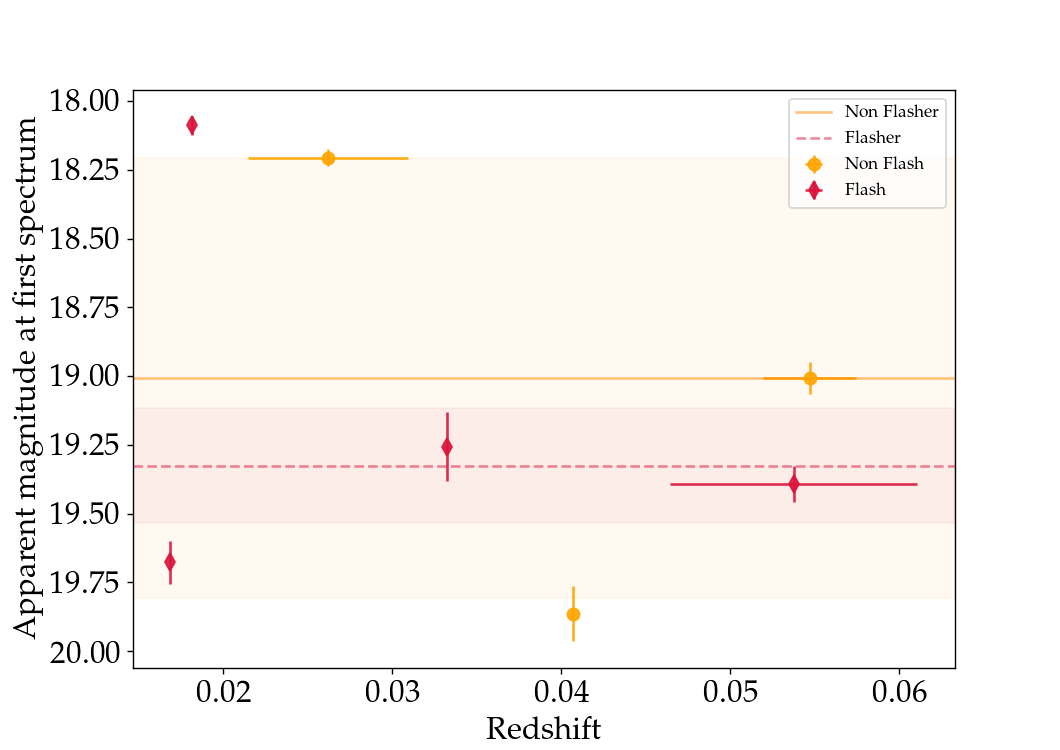

In [38]:
# ap magnitude at time of first spectrum (within 2d from explosion) r band DAY ONE 

appmag_flash_r    = np.median(r_dayone_flash['app_mag_r_at_FS'])
e_appmag_flash_r  = mad(r_dayone_flash['app_mag_r_at_FS'])


appmag_nflash_r   = np.median(r_dayone_noflash['app_mag_r_at_FS'])
e_appmag_nflash_r = mad(r_dayone_noflash['app_mag_r_at_FS'])

plt.figure(figsize = (6*np.sqrt(2),6))



## Non flash
plt.errorbar(r_dayone_noflash['redshift'],r_dayone_noflash['app_mag_r_at_FS'], 
             r_dayone_noflash['emagcorr_at_FS_r'], r_dayone_noflash['e_redshift'],
                 fmt='o',ms = 7,alpha = 0.9 ,color = 'orange', label = 'Non Flash')

plt.axhline(appmag_nflash_r, alpha = 0.5, color = 'darkorange', label = 'Non Flasher')
plt.axhspan(appmag_nflash_r- e_appmag_nflash_r, 
            appmag_nflash_r+ e_appmag_nflash_r, alpha = 0.05, color = 'darkorange')



## Flash
plt.errorbar(r_dayone_flash['redshift'],r_dayone_flash['app_mag_r_at_FS'],
             r_dayone_flash['emagcorr_at_FS_r'], r_dayone_flash['e_redshift'],
                 fmt='d',ms = 7,alpha = 0.9 ,color = 'crimson', label = 'Flash')

plt.axhline(appmag_flash_r, alpha = 0.5, color = 'crimson', ls = '--', label = 'Flasher')
plt.axhspan(appmag_flash_r-e_appmag_flash_r, 
            appmag_flash_r+e_appmag_flash_r, alpha = 0.05, color = 'crimson')


#### Text

# plt.text(18,flashmean_r-0.1, r'$\mu_{flash}$ = '+muflashr_strin+ r'$\pm$ '+ eflashr_strin +' mag', color = 'crimson', size = 10)
# plt.text(18,nflashmean_r+0.12, r'$\mu_{non flash}$ = '+ munflashr_strin+ r'$\pm$ '+ enflashr_strin +' mag', color = 'darkorange', size = 10)


# plt.text(rise_flashmean_r-1, -16,
#          r'$\mu_{flash}$ = '+mu_riseflashr_strin+ r'$\pm$ '+ e_riseflashr_strin +' d',
#          color = 'crimson', size = 10, rotation=90)
# plt.text(rise_nflashmean_r+0.12, -16,
#          r'$\mu_{non flash}$ = '+ mu_risenflashr_strin+ r'$\pm$ '+ e_risenflashr_strin +' d', 
#          color = 'darkorange', size = 10, rotation=90)



plt.xlabel('Redshift', size = 18)
plt.ylabel('Apparent magnitude at first spectrum', size = 18)
plt.legend()
plt.gca().invert_yaxis()

<IPython.core.display.Javascript object>


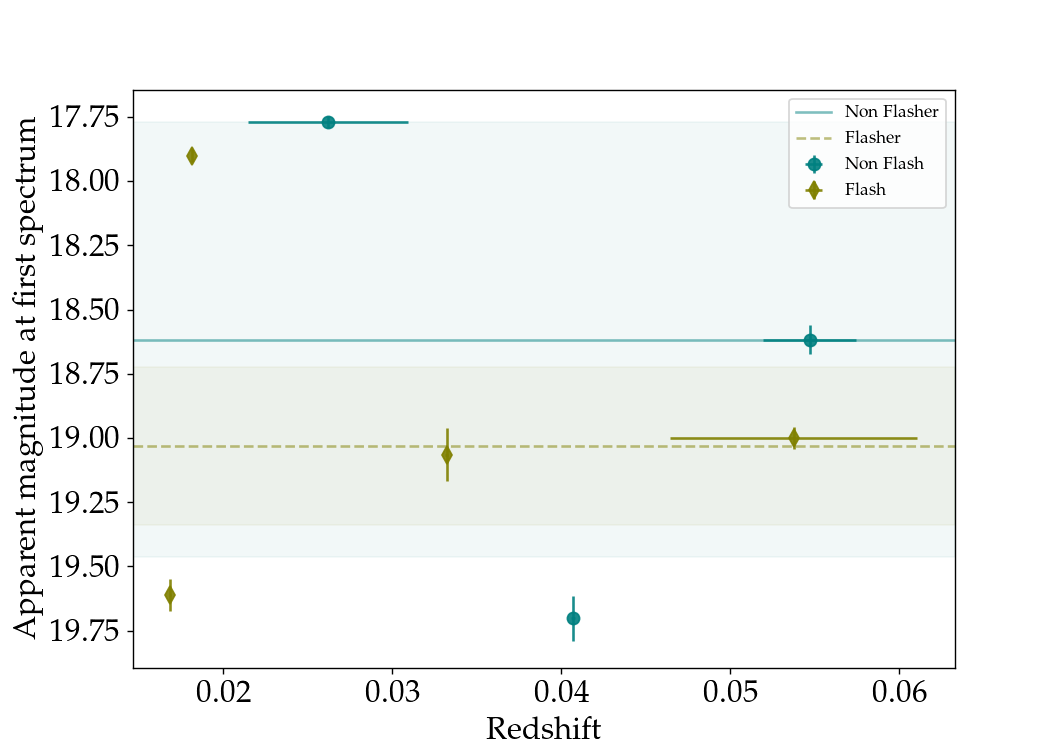

In [25]:
# ap magnitude at time of first spectrum (within 2d from explosion) g band DAY ONE 

appmag_flash_g    = np.median(g_dayone_flash['app_mag_g_at_FS'])
e_appmag_flash_g  = mad(g_dayone_flash['app_mag_g_at_FS'])


appmag_nflash_g   = np.median(g_dayone_noflash['app_mag_g_at_FS'])
e_appmag_nflash_g = mad(g_dayone_noflash['app_mag_g_at_FS'])

plt.figure(figsize = (6*np.sqrt(2),6))



## Non flash
plt.errorbar(g_dayone_noflash['redshift'],g_dayone_noflash['app_mag_g_at_FS'], 
             g_dayone_noflash['emagcorr_at_FS_g'], g_dayone_noflash['e_redshift'],
                 fmt='o',ms = 7,alpha = 0.9 ,color = 'teal', label = 'Non Flash')

plt.axhline(appmag_nflash_g, alpha = 0.5, color = 'teal', label = 'Non Flasher')
plt.axhspan(appmag_nflash_g- e_appmag_nflash_g, 
            appmag_nflash_g+ e_appmag_nflash_g, alpha = 0.05, color = 'teal')



## Flash
plt.errorbar(g_dayone_flash['redshift'],g_dayone_flash['app_mag_g_at_FS'],
             g_dayone_flash['emagcorr_at_FS_g'], g_dayone_flash['e_redshift'],
                 fmt='d',ms = 7,alpha = 0.9 ,color = 'olive', label = 'Flash')

plt.axhline(appmag_flash_g, alpha = 0.5, color = 'olive', ls = '--', label = 'Flasher')
plt.axhspan(appmag_flash_g-e_appmag_flash_g, 
            appmag_flash_g+e_appmag_flash_g, alpha = 0.05, color = 'olive')



plt.xlabel('Redshift', size = 18)
plt.ylabel('Apparent magnitude at first spectrum', size = 18)
plt.legend()
plt.gca().invert_yaxis()

In [26]:
###### DAY TWO

## DAY TWO - R BAND
r_daytwo_flash   = flash[flash['t_fs_r']==1.5]['name','t_fs_r','app_mag_r_at_FS','emagcorr_at_FS_r','redshift','e_redshift']
r_daytwo_noflash = noflash[noflash['t_fs_r']==1.5]['name','t_fs_r','app_mag_r_at_FS','emagcorr_at_FS_r','redshift','e_redshift']

r_daytwo_flash    = r_daytwo_flash[r_daytwo_flash['app_mag_r_at_FS']<90.]
r_daytwo_noflash  = r_daytwo_noflash[r_daytwo_noflash['app_mag_r_at_FS']<90.]

## DAY ONE - G BAND
g_daytwo_flash   = flash[flash['t_fs_g']==1.5]['name','t_fs_g','app_mag_g_at_FS','emagcorr_at_FS_g','redshift','e_redshift']
g_daytwo_noflash = noflash[noflash['t_fs_g']==1.5]['name','t_fs_g','app_mag_g_at_FS','emagcorr_at_FS_g','redshift','e_redshift']

g_daytwo_flash    = g_daytwo_flash[g_daytwo_flash['app_mag_g_at_FS']<90.]
g_daytwo_noflash  = g_daytwo_noflash[g_daytwo_noflash['app_mag_g_at_FS']<90.]



<IPython.core.display.Javascript object>


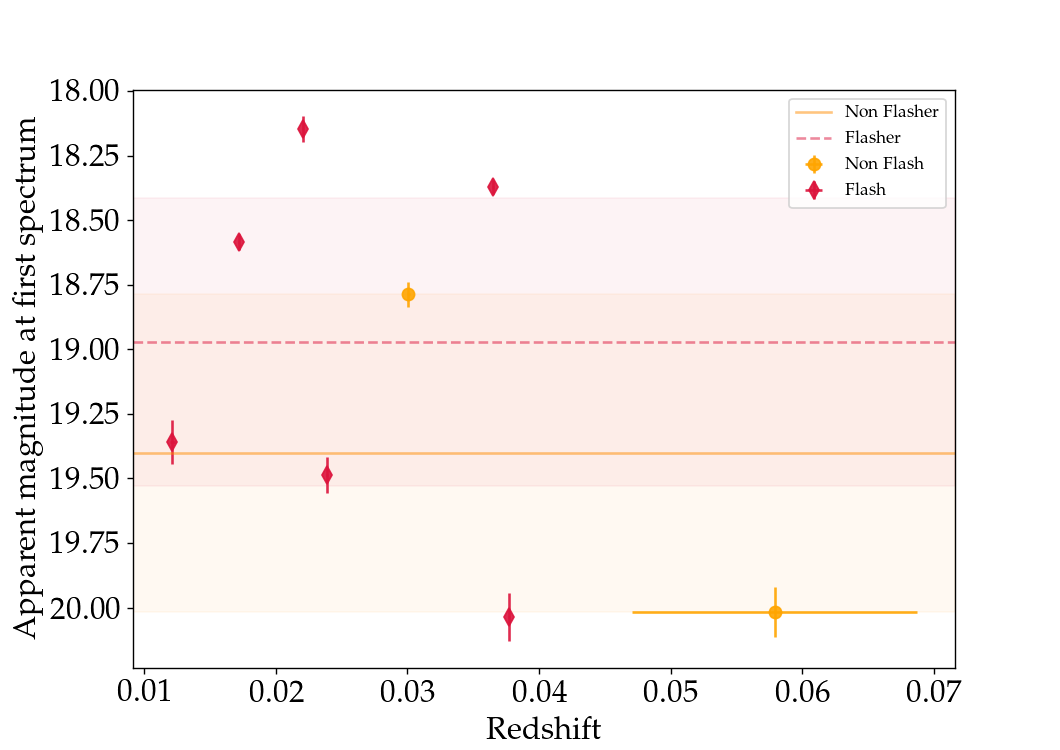

In [27]:
# ap magnitude at time of first spectrum (within 2d from explosion) r band DAY ONE 

appmag_flash_r    = np.median(r_daytwo_flash['app_mag_r_at_FS'])
e_appmag_flash_r  = mad(r_daytwo_flash['app_mag_r_at_FS'])


appmag_nflash_r   = np.median(r_daytwo_noflash['app_mag_r_at_FS'])
e_appmag_nflash_r = mad(r_daytwo_noflash['app_mag_r_at_FS'])

plt.figure(figsize = (6*np.sqrt(2),6))



## Non flash
plt.errorbar(r_daytwo_noflash['redshift'],r_daytwo_noflash['app_mag_r_at_FS'], 
             r_daytwo_noflash['emagcorr_at_FS_r'], r_daytwo_noflash['e_redshift'],
                 fmt='o',ms = 7,alpha = 0.9 ,color = 'orange', label = 'Non Flash')

plt.axhline(appmag_nflash_r, alpha = 0.5, color = 'darkorange', label = 'Non Flasher')
plt.axhspan(appmag_nflash_r- e_appmag_nflash_r, 
            appmag_nflash_r+ e_appmag_nflash_r, alpha = 0.05, color = 'darkorange')



## Flash
plt.errorbar(r_daytwo_flash['redshift'],r_daytwo_flash['app_mag_r_at_FS'],
             r_daytwo_flash['emagcorr_at_FS_r'], r_daytwo_flash['e_redshift'],
                 fmt='d',ms = 7,alpha = 0.9 ,color = 'crimson', label = 'Flash')

plt.axhline(appmag_flash_r, alpha = 0.5, color = 'crimson', ls = '--', label = 'Flasher')
plt.axhspan(appmag_flash_r-e_appmag_flash_r, 
            appmag_flash_r+e_appmag_flash_r, alpha = 0.05, color = 'crimson')



plt.xlabel('Redshift', size = 18)
plt.ylabel('Apparent magnitude at first spectrum', size = 18)
plt.legend()
plt.gca().invert_yaxis()

<IPython.core.display.Javascript object>


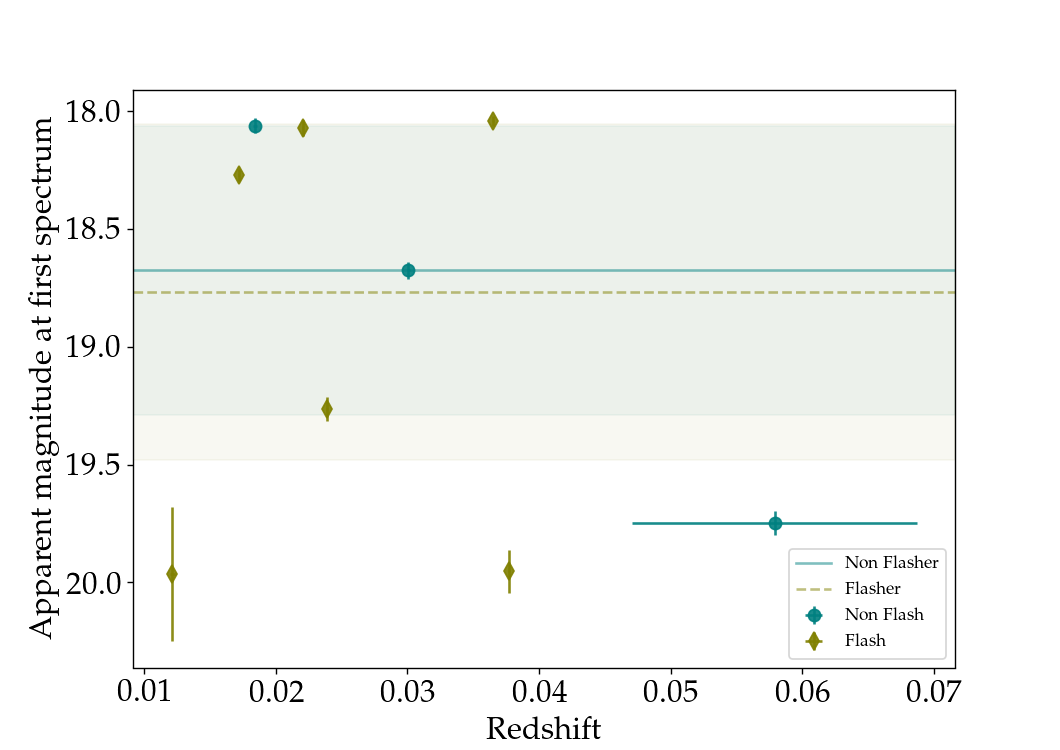

In [28]:
# ap magnitude at time of first spectrum (within 2d from explosion) g band DAY ONE 

appmag_flash_g    = np.median(g_daytwo_flash['app_mag_g_at_FS'])
e_appmag_flash_g  = mad(g_daytwo_flash['app_mag_g_at_FS'])


appmag_nflash_g   = np.median(g_daytwo_noflash['app_mag_g_at_FS'])
e_appmag_nflash_g = mad(g_daytwo_noflash['app_mag_g_at_FS'])

plt.figure(figsize = (6*np.sqrt(2),6))



## Non flash
plt.errorbar(g_daytwo_noflash['redshift'],g_daytwo_noflash['app_mag_g_at_FS'], 
             g_daytwo_noflash['emagcorr_at_FS_g'], g_daytwo_noflash['e_redshift'],
                 fmt='o',ms = 7,alpha = 0.9 ,color = 'teal', label = 'Non Flash')

plt.axhline(appmag_nflash_g, alpha = 0.5, color = 'teal', label = 'Non Flasher')
plt.axhspan(appmag_nflash_g- e_appmag_nflash_g, 
            appmag_nflash_g+ e_appmag_nflash_g, alpha = 0.05, color = 'teal')



## Flash
plt.errorbar(g_daytwo_flash['redshift'],g_daytwo_flash['app_mag_g_at_FS'],
             g_daytwo_flash['emagcorr_at_FS_g'], g_daytwo_flash['e_redshift'],
                 fmt='d',ms = 7,alpha = 0.9 ,color = 'olive', label = 'Flash')

plt.axhline(appmag_flash_g, alpha = 0.5, color = 'olive', ls = '--', label = 'Flasher')
plt.axhspan(appmag_flash_g-e_appmag_flash_g, 
            appmag_flash_g+e_appmag_flash_g, alpha = 0.05, color = 'olive')



plt.xlabel('Redshift', size = 18)
plt.ylabel('Apparent magnitude at first spectrum', size = 18)
plt.legend()
plt.gca().invert_yaxis()

In [26]:
# weak['name','t_fs_g','app_mag_g_at_FS']

g_dayone = weak[weak['t_fs_g']==0.5]['name','t_fs_g','app_mag_g_at_FS','redshift','e_redshift']
g_daytwo = weak[weak['t_fs_g']==1.5]['name','t_fs_g','app_mag_g_at_FS','redshift','e_redshift']

In [27]:
# weak['name','t_fs_r','app_mag_r_at_FS']
r_dayone = weak[weak['t_fs_r']==0.5]['name','t_fs_r','app_mag_r_at_FS','redshift','e_redshift']
r_daytwo = weak[weak['t_fs_r']==1.5]['name','t_fs_r','app_mag_r_at_FS','redshift','e_redshift']

<IPython.core.display.Javascript object>


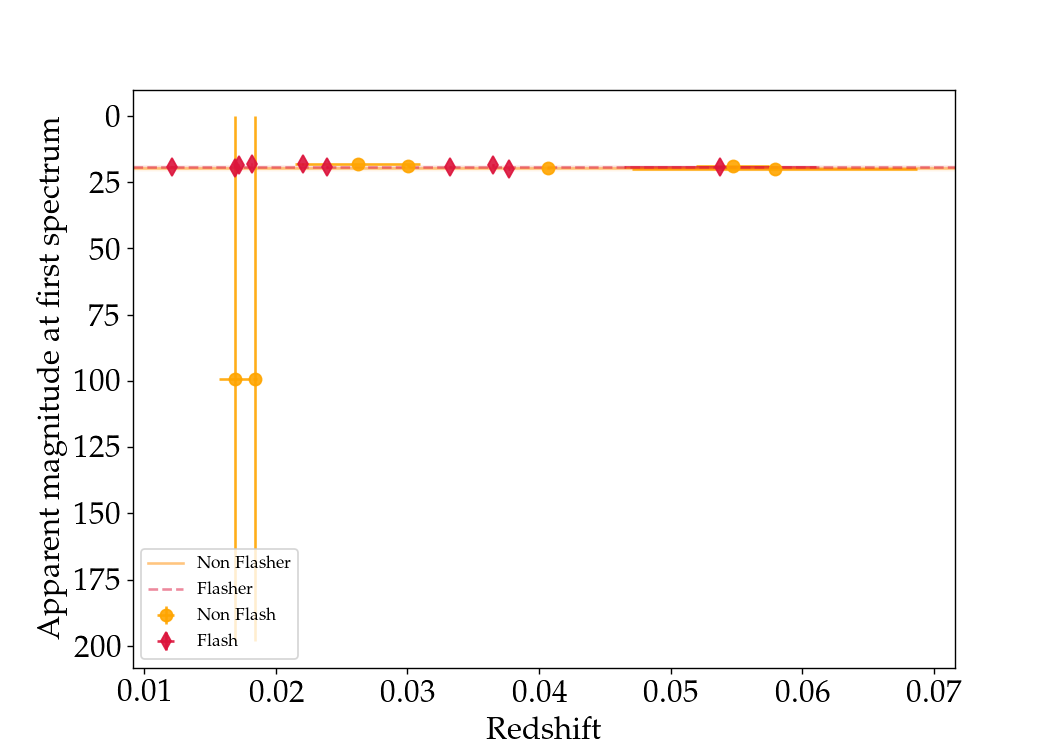

In [39]:
# ap magnitude at time of first spectrum (within 2d from explosion) r band

appmag_flash_r    = np.median(flash[flash['app_mag_r_at_FS']!=99.]['app_mag_r_at_FS'])
e_appmag_flash_r  = mad(flash[flash['app_mag_r_at_FS']!=99.]['app_mag_r_at_FS'])


appmag_nflash_r   = np.median(noflash[noflash['app_mag_r_at_FS']!=99.]['app_mag_r_at_FS'])
e_appmag_nflash_r = mad(noflash[noflash['app_mag_r_at_FS']!=99.]['app_mag_r_at_FS'])

plt.figure(figsize = (6*np.sqrt(2),6))



## Non flash
plt.errorbar(noflash['redshift'],noflash['app_mag_r_at_FS'], noflash['emagcorr_at_FS_r'], noflash['e_redshift'],
                 fmt='o',ms = 7,alpha = 0.9 ,color = 'orange', label = 'Non Flash')

plt.axhline(appmag_nflash_r, alpha = 0.5, color = 'darkorange', label = 'Non Flasher')
plt.axhspan(appmag_nflash_r- e_appmag_nflash_r, 
            appmag_nflash_r+ e_appmag_nflash_r, alpha = 0.05, color = 'darkorange')



## Flash
plt.errorbar(flash['redshift'],flash['app_mag_r_at_FS'], flash['emagcorr_at_FS_r'], flash['e_redshift'],
                 fmt='d',ms = 7,alpha = 0.9 ,color = 'crimson', label = 'Flash')

plt.axhline(appmag_flash_r, alpha = 0.5, color = 'crimson', ls = '--', label = 'Flasher')
plt.axhspan(appmag_flash_r-e_appmag_flash_r, 
            appmag_flash_r+e_appmag_flash_r, alpha = 0.05, color = 'crimson')


#### Text

# plt.text(18,flashmean_r-0.1, r'$\mu_{flash}$ = '+muflashr_strin+ r'$\pm$ '+ eflashr_strin +' mag', color = 'crimson', size = 10)
# plt.text(18,nflashmean_r+0.12, r'$\mu_{non flash}$ = '+ munflashr_strin+ r'$\pm$ '+ enflashr_strin +' mag', color = 'darkorange', size = 10)


# plt.text(rise_flashmean_r-1, -16,
#          r'$\mu_{flash}$ = '+mu_riseflashr_strin+ r'$\pm$ '+ e_riseflashr_strin +' d',
#          color = 'crimson', size = 10, rotation=90)
# plt.text(rise_nflashmean_r+0.12, -16,
#          r'$\mu_{non flash}$ = '+ mu_risenflashr_strin+ r'$\pm$ '+ e_risenflashr_strin +' d', 
#          color = 'darkorange', size = 10, rotation=90)



plt.xlabel('Redshift', size = 18)
plt.ylabel('Apparent magnitude at first spectrum', size = 18)
plt.legend()
plt.gca().invert_yaxis()

In [33]:
flash

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g,t_fs_g,magcorr_at_FS_g,emagcorr_at_FS_g,t_fs_r,magcorr_at_FS_r,emagcorr_at_FS_r,EBV,extinction_g,extinction_r,app_mag_g_at_FS,app_mag_r_at_FS
str12,str5,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str19,float64,str10,str3,str3,str9,str4,float64,str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abdbysy,SN II,yes?,SN IIP,2458295.705,2458294.781,2458296.4,ACAM+WHT,0.9234606,1.6180685,233.535367,56.6968577,0.012122,0.000175,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458334.75,DBSP+P200,-0.9810973016,0.001930022149,2458294.724,1.6760973,-15.49331020545953,0.0331526327068752,16.85753795836716,0.2862893468098687,-14.505103984137875,0.03272188124838144,10.372182527968567,0.3033303606071478,0.011610440903574113,0.0013302220278154035,0.03011464940724035,0.007192822166535693,10.821940937539091,7.09928796409179,1.5,19.906408253577023,0.28519256820246713,1.5,19.318639348695676,0.08521685250813474,0.015643794081706873,0.05865279500272776,0.041335241862766825,19.965061048579752,19.359974590558444
ZTF18abeajml,SN II,yes,SN II,2458303.799,2458302.797,2458304.794,SEDm+P60,1.0019,1.99674769,252.03236,24.3040949,0.036526,8.6e-05,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458331.71,SEDm+P60,-0.02632267313,1.331885814,2458303.773,1.02132267,-18.50264443512861,0.015414958320710454,10.42687184147541,1.5013246095658397,-18.549787640366937,0.007498228090990184,7.372101208620604,1.351557480278869,0.0204867406038592,0.0009898916851182882,0.03619533929041421,0.0026608903799914055,6.572604715042432,4.575926693168947,1.5,17.766773788176273,0.01982881885975067,1.5,18.17979830871433,0.026844799094455064,0.07315470564211132,0.27427668320749793,0.19329501752085543,18.04105047138377,18.373093326235185
ZTF18abgqvwv,SN II,yes?,SN IIP,2458313.73,2458312.838,2458314.569,ISIS+WHT,0.8915,1.73143,254.316401,31.9631992,0.037726,9.7e-05,2004SDSS3.C...0000:,--,--,no,yes,notype,yes,2458351.82,DBSP+P200,-1.02018285,0.001249450749,2458312.71,1.85918285,-16.814019840514156,0.006961016565343625,16.7395086276049,0.780814570522296,-16.656944283657296,0.030287354900355737,5.723185790692419,0.6022522133450261,-0.002767699609499243,0.0017236495965795575,0.0069464632463789545,0.0022731549446064706,14.424816825463473,4.47988680579762,1.5,19.853004123370212,0.09138520379328588,1.5,19.966755580936344,0.09327450693856626,0.026665694507007582,0.09997686656805135,0.07045815907118794,19.952980989938265,20.03721374000753
ZTF18abokyfk,SN II,yes,SN II,2458350.89,2458349.901,2458352.006,DBSP+P200,0.9891898,2.10471592,2.360629,47.3540827,0.017189,3.3e-05,1999ApJS..121..287H,--,--,yes,yes,Sbc,yes,2458470.335,ACAM+WHT,-0.01311684685,0.00810257263,2458350.877,1.12911685,-17.17781792076166,0.008184648340751678,14.129301377718392,1.0319524497021388,-17.01907663711989,0.0332647297080407,10.042441351563802,1.685214752840058,0.005844303818708419,0.0014540596351276867,0.026480640502759393,0.0014649410130147898,10.31568752100516,6.276399839859646,1.5,17.919136964553136,0.023842631167059918,1.5,18.33582791948638,0.03005616641400499,0.09372133185301457,0.35138650098862145,0.24763774693090967,18.270523465541757,18.58346566641729
ZTF18abwlsoi,SN II,yes,SN II,2458377.63,2458376.74,2458377.751,SEDm+P60,0.8952,1.0131723,261.897614,71.530251,0.05376479944,0.007318710553,meas,2458443.6,SEDm+P60,no,yes,--,yes,2458443.6,SEDm+P60,-0.021

In [34]:
noflash

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g,t_fs_g,magcorr_at_FS_g,emagcorr_at_FS_g,t_fs_r,magcorr_at_FS_r,emagcorr_at_FS_r,EBV,extinction_g,extinction_r,app_mag_g_at_FS,app_mag_r_at_FS
str12,str5,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str19,float64,str10,str3,str3,str9,str4,float64,str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abckutn,SN II,no,SN IIP,2458289.865,2458289.758,2458290.748,DBSP+P200,0.1074884,0.99028249,237.026897,55.7148553,0.040705,0.000123,1999PASP..111..438F,--,--,yes,yes,notype,yes,2458307.69,DBSP+P200,-0.1069391354,0.01501290292,2458289.758,0.98993913,-17.489833262081575,0.00961684735079223,16.19256326104363,0.29419405502410373,-17.511123656906882,0.014952041887626596,9.522573088435623,0.6234607506231766,0.008576205724715288,0.001859420359141762,0.029699745465459428,0.0059168450289302996,9.330205161421391,6.232506273806587,0.5,19.64484752656849,0.08899311725766686,0.5,19.823541151528865,0.10000184052630955,0.015276236046797792,0.057274720990724684,0.04036405161363562,19.702122247559217,19.8639052031425
ZTF18acqwdla,SN II,no,SN II,2458443.874,2458443.789,2458443.937,SEDm+P60,0.0855324,0.1481347,106.472662,12.8929375,0.026212141,0.004739291488,meas,2458616.456,EFOSC2+NTT,no,yes,--,yes,2458616.456,EFOSC2+NTT,-0.04249999998,0.04249999998,2458443.832,0.1055,-18.60137684700958,0.39262836644613214,12.183829851753528,1.2991954919750475,-18.754296156407,0.39288470141123233,11.513745758265994,0.38590822695090043,0.01596825397963348,0.0006413914572852468,0.03923859349765954,0.0008299446480697324,99.0,99.0,0.5,17.5676245786448,0.023086135528066695,0.5,18.063315670216,0.0304428153213332,0.05409120361763992,0.2028024826116915,0.14292395901566105,17.77042706125649,18.20623962923166
ZTF20aasijew,SN II,no,SN II,2458912.958,2458912.05,2458913.883,SEDm+P60,0.9078356,1.8329015,216.905399,69.6864096,0.030074,0.000143,1999PASP..111..438F,--,--,yes,yes,SB( r )b,no?,2458939.73,SEDm+P60,-0.4540000004,0.4540000001,2458912.504,1.379,-17.551070668914477,0.01088077673062743,15.084002527197475,0.4646181670871612,99.0,99.0,99.0,99.0,0.0332274252705501,0.00196996316182331,99.0,99.0,99.0,99.0,1.5,18.6097274209235,0.03536760468507226,1.5,18.740693328651954,0.04872157232403654,0.017500718211215245,0.06561490341036987,0.04624175032312758,18.675342324333872,18.78693507897508
ZTF20abfcdkj,SN II,no,SN II,2459013.75,2459012.82,2459015.0,GMOS+Gemini,0.9342,2.26059114,281.793965,60.4968018,0.05791714076,0.01083013884,meas,2459032.607,ALFOSC+NOT,yes,yes,--,yes,2459033.0,ALFOSC+NOT,-0.04948199798,0.007785345089,2459013.701,1.299482,-18.133900357482435,0.40617030183954944,15.059195936150012,0.7177939336865377,-18.08678188554342,0.40637722108978397,10.900480613206733,0.8449487500290667,0.00970984174913531,0.002348876267753915,0.025832792517778237,0.004240091807650365,11.62110115953528,6.141094110446522,1.5,19.60291732075582,0.05186409621416275,1.5,19.91405777967191,0.09696407057629386,0.03844010362269257,0.1441222957736223,0.10156941290424161,19.747039616529445,20.01562719257615
ZTF20abqkaoc,SN II,no,SN II,2459067.78,2459066.8,2459068.0,SPRAT+LT,0.9785,1.6040925,250.983335,77.879897,0.05471561806,0.002772355382,meas,2459075.5,DBSP+P200,yes,yes,--,yes,2459083.0,ALFOSC+NOT,-0.4899999998,0.49,2459067.29,0.71,-18.395962911287413,0.13310995822771887,10.832546170926655,0.5895848438055468,99.0,99.0,99.0,99.0,0.018447448

<IPython.core.display.Javascript object>


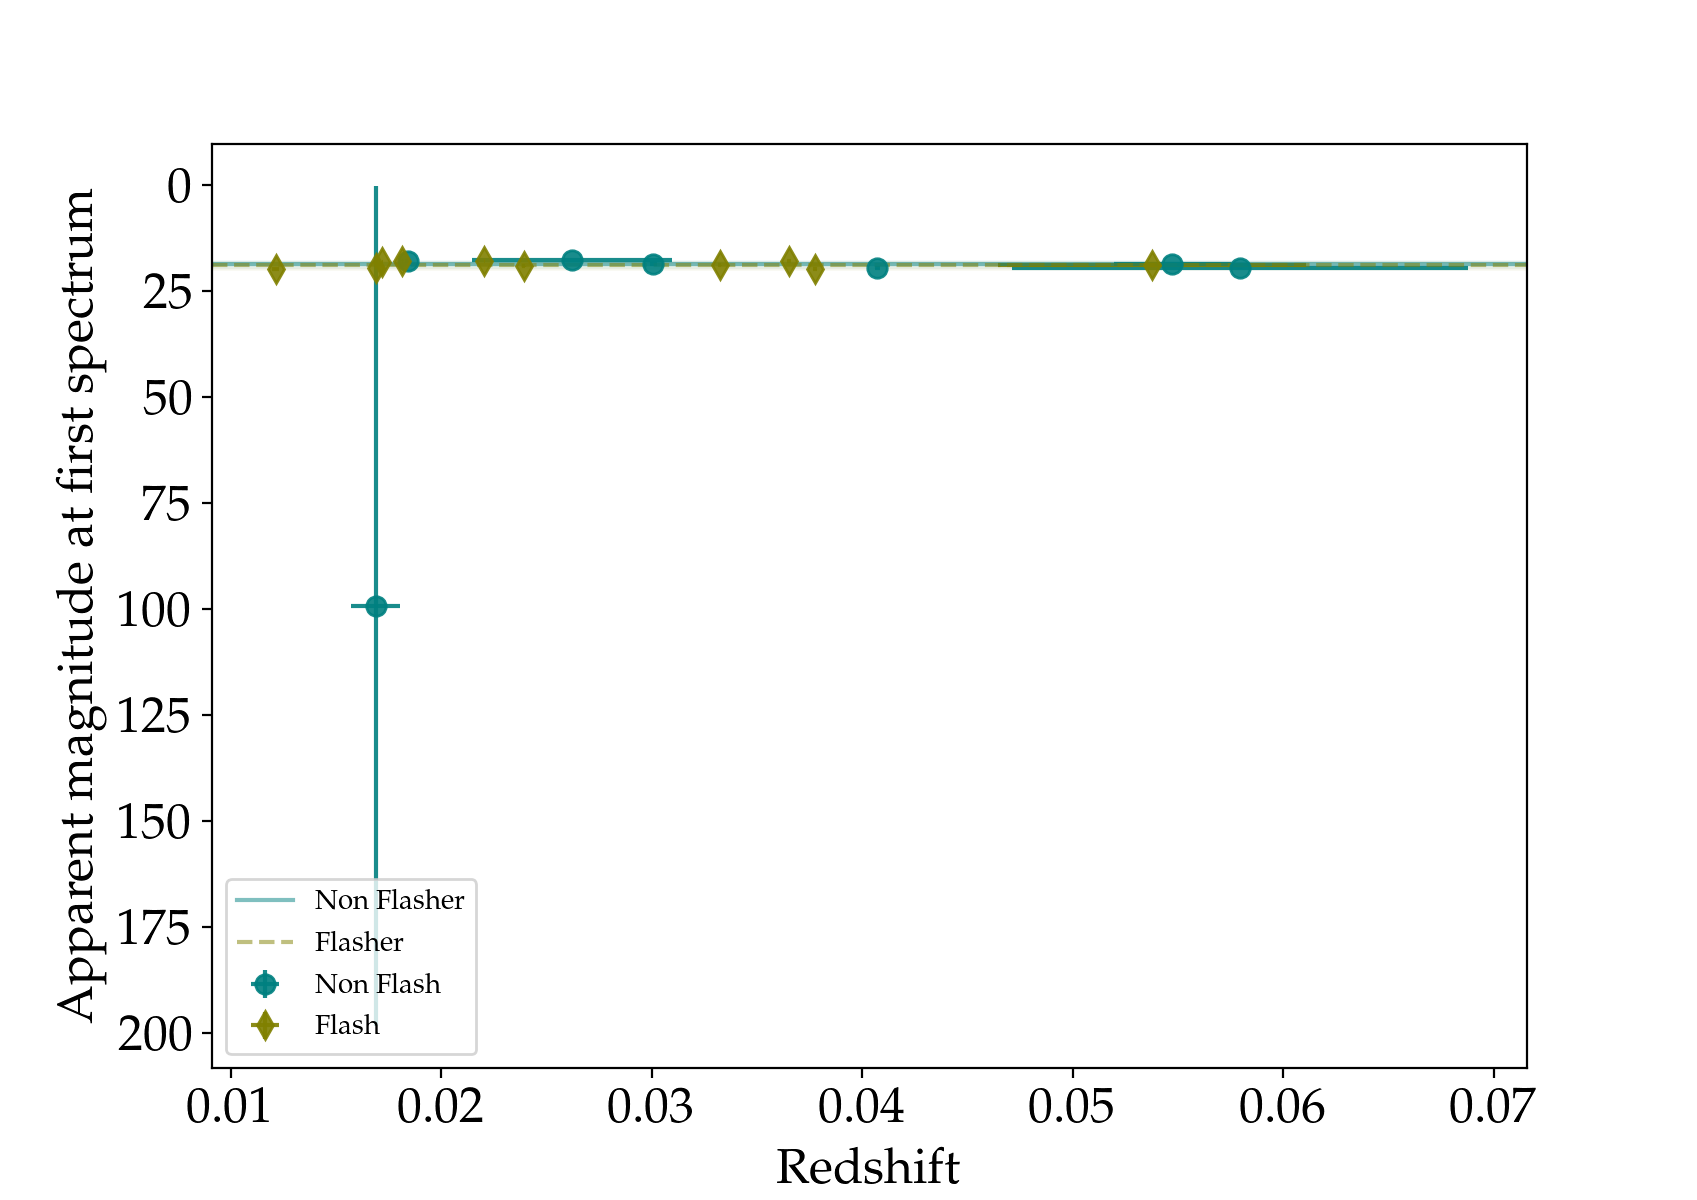

In [32]:
# ap magnitude at time of first spectrum (within 2d from explosion) g band

appmag_flash_g    = np.median(flash[flash['app_mag_g_at_FS']<99.]['app_mag_g_at_FS'])
e_appmag_flash_g  = mad(flash[flash['app_mag_g_at_FS']<99.]['app_mag_g_at_FS'])


appmag_nflash_g   = np.median(noflash[noflash['app_mag_g_at_FS']<99.]['app_mag_g_at_FS'])
e_appmag_nflash_g = mad(noflash[noflash['app_mag_g_at_FS']<99.]['app_mag_g_at_FS'])

plt.figure(figsize = (6*np.sqrt(2),6))



## Non flash
plt.errorbar(noflash['redshift'],noflash['app_mag_g_at_FS'], noflash['emagcorr_at_FS_g'], noflash['e_redshift'],
                 fmt='o',ms = 7,alpha = 0.9 ,color = 'teal', label = 'Non Flash')

plt.axhline(appmag_nflash_g, alpha = 0.5, color = 'teal', label = 'Non Flasher')
plt.axhspan(appmag_nflash_g- e_appmag_nflash_g, 
            appmag_nflash_g+ e_appmag_nflash_g, alpha = 0.05, color = 'teal')



## Flash
plt.errorbar(flash['redshift'],flash['app_mag_g_at_FS'], flash['emagcorr_at_FS_g'], flash['e_redshift'],
                 fmt='d',ms = 7,alpha = 0.9 ,color = 'olive', label = 'Flash')

plt.axhline(appmag_flash_g, alpha = 0.5, color = 'olive', ls = '--', label = 'Flasher')
plt.axhspan(appmag_flash_g-e_appmag_flash_g, 
            appmag_flash_g+e_appmag_flash_g, alpha = 0.05, color = 'olive')


#### Text

# plt.text(18,flashmean_r-0.1, r'$\mu_{flash}$ = '+muflashr_strin+ r'$\pm$ '+ eflashr_strin +' mag', color = 'crimson', size = 10)
# plt.text(18,nflashmean_r+0.12, r'$\mu_{non flash}$ = '+ munflashr_strin+ r'$\pm$ '+ enflashr_strin +' mag', color = 'darkorange', size = 10)


# plt.text(rise_flashmean_r-1, -16,
#          r'$\mu_{flash}$ = '+mu_riseflashr_strin+ r'$\pm$ '+ e_riseflashr_strin +' d',
#          color = 'crimson', size = 10, rotation=90)
# plt.text(rise_nflashmean_r+0.12, -16,
#          r'$\mu_{non flash}$ = '+ mu_risenflashr_strin+ r'$\pm$ '+ e_risenflashr_strin +' d', 
#          color = 'darkorange', size = 10, rotation=90)



plt.xlabel('Redshift', size = 18)
plt.ylabel('Apparent magnitude at first spectrum', size = 18)
plt.legend()
plt.gca().invert_yaxis()

# Building table

In [13]:
weak['Fs-Texp'].info.format = '7.2f'
weak['peakabsmag_r'].info.format = '7.2f'
weak['e_peakabsmag_r'].info.format = '7.2f'
weak['peakabsmag_g'].info.format = '7.2f'
weak['e_peakabsmag_g'].info.format = '7.2f'
weak['peakday_r'].info.format = '7.2f'
weak['e_peakday_r'].info.format = '7.2f'
weak['peakday_g'].info.format = '7.2f'
weak['e_peakday_g'].info.format = '7.2f'


weak['redshift'].info.format = '7.3f'
weak['e_redshift'].info.format = '7.4f'

In [14]:
weak.sort('Fs-Texp')

In [15]:
ascii.write(weak['name','Flasher', 'Fs-Texp', 'instrument-fs', 'redshift', 'e_redshift',
                 'peakabsmag_r', 'e_peakabsmag_r', 'peakday_r', 'e_peakday_r',
                 'peakabsmag_g', 'e_peakabsmag_g', 'peakday_g', 'e_peakday_g',],
            sys.stdout, Writer = ascii.Latex,
            latexdict = {'tabletype': 'table*'})

\begin{table*}
\begin{tabular}{cccccccccccccc}
name & Flasher & Fs-Texp & instrument-fs & redshift & e_redshift & peakabsmag_r & e_peakabsmag_r & peakday_r & e_peakday_r & peakabsmag_g & e_peakabsmag_g & peakday_g & e_peakday_g \\
ZTF18acqwdla & no & 0.11 & SEDm+P60 & 0.026 & 0.0047 & -18.60 & 0.39 & 12.18 & 1.30 & -18.75 & 0.39 & 11.51 & 0.39 \\
ZTF18abwlsoi & yes & 0.14 & SEDm+P60 & 0.054 & 0.0073 & -18.52 & 0.30 & 6.29 & 0.39 & -18.58 & 0.30 & 4.88 & 0.29 \\
ZTF19abqhobb & yes & 0.17 & SEDm+P60 & 0.018 & 0.0000 & -17.64 & 0.01 & 8.58 & 0.57 & -17.47 & 0.02 & 7.68 & 1.22 \\
ZTF20abqkaoc & no & 0.71 & SPRAT+LT & 0.055 & 0.0028 & -18.40 & 0.13 & 10.83 & 0.59 & 99.00 & 99.00 & 99.00 & 99.00 \\
ZTF20ablygyy & yes & 0.86 & DOLORES+TNG & 0.017 & 0.0000 & -18.25 & 0.01 & 11.01 & 0.27 & -18.27 & 0.00 & 6.27 & 0.53 \\
ZTF20abxyjtx & yes & 0.89 & ALFOSC+NOT & 0.033 & 0.0001 & -17.87 & 0.29 & 12.37 & 1.57 & 99.00 & 99.00 & 99.00 & 99.00 \\
ZTF18abckutn & no & 0.99 & DBSP+P200 & 0.041 & 0.0001 &

## Flasher statistics

### First spectrum within 2 days from the estimated explosion time

In [118]:


subsamp_2d = table_infants[table_infants['Fs-Texp']<=2.]
subsamp_2d = subsamp_2d[(subsamp_2d['rach-classification']=='SN II')]

In [119]:
subsamp_2d.show_in_notebook()

idx,name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
0,ZTF18abckutn,SN II,no,SN IIP,2458289.865,2458289.758,2458290.748,DBSP+P200,0.1074884,0.99028249,237.026897,55.7148553,0.040705,0.000123,1999PASP..111..438F,--,--,yes,yes,notype,yes,2458307.69,DBSP+P200,-0.1069391354,0.01501290292,2458289.758,0.98993913,-17.489833262081575,0.00961684735079223,16.19256326104363,0.29419405502410373,-17.511123656906882,0.014952041887626596,9.522573088435623,0.6234607506231766,0.008576205724715288,0.001859420359141762,0.029699745465459428,0.0059168450289302996,9.330205161421391,6.232506273806587
1,ZTF18abdbysy,SN II,yes?,SN IIP,2458295.705,2458294.781,2458296.4,ACAM+WHT,0.9234606,1.6180685,233.535367,56.6968577,0.012122,0.000175,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458334.75,DBSP+P200,-0.9810973016,0.001930022149,2458294.724,1.6760973,-15.49331020545953,0.0331526327068752,16.85753795836716,0.2862893468098687,-14.505103984137875,0.03272188124838144,10.372182527968567,0.3033303606071478,0.011610440903574113,0.0013302220278154035,0.03011464940724035,0.007192822166535693,10.821940937539091,7.09928796409179
2,ZTF18abeajml,SN II,yes,SN II,2458303.799,2458302.797,2458304.794,SEDm+P60,1.0019,1.99674769,252.03236,24.3040949,0.036526,8.6e-05,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458331.71,SEDm+P60,-0.02632267313,1.331885814,2458303.773,1.02132267,-18.50264443512861,0.015414958320710454,10.42687184147541,1.5013246095658397,-18.549787640366937,0.007498228090990184,7.372101208620604,1.351557480278869,0.0204867406038592,0.0009898916851182882,0.03619533929041421,0.0026608903799914055,6.572604715042432,4.575926693168947
3,ZTF18abgqvwv,SN II,yes?,SN IIP,2458313.73,2458312.838,2458314.569,ISIS+WHT,0.8915,1.73143,254.316401,31.9631992,0.037726,9.7e-05,2004SDSS3.C...0000:,--,--,no,yes,notype,yes,2458351.82,DBSP+P200,-1.02018285,0.001249450749,2458312.71,1.85918285,-16.814019840514156,0.006961016565343625,16.7395086276049,0.780814570522296,-16.656944283657296,0.030287354900355737,5.723185790692419,0.6022522133450261,-0.002767699609499243,0.0017236495965795575,0.0069464632463789545,0.0022731549446064706,14.424816825463473,4.47988680579762
4,ZTF18abokyfk,SN II,yes,SN II,2458350.89,2458349.901,2458352.006,DBSP+P200,0.9891898,2.10471592,2.360629,47.3540827,0.017189,3.3e-05,1999ApJS..121..287H,--,--,yes,yes,Sbc,yes,2458470.335,ACAM+WHT,-0.01311684685,0.00810257263,2458350.877,1.12911685,-17.17781792076166,0.008184648340751678,14.129301377718392,1.0319524497021388,-17.01907663711989,0.0332647297080407,10.042441351563802,1.685214752840058,0.005844303818708419,0.0014540596351276867,0.026480640502759393,0.0014649410130147898,10.31568752100516,6.276399839859646
5,ZTF18abwlsoi,SN II,yes,SN II,2458377.63,2458376.74,2458377.751,SEDm+P60,0.8952,1.0131723,261.897614,71.530251,0.05376479944,0.007318710553,meas,2458443.6,SEDm+P60,no,yes,--,yes,2458443.6,SEDm+P60,-0.02146235453,0.002665623404,2458377.609,0.14246235,-18.518220748706636,0.29569547023108217,6.291511375496778,0.3851094457398963,-18.581476347170103,0.2963036637351274,4.884686383300792,0.285709373570058,0.031614797151004376,0.008121157616170814,0.045954074587724325,0.007425436176296284,4.868515110202693,3.165895028481702
6,ZTF18acqwdla,SN II,no,SN II,2458443.874,2458443.789,2458443.937,SEDm+P60,0.0855324,0.1481347,106.472662,12.8929375,0.026212141,0.004739291488,meas,2458616.456,EFOSC2+NTT,no,yes,--,yes,2458616.456,EFOSC2+NTT,-0.04249999998,0.04249999998,2458443.832,0.1055,-18.60137684700958,0.39262836644613214,12.183829851753528,1.2991954919750475,-18.754296156407,0.39288470141123233,11.513745758265994,0.385908

In [120]:
subsamp_2d[subsamp_2d['Flasher']=='yes']

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
str12,str10,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str69,float64,str11,str4,str4,str12,str4,float64,str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abeajml,SN II,yes,SN II,2458303.799,2458302.797,2458304.794,SEDm+P60,1.0019,1.99674769,252.03236,24.3040949,0.036526,8.6e-05,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458331.71,SEDm+P60,-0.02632267313,1.331885814,2458303.773,1.02132267,-18.50264443512861,0.015414958320710454,10.42687184147541,1.5013246095658397,-18.549787640366937,0.007498228090990184,7.372101208620604,1.351557480278869,0.0204867406038592,0.0009898916851182882,0.03619533929041421,0.0026608903799914055,6.572604715042432,4.575926693168947
ZTF18abokyfk,SN II,yes,SN II,2458350.89,2458349.901,2458352.006,DBSP+P200,0.9891898,2.10471592,2.360629,47.3540827,0.017189,3.3e-05,1999ApJS..121..287H,--,--,yes,yes,Sbc,yes,2458470.335,ACAM+WHT,-0.01311684685,0.00810257263,2458350.877,1.12911685,-17.17781792076166,0.008184648340751678,14.129301377718392,1.0319524497021388,-17.01907663711989,0.0332647297080407,10.042441351563802,1.685214752840058,0.005844303818708419,0.0014540596351276867,0.026480640502759393,0.0014649410130147898,10.31568752100516,6.276399839859646
ZTF18abwlsoi,SN II,yes,SN II,2458377.63,2458376.74,2458377.751,SEDm+P60,0.8952,1.0131723,261.897614,71.530251,0.05376479944,0.007318710553,meas,2458443.6,SEDm+P60,no,yes,--,yes,2458443.6,SEDm+P60,-0.02146235453,0.002665623404,2458377.609,0.14246235,-18.518220748706636,0.29569547023108217,6.291511375496778,0.3851094457398963,-18.581476347170103,0.2963036637351274,4.884686383300792,0.285709373570058,0.031614797151004376,0.008121157616170814,0.045954074587724325,0.007425436176296284,4.868515110202693,3.165895028481702
ZTF19abqhobb,SN II,yes,SN II,2458714.663,2458713.742,2458714.792,SEDm+P60,0.9213,1.0508631,261.4111,59.4467303,0.01815,1e-05,2006AJ....132..231P,--,--,yes,yes,Scd( f ),yes,2458878.71,ALFOSC+NOT,-0.0379833268,0.00608132416,2458714.625,0.16698333,-17.64125267005545,0.00866796071694527,8.582697522693397,0.5669372272342655,-17.465368004847953,0.019635823367565336,7.682337884769271,1.2202711183018025,0.010103578145785736,0.0007073497740846882,0.02204664496274497,0.0014619438297216788,7.833160915760206,4.327674459143019
ZTF19abueupg,SN II,yes,SN II,2458724.65,2458723.81,2458725.0,KAST+Lick,0.8381,1.05203241,267.80329,51.3825496,0.017,0.005,superfit,2458728.5,KAST+Lick,yes,yes,--,no?,2458726.867,LRIS+Keck,-0.06598457236,0.01248434827,2458724.584,0.41598457,-16.95681076130405,0.3773607420941401,7.308715897967324,0.24736832618732948,-17.02767166159192,0.37741020899787786,7.090234361829822,0.3435141398378344,0.004205001496146869,0.0016525030563393777,0.023564288696171647,0.0033249787331478004,6.125237700242728,5.283687875084523
ZTF19acryurj,SN II,yes,SN II,2458800.79,2458799.805,2458801.991,GMOS+Gemini,0.9845,2.18556632,13.5933959,31.6701819,0.022035,3e-05,1999PASP..111..438F,--,--,yes,yes,Scd,yes,2458851.68,SEDm+P60,-0.7930354097,0.03180023974,2458799.997,1.99403541,-18.174868362848947,0.019641623004026457,12.474288294860525,1.653309210781393,-18.020185604926763,0.002957939871472252,15.14928994756515,0.11212448745559071,0.01811168499078665,0.0008267861935223747,0.035946359943563766,0.0012075309354014595,8.863190847760377,9.130079328154752
ZTF20ablygyy,SN II,yes,SN II,2459046.698,2459045.754,2459047.403,DOLORES+TNG,0.9434,1.64900626,225.958184,42.1140315,0.016872,2.3e-05,

In [121]:
subsamp_2d[subsamp_2d['Flasher']=='yes?']

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
str12,str10,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str69,float64,str11,str4,str4,str12,str4,float64,str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abdbysy,SN II,yes?,SN IIP,2458295.705,2458294.781,2458296.4,ACAM+WHT,0.9234606,1.6180685,233.535367,56.6968577,0.012122,0.000175,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458334.75,DBSP+P200,-0.9810973016,0.001930022149,2458294.724,1.6760973,-15.49331020545953,0.0331526327068752,16.85753795836716,0.2862893468098687,-14.505103984137875,0.03272188124838144,10.372182527968567,0.3033303606071478,0.011610440903574113,0.0013302220278154035,0.03011464940724035,0.007192822166535693,10.821940937539091,7.09928796409179
ZTF18abgqvwv,SN II,yes?,SN IIP,2458313.73,2458312.838,2458314.569,ISIS+WHT,0.8915,1.73143,254.316401,31.9631992,0.037726,9.7e-05,2004SDSS3.C...0000:,--,--,no,yes,notype,yes,2458351.82,DBSP+P200,-1.02018285,0.001249450749,2458312.71,1.85918285,-16.814019840514156,0.006961016565343625,16.7395086276049,0.780814570522296,-16.656944283657296,0.030287354900355737,5.723185790692419,0.6022522133450261,-0.002767699609499243,0.0017236495965795575,0.0069464632463789545,0.0022731549446064706,14.424816825463473,4.47988680579762


In [122]:
subsamp_2d[subsamp_2d['Flasher']=='no']

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
str12,str10,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str69,float64,str11,str4,str4,str12,str4,float64,str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abckutn,SN II,no,SN IIP,2458289.865,2458289.758,2458290.748,DBSP+P200,0.1074884,0.99028249,237.026897,55.7148553,0.040705,0.000123,1999PASP..111..438F,--,--,yes,yes,notype,yes,2458307.69,DBSP+P200,-0.1069391354,0.01501290292,2458289.758,0.98993913,-17.489833262081575,0.00961684735079223,16.19256326104363,0.29419405502410373,-17.511123656906882,0.014952041887626596,9.522573088435623,0.6234607506231766,0.008576205724715288,0.001859420359141762,0.029699745465459428,0.0059168450289302996,9.330205161421391,6.232506273806587
ZTF18acqwdla,SN II,no,SN II,2458443.874,2458443.789,2458443.937,SEDm+P60,0.0855324,0.1481347,106.472662,12.8929375,0.026212141,0.004739291488,meas,2458616.456,EFOSC2+NTT,no,yes,--,yes,2458616.456,EFOSC2+NTT,-0.04249999998,0.04249999998,2458443.832,0.1055,-18.60137684700958,0.39262836644613214,12.183829851753528,1.2991954919750475,-18.754296156407,0.39288470141123233,11.513745758265994,0.38590822695090043,0.01596825397963348,0.0006413914572852468,0.03923859349765954,0.0008299446480697324,99.0,99.0
ZTF19aatqzrb,SN II,no,SN II,2458606.799,2458605.888,2458607.87,SEDm+P60,0.9103588,1.9821106,221.652383,56.2342197,0.038136,9e-05,1988AJ.....95.1602S,--,--,no,yes,notype,no?,2458616.902,DBSP+P200,-0.01225465929,0.002565603556,2458606.787,1.08325466,-17.203746852930166,0.013660957745520251,17.561061757168286,0.729005380149389,-16.97636231923359,0.01592565259282788,10.330295126430208,0.9424960372674184,0.010127175501533262,0.0026255683466046543,0.02635034078202941,0.003927785695777718,13.29031357816509,5.845258530462861
ZTF19abbwfgp,SN II,no,SN IIP,2458661.82,2458660.843,2458663.759,SEDm+P60,0.9774,2.9160862,258.323795,43.7843194,0.025925,0.000117,1996AJ....112.1803M,--,--,no,yes,notype,yes,2458765.626,SEDm+P60,-0.003414843865,3.554028127,2458661.817,1.94241484,-18.186342251238855,0.014048037207915394,16.568761702761094,3.902908966038234,-18.320690934249058,0.012077415898528105,10.069203091028774,3.5684189048473307,0.010489959256260756,0.0008571756329513857,0.026363764932218915,0.0018966819703930445,8.963188294655511,6.870977314482737
ZTF19abrlvij,SN II,no,SN II,2458719.65,2458718.81,2458719.863,SEDm+P60,0.8405,1.0517319,260.142987,51.6327799,0.04737034239,0.001434140161,meas,2458780.673,DBSP+P200,yes,yes,--,yes,2458781.0,DBSP+P200,-0.8406629158,0.009803902951,2458718.809,1.05366292,-17.791342492213754,0.06614611436315786,10.220441432622941,0.40581480560957633,-17.66064111955716,0.06817193330860039,7.644293032604692,0.44709852181771625,0.014235298328977889,0.0033275365092662107,0.029569488704127327,0.006285098627985899,9.523976021510613,4.545650233313706
ZTF20aasfhia,SN II,no,SN II,2458912.78,2458911.97,2458913.818,SEDm+P60,0.8106,1.8516465,184.913045,33.0403926,0.04869508011,0.01474643786,meas,2458936.893,SEDm+P60,yes,no,--,yes?,2458936.893,SEDm+P60,-0.08261871974,0.01188694661,2458912.697,1.12061872,-18.177945794632286,0.6686043863886,11.415664797123556,1.2159240347124567,-18.422525524030988,0.6607434809286058,7.920384955373292,0.5639222901267563,0.015904280323571995,0.0016076446339417143,0.062486875594247544,0.00369506588537152,6.311393057452039,4.700437260904928
ZTF20aasijew,SN II,no,SN II,2458912.958,2458912.05,2458913.883,SEDm+P60,0.9078356,1.8329015,216.905399,69.6864096,0.030

In [123]:
# noflash_2d = subsamp_2d[subsamp_2d['Flasher']=='no']

# noflash_2d[noflash_2d['instrument-fs']=='SEDm+P60']

### Raw stat without Bayesian analysis 


### 44.0 % have flash features

In [124]:
## considering the "yes?" as flashers


11*100/25

44.0

In [125]:
peas = np.linspace(0,1,1001)


pofpknowd = []

for pp in peas:
    P_p_D = posterior(pp,25,11,14)
    pofpknowd.append(P_p_D)
    
# print(pofpknowd)
# peas = list(peas)


lapaix    = Table([peas,pofpknowd],names = ('p','P(p|D)'))
lapaix['P(p|D)_norm'] = lapaix['P(p|D)']/np.sum(lapaix['P(p|D)'])

# lapaix.show_in_notebook()

In [126]:
y    = lapaix['P(p|D)']
full = simps(y,peas)

## 95% confidence interval 

## 0.266<p<0.631

In [136]:
lowerbound = lapaix[lapaix['p']<=0.266]

p_lb   = lowerbound['p'] 
PpD_lb = lowerbound['P(p|D)']
dpc_l = simps(PpD_lb,p_lb)
dpc_l

0.025092625761535318

In [137]:
upperbound = lapaix[lapaix['p']>=0.631]

p_ub   = upperbound['p'] 
PpD_ub = upperbound['P(p|D)']
dpc_u = simps(PpD_ub,p_ub)
dpc_u

0.024885260793548573

## 99% CL

## 0.219<p<0.685

In [148]:
lowerbound = lapaix[lapaix['p']<=0.219]

p_lb   = lowerbound['p'] 
PpD_lb = lowerbound['P(p|D)']
dpc_l = simps(PpD_lb,p_lb)
dpc_l

0.005177958340043674

In [149]:
upperbound = lapaix[lapaix['p']>=0.685]

p_ub   = upperbound['p'] 
PpD_ub = upperbound['P(p|D)']
dpc_u = simps(PpD_ub,p_ub)
dpc_u

0.005120236052714753

<IPython.core.display.Javascript object>


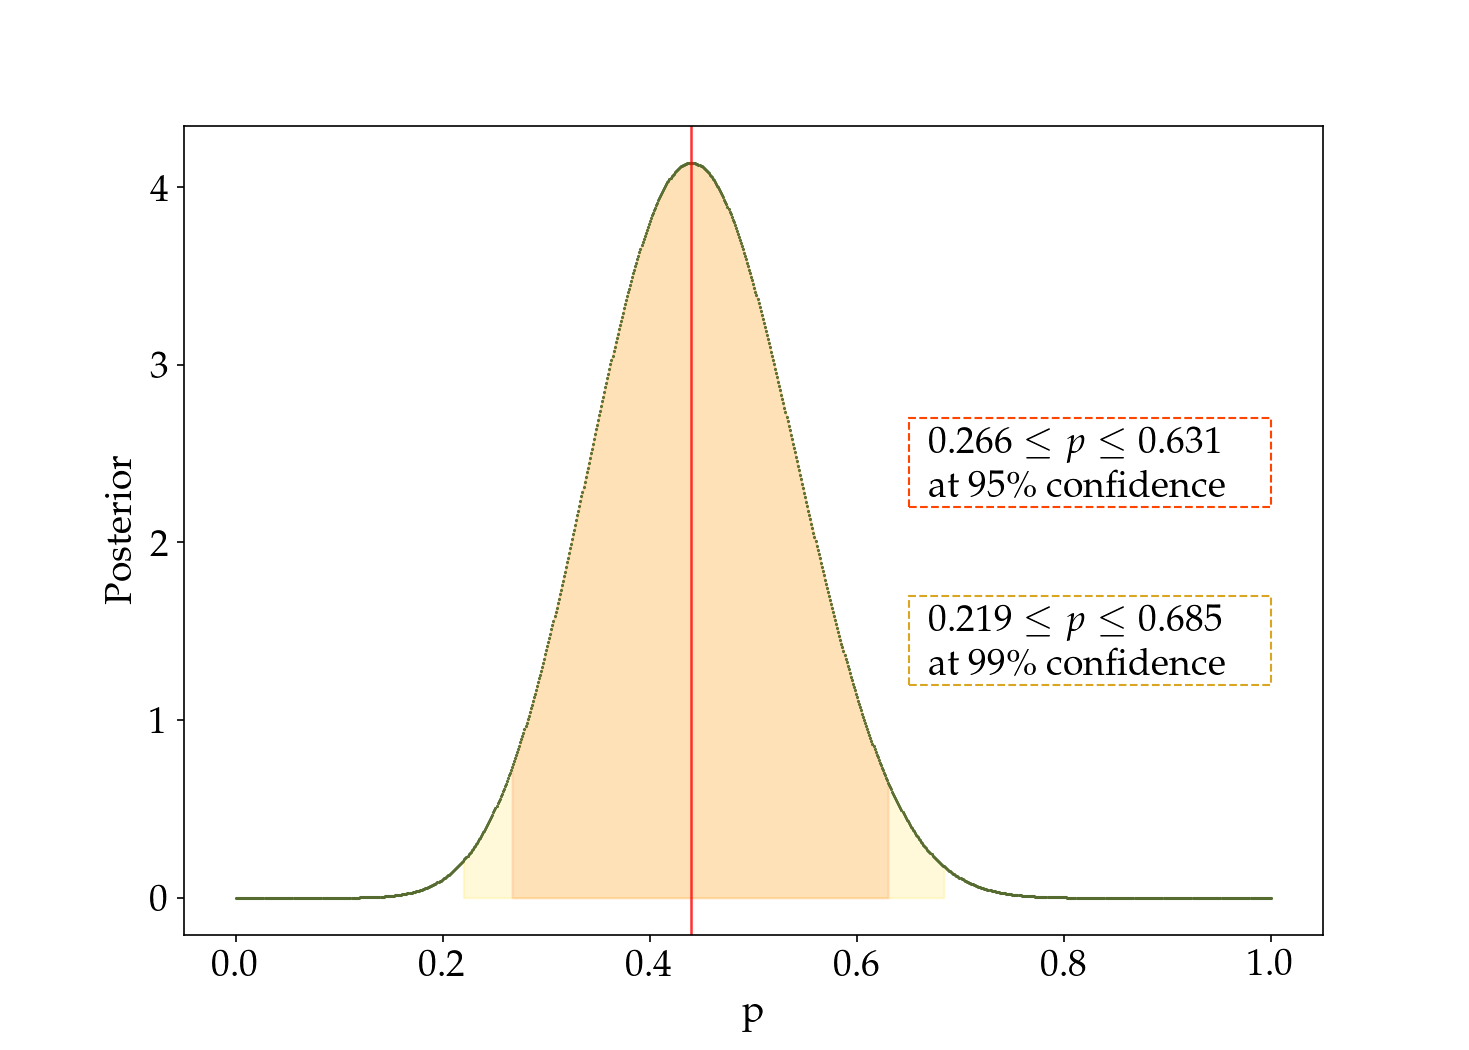

Text(0, 0.5, 'Posterior')

In [152]:
fig = plt.figure(figsize = (7*1.4,7))
ax  = fig.subplots(1)
ax.plot(lapaix['p'],lapaix['P(p|D)'], lw =0, marker = 'o', ms = 0.5, color = 'darkolivegreen' )

# 13 flashers

# 95% confidence interval
# 0.266<p<0.631

# 99% CL
# 0.219<p<0.685

ax.fill_between(lapaix['p'],0,lapaix['P(p|D)'], where= (lapaix['p']>0.266) & (lapaix['p']<0.631) ,
                color = 'orangered', alpha = 0.15) # 95% CL


ax.fill_between(lapaix['p'],0,lapaix['P(p|D)'], where= (lapaix['p']>0.219) & (lapaix['p']<0.685) ,
                color = 'gold', alpha = 0.15) # 99% CL


# ax.fill_between(lapaix['p'],0,lapaix['P(p|D)'], where= (lapaix['p']>0.2915) & (lapaix['p']<0.6225) ,
#                 color = 'orangered', alpha = 0.15) # 95% CL


# ax.fill_between(lapaix['p'],0,lapaix['P(p|D)'], where= (lapaix['p']>0.246) & (lapaix['p']<0.673) ,
#                 color = 'gold', alpha = 0.15) # 99% CL 


ax.axvline(0.44,lw = 1.2, color = 'red', alpha = 0.8)
# ax.axvline(0.2915, ymax = 0.2, lw = 1.2, ls = '--', color = 'orangered', alpha = 0.8)
# ax.axvline(0.6225, ymax = 0.25 ,lw = 1.2, ls = '--', color = 'orangered', alpha = 0.8)


# ax.axvline(0.246, ymax = 0.09, lw = 1.2, ls = '--', color = 'goldenrod')
# ax.axvline(0.673, ymax = 0.1 ,lw = 1.2, ls = '--', color = 'goldenrod')



ax.text(0.67,2.5,r'$0.266 \leq p \leq 0.631 $', size = 18)
ax.text(0.67,2.25,'at 95\% confidence', size = 18)

ax.add_patch(patches.Rectangle((0.65, 2.2),0.35,0.5,fill=False, color = 'orangered', ls = '--' )  ) 
ax.add_patch(patches.Rectangle((0.65, 1.2),0.35,0.5,fill=False, color = 'goldenrod', ls = '--'  )  ) 



ax.text(0.67,1.5,r'$0.219 \leq p \leq 0.685 $', size = 18)
ax.text(0.67,1.25,'at 99\% confidence', size = 18)


plt.xlabel('p', size = 18)
plt.ylabel('Posterior', size = 18)

In [154]:
plt.savefig('/Users/r.saturn/PhD/WIP/Full_RISNeII_ZTF1/figures/flasher_statistics/2d_subsample_standardSNeII_flas_stat.pdf')

## Comparison with restricted sample and bigger sample

In [78]:
peas = np.linspace(0,1,1001)


pofpknowd = []

for pp in peas:
    P_p_D = posterior(pp,10,6,4)
    pofpknowd.append(P_p_D)
    
# print(pofpknowd)
# peas = list(peas)


lapaix_old    = Table([peas,pofpknowd],names = ('p','P(p|D)'))
lapaix_old['P(p|D)_norm'] = lapaix_old['P(p|D)']/np.sum(lapaix_old['P(p|D)'])


pofpknowd = []

for pp in peas:
    P_p_D = posterior(pp,32,13,19)
    pofpknowd.append(P_p_D)
    
# print(pofpknowd)
# peas = list(peas)


lapaix_new    = Table([peas,pofpknowd],names = ('p','P(p|D)'))
lapaix_new['P(p|D)_norm'] = lapaix_new['P(p|D)']/np.sum(lapaix_new['P(p|D)'])

# lapaix.show_in_notebook()

<IPython.core.display.Javascript object>


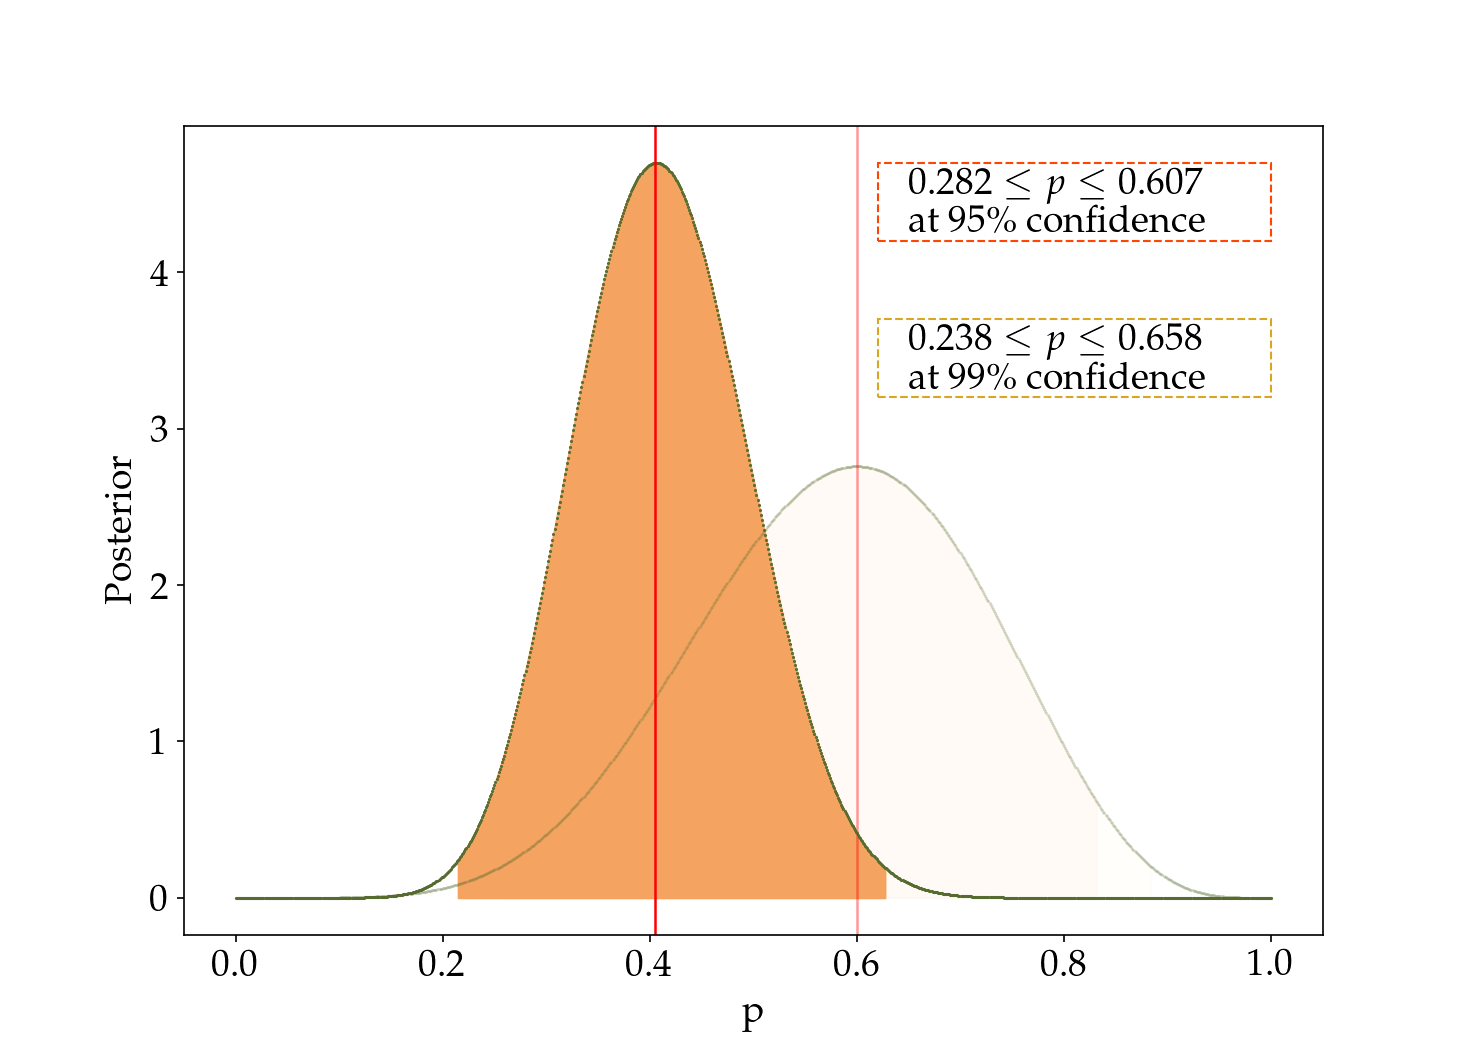

Text(0, 0.5, 'Posterior')

In [80]:

fig = plt.figure(figsize = (7*1.4,7))
ax  = fig.subplots(1)


########## OLD 
# for 6 flashers instead of 
#95
# 0.308 < p < 0.832

#99
# 0.235< p < 0.885

ax.plot(lapaix_old['p'],lapaix_old['P(p|D)'], lw =0, marker = 'o', ms = 0.5, 
        alpha = 0.2 ,color = 'darkolivegreen' )

ax.fill_between(lapaix_old['p'],0,lapaix_old['P(p|D)'], where= (lapaix_old['p']>0.235) & (lapaix_old['p']<0.885) ,
                color = 'gold', alpha = 0.02) # 99%
ax.fill_between(lapaix_old['p'],0,lapaix_old['P(p|D)'], where= (lapaix_old['p']>0.308) & (lapaix_old['p']<0.832) ,
                color = 'orangered', alpha = 0.02) #95%


ax.axvline(0.6,lw = 1.2, color = 'red', alpha = 0.4)
# ax.axvline(0.308, ymax = 0.2, lw = 1.2, ls = '--', color = 'orangered', alpha = 0.4)
# ax.axvline(0.832, ymax = 0.25 ,lw = 1.2, ls = '--', color = 'orangered', alpha = 0.4)

# ax.axvline(0.235, ymax = 0.09, lw = 1.2, ls = '--', color = 'goldenrod', alpha = 0.4)
# ax.axvline(0.885, ymax = 0.1 ,lw = 1.2, ls = '--', color = 'goldenrod', alpha = 0.4)





######## NEW

# 95% confidence interval
# 0.282<p<0.607

# 99% CL
# 0.238<p<0.658



### 2d sybsample stats NEW as of 15/03/2022
# 95% confidence interval
# 0.255<p<0.579

# 99% CL
# 0.214<p<0.628



ax.plot(lapaix_new['p'],lapaix_new['P(p|D)'], lw =0, marker = 'o', ms = 0.5, color = 'darkolivegreen' )

ax.axvline(0.405,lw = 1.2, color = 'red')

ax.fill_between(lapaix_new['p'],0,lapaix_new['P(p|D)'], where= (lapaix_new['p']>0.255) & (lapaix_new['p']<0.579) ,
                color = 'lightyellow') # 99% CL

ax.fill_between(lapaix_new['p'],0,lapaix_new['P(p|D)'], where= (lapaix_new['p']>0.214) & (lapaix_new['p']<0.628) ,
                color = 'sandybrown') # 95% CL


ax.text(0.65,4.5,r'$0.282 \leq p \leq 0.607 $', size = 18)
ax.text(0.65,4.25,'at 95\% confidence', size = 18)

ax.text(0.65,3.5,r'$0.238 \leq p \leq 0.658 $', size = 18)
ax.text(0.65,3.25,'at 99\% confidence', size = 18)


ax.add_patch(patches.Rectangle((0.62, 4.2),0.38,0.5,fill=False, color = 'orangered', ls = '--' )  ) 
ax.add_patch(patches.Rectangle((0.62, 3.2),0.38,0.5,fill=False, color = 'goldenrod', ls = '--'  )  ) 




plt.xlabel('p', size = 18)
plt.ylabel('Posterior', size = 18)






In [81]:
plt.savefig('/Users/r.saturn/PhD/WIP/Full_RISNeII_ZTF1/figures/flasher_statistics/2d_subsample_statistics_oldvs_new_23032022.pdf')

## Subsample 3.5d from EED (the eith percentile of the flashers time to first spec)

In [66]:
subsamp_7d = table_infants[(table_infants['Fs-Texp']<=5)]

In [67]:
subsamp_7d = subsamp_7d[(subsamp_7d['rach-classification']=='SN II')|(subsamp_7d['rach-classification']=='SN IIP')]

In [68]:
subsamp_7d.show_in_notebook()

idx,name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
0,ZTF18aadsuxd,SN II,no,SN II,2459155.965,2459154.018,2459156.939,SEDm+P60,1.9473,2.9204556,129.533971,31.667916,0.03114,3.2e-05,2004SDSS3.C...0000:,--,--,no,yes,--,yes?,2459163.882,SEDm+P60,-1.947000531,0.007045661888,2459154.018,2.92100053,-18.87616004634321,0.009411289147476442,17.275924560467757,1.0318745015716895,-19.01666988979831,0.01815331876476588,13.73982016524336,0.5498689150688045,0.03949195782351208,0.0016698698982383943,0.04223818320891067,0.0019924162251121653,12.239580380239499,11.894827269608745
1,ZTF18aaqkoyr,SN II,no,SN IIP,2458243.685,2458242.65,2458245.684,DBSP+P200,1.0358565,3.03460143,166.066683,50.0306395,0.023956,1.6e-05,2016SDSSD.C...0000:,--,--,no,yes,notype,yes,2458246.88,SEDm+P60,-0.9090126206,0.1982242048,2458242.776,2.90801262,-17.345983780206705,0.0037485696643061294,17.635057666448567,0.7831879602660898,-17.34481290626891,0.003969969781832504,6.844667835030683,0.29828813960336764,0.00829260809206087,0.001571683373578605,0.026508087826448524,0.001201953768752765,11.335448812451904,5.654246023831865
2,ZTF18abckutn,SN II,no,SN IIP,2458289.865,2458289.758,2458290.748,DBSP+P200,0.1074884,0.99028249,237.026897,55.7148553,0.040705,0.000123,1999PASP..111..438F,--,--,yes,yes,notype,yes,2458307.69,DBSP+P200,-0.1069391354,0.01501290292,2458289.758,0.98993913,-17.489833262081575,0.00961684735079223,16.19256326104363,0.29419405502410373,-17.511123656906882,0.014952041887626596,9.522573088435623,0.6234607506231766,0.008576205724715288,0.001859420359141762,0.029699745465459428,0.0059168450289302996,9.330205161421391,6.232506273806587
3,ZTF18abcptmt,SN II,yes,SN II,2458290.864,2458290.741,2458293.0,SEDm+P60,0.1233217,1.97119441,267.329908,49.412409,0.04900083545,0.002407640269,meas,2458315.876,SEDm+P60,yes,yes,--,yes,2458316.0,SEDm+P60,-0.08533288599,0.02161122871,2458290.779,2.22133289,-18.19806881115713,0.10704328714024422,10.455747212544303,0.4791604314377097,-18.246052041161633,0.10798011165423668,7.556389923992768,0.28050109781598365,0.017631353831048892,0.001661523635728775,0.03508650669254258,0.003713596274717193,8.042431024805147,4.696733873131945
4,ZTF18abdbysy,SN II,yes?,SN IIP,2458295.705,2458294.781,2458296.4,ACAM+WHT,0.9234606,1.6180685,233.535367,56.6968577,0.012122,0.000175,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458334.75,DBSP+P200,-0.9810973016,0.001930022149,2458294.724,1.6760973,-15.49331020545953,0.0331526327068752,16.85753795836716,0.2862893468098687,-14.505103984137875,0.03272188124838144,10.372182527968567,0.3033303606071478,0.011610440903574113,0.0013302220278154035,0.03011464940724035,0.007192822166535693,10.821940937539091,7.09928796409179
5,ZTF18abeajml,SN II,yes,SN II,2458303.799,2458302.797,2458304.794,SEDm+P60,1.0019,1.99674769,252.03236,24.3040949,0.036526,8.6e-05,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458331.71,SEDm+P60,-0.02632267313,1.331885814,2458303.773,1.02132267,-18.50264443512861,0.015414958320710454,10.42687184147541,1.5013246095658397,-18.549787640366937,0.007498228090990184,7.372101208620604,1.351557480278869,0.0204867406038592,0.0009898916851182882,0.03619533929041421,0.0026608903799914055,6.572604715042432,4.575926693168947
6,ZTF18abgqvwv,SN II,yes?,SN IIP,2458313.73,2458312.838,2458314.569,ISIS+WHT,0.8915,1.73143,254.316401,31.9631992,0.037726,9.7e-05,2004SDSS3.C...0000:,--,--,no,yes,notype,yes,2458351.82,DBSP+P200,-1.02018285,0.001249450749,2458312.71,1.85918285,-16.814019840514156,0.006961016565343625,16.7395086276049,0.780814570522296,-16.656944283657296,0.030287354900355737,5.723185790692419,0.602252213

In [72]:
subsamp_7d[subsamp_7d['Flasher']=='yes']

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
str12,str10,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str69,float64,str11,str4,str4,str12,str4,float64,str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abcptmt,SN II,yes,SN II,2458290.864,2458290.741,2458293.0,SEDm+P60,0.1233217,1.97119441,267.329908,49.412409,0.04900083545,0.002407640269,meas,2458315.876,SEDm+P60,yes,yes,--,yes,2458316.0,SEDm+P60,-0.08533288599,0.02161122871,2458290.779,2.22133289,-18.19806881115713,0.10704328714024422,10.455747212544303,0.4791604314377097,-18.246052041161633,0.10798011165423668,7.556389923992768,0.28050109781598365,0.017631353831048892,0.001661523635728775,0.03508650669254258,0.003713596274717193,8.042431024805147,4.696733873131945
ZTF18abeajml,SN II,yes,SN II,2458303.799,2458302.797,2458304.794,SEDm+P60,1.0019,1.99674769,252.03236,24.3040949,0.036526,8.6e-05,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458331.71,SEDm+P60,-0.02632267313,1.331885814,2458303.773,1.02132267,-18.50264443512861,0.015414958320710454,10.42687184147541,1.5013246095658397,-18.549787640366937,0.007498228090990184,7.372101208620604,1.351557480278869,0.0204867406038592,0.0009898916851182882,0.03619533929041421,0.0026608903799914055,6.572604715042432,4.575926693168947
ZTF18abokyfk,SN II,yes,SN II,2458350.89,2458349.901,2458352.006,DBSP+P200,0.9891898,2.10471592,2.360629,47.3540827,0.017189,3.3e-05,1999ApJS..121..287H,--,--,yes,yes,Sbc,yes,2458470.335,ACAM+WHT,-0.01311684685,0.00810257263,2458350.877,1.12911685,-17.17781792076166,0.008184648340751678,14.129301377718392,1.0319524497021388,-17.01907663711989,0.0332647297080407,10.042441351563802,1.685214752840058,0.005844303818708419,0.0014540596351276867,0.026480640502759393,0.0014649410130147898,10.31568752100516,6.276399839859646
ZTF18abvvmdf,SN II,yes,SN II,2458374.634,2458373.738,2458376.619,SEDm+P60,0.8964931,2.8816414,249.197462,55.7357948,0.029597,0.000183,1999PASP..111..438F,--,--,no,yes,notype,yes,2458416.634,SEDm+P60,-0.8964201658,0.002985579327,2458373.738,2.88142017,-17.34441149489444,0.015535093734240845,10.092353576334308,0.19282490151632534,-16.71428800731545,0.01799489282751647,7.978188875679875,0.3375912094571993,0.02898609283058783,0.00988370132422311,0.04333822630193336,0.012736014343290452,9.292940198366919,6.290624823614683
ZTF18abwlsoi,SN II,yes,SN II,2458377.63,2458376.74,2458377.751,SEDm+P60,0.8952,1.0131723,261.897614,71.530251,0.05376479944,0.007318710553,meas,2458443.6,SEDm+P60,no,yes,--,yes,2458443.6,SEDm+P60,-0.02146235453,0.002665623404,2458377.609,0.14246235,-18.518220748706636,0.29569547023108217,6.291511375496778,0.3851094457398963,-18.581476347170103,0.2963036637351274,4.884686383300792,0.285709373570058,0.031614797151004376,0.008121157616170814,0.045954074587724325,0.007425436176296284,4.868515110202693,3.165895028481702
ZTF18adbmrug,SN II,yes,SN II,2458482.699,2458480.802,2458485.449,ISIS+WHT,1.8969,4.64711,61.2637726,25.2619268,0.023903,3e-05,1991RC3.9.C...0000d,--,--,no,yes,SBab,yes?,2458495.67,DBSP+P200,-0.2938364217,0.03866916543,2458482.405,3.04383642,-18.01341553413966,0.008168481900031992,14.696614681601297,0.153033768374439,-18.045344153943375,0.003775263671957367,12.494405399268352,0.1407332148030452,0.04434226323871393,0.0020995453882278504,0.052175879894599854,0.0020400551302956517,13.554566762157464,11.592609164586571
ZTF19abqhobb,SN II,yes,SN II,2458714.663,2458713.742,2458714.792,SEDm+P60,0.9213,1.0508631,261.4111,59.4467303,0.01815

In [73]:
subsamp_7d[subsamp_7d['Flasher']=='yes?']

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
str12,str10,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str69,float64,str11,str4,str4,str12,str4,float64,str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abdbysy,SN II,yes?,SN IIP,2458295.705,2458294.781,2458296.4,ACAM+WHT,0.9234606,1.6180685,233.535367,56.6968577,0.012122,0.000175,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458334.75,DBSP+P200,-0.9810973016,0.001930022149,2458294.724,1.6760973,-15.49331020545953,0.0331526327068752,16.85753795836716,0.2862893468098687,-14.505103984137875,0.03272188124838144,10.372182527968567,0.3033303606071478,0.011610440903574113,0.0013302220278154035,0.03011464940724035,0.007192822166535693,10.821940937539091,7.09928796409179
ZTF18abgqvwv,SN II,yes?,SN IIP,2458313.73,2458312.838,2458314.569,ISIS+WHT,0.8915,1.73143,254.316401,31.9631992,0.037726,9.7e-05,2004SDSS3.C...0000:,--,--,no,yes,notype,yes,2458351.82,DBSP+P200,-1.02018285,0.001249450749,2458312.71,1.85918285,-16.814019840514156,0.006961016565343625,16.7395086276049,0.780814570522296,-16.656944283657296,0.030287354900355737,5.723185790692419,0.6022522133450261,-0.002767699609499243,0.0017236495965795575,0.0069464632463789545,0.0022731549446064706,14.424816825463473,4.47988680579762
ZTF19aawgxdn,SN II,yes?,SN IIP,2458635.708,2458633.846,2458635.934,SEDm+P60,1.862,2.0881241,247.763189,41.1539613,0.030666,1.7e-05,2016SDSSD.C...0000:,--,--,yes,yes,notype,yes,2458746.5,KAST+Lick,-1.940285507,5.618337015,2458633.768,2.16628551,-17.404951222034228,0.0025499449578520574,13.557545385070917,5.638285737965007,-17.372231798260096,0.004766992106295185,7.924342896605113,5.6213686439367185,0.004244201894957128,0.0013325340848420078,0.025855414701697686,0.003206709895938853,8.045518700713039,5.574719830313595


In [74]:
subsamp_7d[subsamp_7d['Flasher']=='no']

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
str12,str10,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str69,float64,str11,str4,str4,str12,str4,float64,str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18aadsuxd,SN II,no,SN II,2459155.965,2459154.018,2459156.939,SEDm+P60,1.9473,2.9204556,129.533971,31.667916,0.03114,3.2e-05,2004SDSS3.C...0000:,--,--,no,yes,--,yes?,2459163.882,SEDm+P60,-1.947000531,0.007045661888,2459154.018,2.92100053,-18.87616004634321,0.009411289147476442,17.275924560467757,1.0318745015716895,-19.01666988979831,0.01815331876476588,13.73982016524336,0.5498689150688045,0.03949195782351208,0.0016698698982383943,0.04223818320891067,0.0019924162251121653,12.239580380239499,11.894827269608745
ZTF18aaqkoyr,SN II,no,SN IIP,2458243.685,2458242.65,2458245.684,DBSP+P200,1.0358565,3.03460143,166.066683,50.0306395,0.023956,1.6e-05,2016SDSSD.C...0000:,--,--,no,yes,notype,yes,2458246.88,SEDm+P60,-0.9090126206,0.1982242048,2458242.776,2.90801262,-17.345983780206705,0.0037485696643061294,17.635057666448567,0.7831879602660898,-17.34481290626891,0.003969969781832504,6.844667835030683,0.29828813960336764,0.00829260809206087,0.001571683373578605,0.026508087826448524,0.001201953768752765,11.335448812451904,5.654246023831865
ZTF18abckutn,SN II,no,SN IIP,2458289.865,2458289.758,2458290.748,DBSP+P200,0.1074884,0.99028249,237.026897,55.7148553,0.040705,0.000123,1999PASP..111..438F,--,--,yes,yes,notype,yes,2458307.69,DBSP+P200,-0.1069391354,0.01501290292,2458289.758,0.98993913,-17.489833262081575,0.00961684735079223,16.19256326104363,0.29419405502410373,-17.511123656906882,0.014952041887626596,9.522573088435623,0.6234607506231766,0.008576205724715288,0.001859420359141762,0.029699745465459428,0.0059168450289302996,9.330205161421391,6.232506273806587
ZTF18absldfl,SN II,no,SN II,2458363.88,2458362.97,2458365.79,SEDm+P60,0.9129,2.8234457,33.5997569,30.811935,0.03550539453,0.006750509007,meas,2458384.945,SEDm+P60,no,yes,--,yes?,2458384.945,SEDm+P60,-0.9150108925,0.008693896884,2458362.965,2.82501089,-18.01409568489334,0.4128681390193699,8.95123138811348,0.17813363492603868,-18.087412543761815,0.412931609729842,7.319613381859687,0.320464411005539,0.020659605122821726,0.0029623687021931838,0.036825794065985754,0.002717711020999162,7.760383908147434,5.807754603466737
ZTF18acploez,SN II,no,SN II,2458439.946,2458439.009,2458443.781,SEDm+P60,0.9372222,4.7716815,130.037293,68.9031911,0.04000862889,0.007598801575,meas,2458443.781,SEDm+P60,no,yes,--,no?,2458443.781,SEDm+P60,-0.4685,0.4685,2458439.478,4.3035,-17.333286665078102,0.4125178244646114,17.447481569668348,0.8912224526992589,-17.25432631638032,0.41299307507404764,7.803353314526756,0.5703284411760648,0.014075227433371092,0.003749175796790102,0.030336021481848528,0.004940348981507558,12.501729787608424,4.911771297211049
ZTF18acqwdla,SN II,no,SN II,2458443.874,2458443.789,2458443.937,SEDm+P60,0.0855324,0.1481347,106.472662,12.8929375,0.026212141,0.004739291488,meas,2458616.456,EFOSC2+NTT,no,yes,--,yes,2458616.456,EFOSC2+NTT,-0.04249999998,0.04249999998,2458443.832,0.1055,-18.60137684700958,0.39262836644613214,12.183829851753528,1.2991954919750475,-18.754296156407,0.39288470141123233,11.513745758265994,0.38590822695090043,0.01596825397963348,0.0006413914572852468,0.03923859349765954,0.0008299446480697324,99.0,99.0
ZTF19aapvltt,SN II,no,SN II,2458583.8858,2458582.9885,2458586.5,SEDm+P60,0.897299999836832,3.51150000002235,267.6325156,58.6245046,0.0538240899

In [119]:
subsamp_7d[(subsamp_7d['Flasher']=='no')&(subsamp_7d['instrument-fs']=='SEDm+P60')]

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g
str12,str10,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str69,float64,str11,str4,str4,str12,str4,float64,str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18aadsuxd,SN II,no,SN II,2459155.965,2459154.018,2459156.939,SEDm+P60,1.9473,2.9204556,129.533971,31.667916,0.03114,3.2e-05,2004SDSS3.C...0000:,--,--,no,yes,--,yes?,2459163.882,SEDm+P60,-1.947000531,0.007045661888,2459154.018,2.92100053,-18.87616004634321,0.009411289147476442,17.275924560467757,1.0318745015716895,-19.01666988979831,0.01815331876476588,13.73982016524336,0.5498689150688045,0.03949195782351208,0.0016698698982383943,0.04223818320891067,0.0019924162251121653
ZTF18absldfl,SN II,no,SN II,2458363.88,2458362.97,2458365.79,SEDm+P60,0.9129,2.8234457,33.5997569,30.811935,0.03550539453,0.006750509007,meas,2458384.945,SEDm+P60,no,yes,--,yes?,2458384.945,SEDm+P60,-0.9150108925,0.008693896884,2458362.965,2.82501089,-18.01409568489334,0.4128681390193699,8.95123138811348,0.17813363492603868,-18.087412543761815,0.412931609729842,7.319613381859687,0.320464411005539,0.020659605122821726,0.0029623687021931838,0.036825794065985754,0.002717711020999162
ZTF18acqwdla,SN II,no,SN II,2458443.874,2458443.789,2458443.937,SEDm+P60,0.0855324,0.1481347,106.472662,12.8929375,0.026212141,0.004739291488,meas,2458616.456,EFOSC2+NTT,no,yes,--,yes,2458616.456,EFOSC2+NTT,-0.04249999998,0.04249999998,2458443.832,0.1055,-18.60137684700958,0.39262836644613214,12.183829851753528,1.2991954919750475,-18.754296156407,0.39288470141123233,11.513745758265994,0.38590822695090043,0.01596825397963348,0.0006413914572852468,0.03923859349765954,0.0008299446480697324
ZTF19aapvltt,SN II,no,SN II,2458583.8858,2458582.9885,2458586.5,SEDm+P60,0.897299999836832,3.51150000002235,267.6325156,58.6245046,0.0538240899159948,0.000869741104693272,meas,2458669.63314815,DBSP+P200,no,yes,--,yes,2458669.63314815,DBSP+P200,-0.0872362617882048,0.101273413206774,2458583.79856374,2.70143626,-17.919717053066407,0.0352040211449956,10.049027586975427,0.2546519687234283,-17.82383834179186,0.037102404234559946,7.241642476535278,0.8603261515310657,0.017551751460307522,0.0026270617021360446,0.038513089394864294,0.004932560230143792
ZTF19aapygmq,SN II,no,SN II,2458585.756,2458584.871,2458586.825,SEDm+P60,0.8849,1.953576,210.421485,38.5103291,0.0368,0.000168,2005SDSS4.C...0000:,--,--,no,yes,notype,yes,2458597.84,DBSP+P200,-0.9780068935,4.03595575,2458584.778,2.04700689,-17.022345479552577,0.010788124672440991,14.762755061310578,4.116819373417551,-16.965094923482468,0.01947162039797362,7.4085349653393315,4.069110582484112,0.005879880536246744,0.0018397103471272562,0.018912230394447546,0.0043712715521118314
ZTF19aatqzim,SN II,no,SN II,2458606.691,2458601.782,2458607.906,SEDm+P60,4.9085996,6.123721,195.955635,38.2891552,0.050123,0.000181,2007SDSS6.C...0000:,--,--,yes,yes,notype,yes,2458675.406,ACAM+WHT,-1.715138186,0.4215383787,2458604.976,2.93013819,-18.36563435835806,0.011851835788309303,13.425920360442493,0.6189046532635694,-18.468439598220808,0.021422204862568996,9.254691971860085,0.6737674636799549,0.02829039756611742,0.0025522599085939443,0.044660518632275575,0.0030197562256021084
ZTF19aatqzrb,SN II,no,SN II,2458606.799,2458605.888,2458607.87,SEDm+P60,0.9103588,1.9821106,221.652383,56.2342197,0.038136,9e-05,1988AJ.....95.1602S,--,--,no,yes,notype,no?,2458616.902,DBSP+P200,-0.01225465929,0.002565603556,2458606.787,1.08325466,-17.203746852930166,0.013660957745520251,17.561061757168286,0.7290053801

### Raw stat without Bayesian analysis 


### 41% have flash features

In [75]:
20*100/60

33.333333333333336

In [76]:
peas = np.linspace(0,1,1001)


pofpknowd = []

for pp in peas:
    # total_draws, num_success, num_fail
    P_p_D = posterior(pp,49,22,27)
    pofpknowd.append(P_p_D)

In [77]:
lapaix    = Table([peas,pofpknowd],names = ('p','P(p|D)'))
lapaix['P(p|D)_norm'] = lapaix['P(p|D)']/np.sum(lapaix['P(p|D)'])

# lapaix.show_in_notebook()

y    = lapaix['P(p|D)']
full = simps(y,peas)

## 95% confidence interval 

## 0.319<p<0.587

In [95]:


lowerbound = lapaix[lapaix['p']<=0.319]

p_lb   = lowerbound['p'] 
PpD_lb = lowerbound['P(p|D)']
dpc_l = simps(PpD_lb,p_lb)
dpc_l



0.025790904244086293

In [101]:
upperbound = lapaix[lapaix['p']>=0.587]

p_ub   = upperbound['p'] 
PpD_ub = upperbound['P(p|D)']
dpc_u = simps(PpD_ub,p_ub)
dpc_u


0.02539095164923657


## 99% CL

## 0.280<p<0.627

In [113]:

lowerbound = lapaix[lapaix['p']<=0.28]

p_lb   = lowerbound['p'] 
PpD_lb = lowerbound['P(p|D)']
dpc_l = simps(PpD_lb,p_lb)
dpc_l



0.005013600050478846

In [114]:
upperbound = lapaix[lapaix['p']>=0.627]

p_ub   = upperbound['p'] 
PpD_ub = upperbound['P(p|D)']
dpc_u = simps(PpD_ub,p_ub)
dpc_u

0.0054771498636133455

# ONLY Standard SNe II!! 

<IPython.core.display.Javascript object>


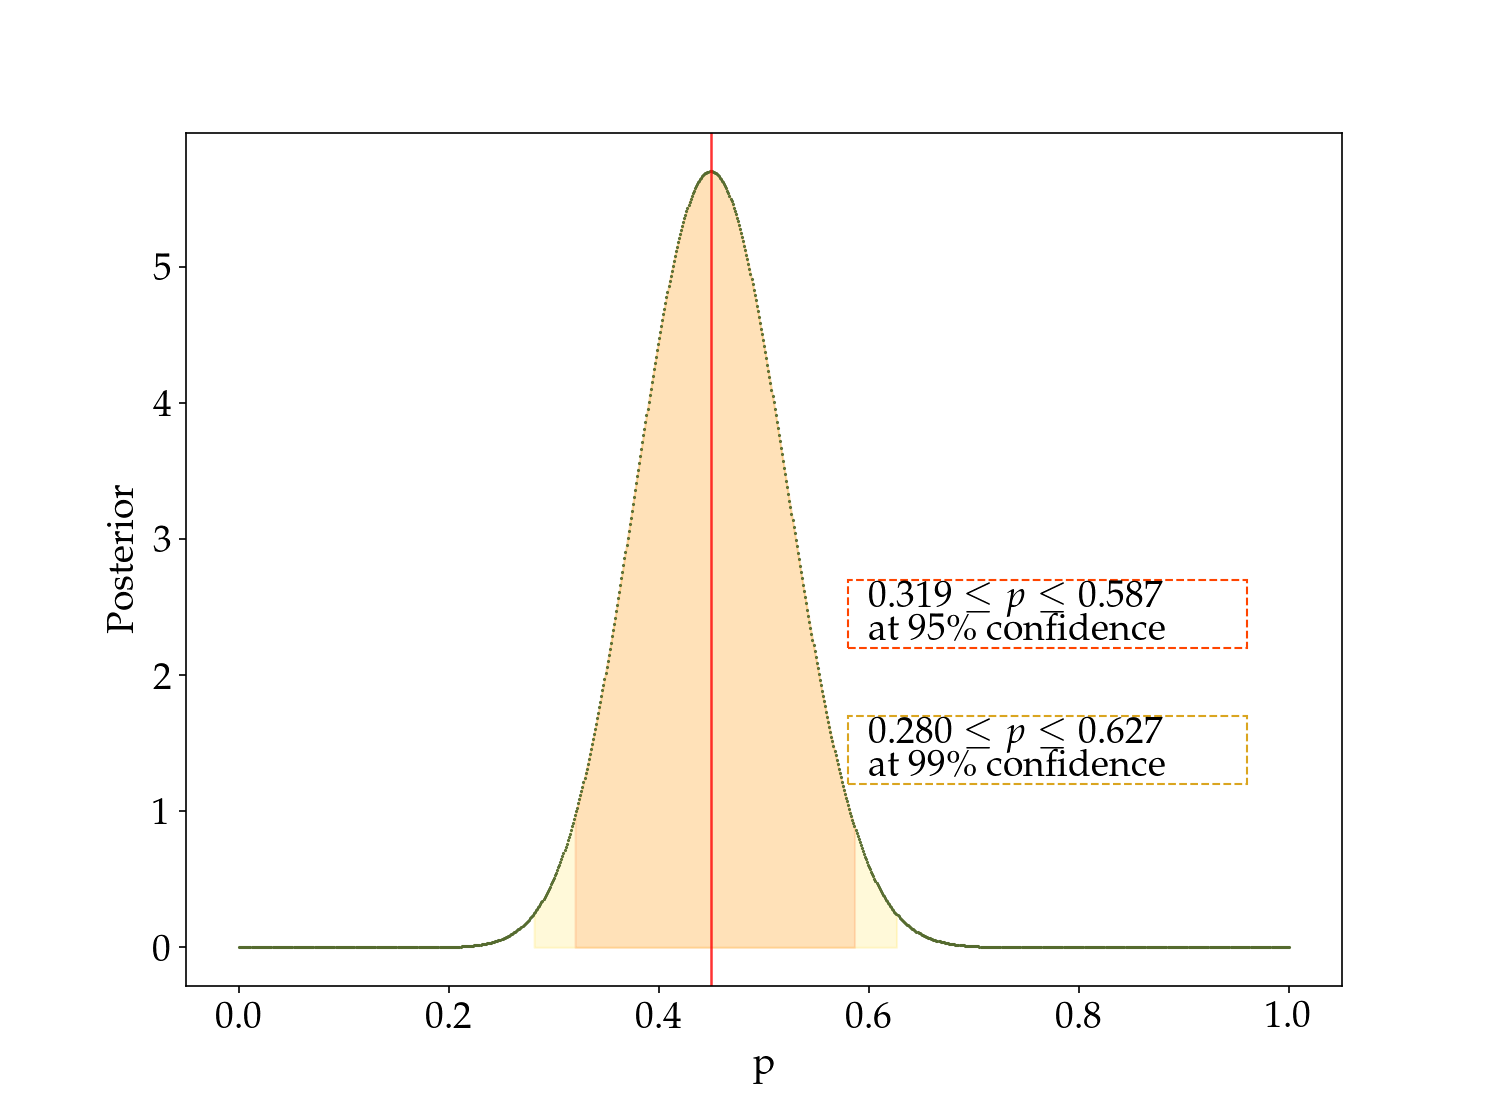

Text(0, 0.5, 'Posterior')

In [116]:
## considering the "yes?" as flashers



fig = plt.figure(figsize = (7*1.4,7))
ax  = fig.subplots(1)
ax.plot(lapaix['p'],lapaix['P(p|D)'], lw =0, marker = 'o', ms = 0.5, color = 'darkolivegreen' )

# 25 flashers

# 95% confidence interval
# 0.319<p<0.587

# 99% CL
# 0.28<p<0.627

ax.fill_between(lapaix['p'],0,lapaix['P(p|D)'], where= (lapaix['p']>0.319) & (lapaix['p']<0.587) ,
                color = 'orangered', alpha = 0.15) # 95% CL


ax.fill_between(lapaix['p'],0,lapaix['P(p|D)'], where= (lapaix['p']>0.280) & (lapaix['p']<0.627) ,
                color = 'gold', alpha = 0.15) # 99% CL


# ax.fill_between(lapaix['p'],0,lapaix['P(p|D)'], where= (lapaix['p']>0.2915) & (lapaix['p']<0.6225) ,
#                 color = 'orangered', alpha = 0.15) # 95% CL


# ax.fill_between(lapaix['p'],0,lapaix['P(p|D)'], where= (lapaix['p']>0.246) & (lapaix['p']<0.673) ,
#                 color = 'gold', alpha = 0.15) # 99% CL 


ax.axvline(0.449,lw = 1.2, color = 'red', alpha = 0.8)
# ax.axvline(0.2915, ymax = 0.2, lw = 1.2, ls = '--', color = 'orangered', alpha = 0.8)
# ax.axvline(0.6225, ymax = 0.25 ,lw = 1.2, ls = '--', color = 'orangered', alpha = 0.8)


# ax.axvline(0.246, ymax = 0.09, lw = 1.2, ls = '--', color = 'goldenrod')
# ax.axvline(0.673, ymax = 0.1 ,lw = 1.2, ls = '--', color = 'goldenrod')



ax.text(0.6,2.5,r'$0.319 \leq p \leq 0.587 $', size = 18)
ax.text(0.6,2.25,'at 95\% confidence', size = 18)

ax.add_patch(patches.Rectangle((0.58, 2.2),0.38,0.5,fill=False, color = 'orangered', ls = '--' )  ) 
ax.add_patch(patches.Rectangle((0.58, 1.2),0.38,0.5,fill=False, color = 'goldenrod', ls = '--'  )  ) 



ax.text(0.6,1.5,r'$0.280 \leq p \leq 0.627 $', size = 18)
ax.text(0.6,1.25,'at 99\% confidence', size = 18)


plt.xlabel('p', size = 18)
plt.ylabel('Posterior', size = 18)

In [117]:
plt.savefig('/Users/r.saturn/PhD/WIP/Full_RISNeII_ZTF1/figures/flasher_statistics/3p5d_subsample_statistics.pdf')

In [25]:
lowerbound = lapaix[lapaix['p']<=0.2915]

p_lb   = lowerbound['p'] 
PpD_lb = lowerbound['P(p|D)']
dpc_l = simps(PpD_lb,p_lb)
dpc_l

0.025046069532479634

In [37]:
upperbound = lapaix[lapaix['p']>=0.6225]

p_ub   = upperbound['p'] 
PpD_ub = upperbound['P(p|D)']
dpc_u = simps(PpD_ub,p_ub)
dpc_u

0.025263446361809737

In [4]:
np.median(table_sample['t_exp'])

-0.475500000175089

In [6]:
np.median(table_sample['fs-fd'])

4.949000000022352

In [8]:
spec_3dsubsamp = table_sample[table_sample['fs-fd']<=3.]

In [9]:
spec_3dsubsamp

name,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,Flasher,t_exp,e_t_exp,jd_t_exp,Fs-Texp,fs-fd
str12,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str69,float64,str11,str4,str4,str12,str4,float64,str11,str4,float64,float64,float64,float64,float64
ZTF18aadsuxd,SN II,2459155.965,2459154.018,2459156.939,SEDm+P60,1.9473,2.9204556,129.533971,31.667916,0.03114,3.2e-05,2004SDSS3.C...0000:,--,--,no,yes,--,yes?,2459163.882,SEDm+P60,no?,-1.94700053069395,0.00704566188768494,2459154.01799947,2.92100053,0.9739999999292195
ZTF18aaqkoyr,SN IIP,2458243.685,2458242.65,2458245.684,DBSP+P200,1.0358565,3.03460143,166.066683,50.0306395,0.023956,1.6e-05,2016SDSSD.C...0000:,--,--,no,yes,notype,yes,2458246.88,SEDm+P60,no,-0.909012620621652,0.198224204768057,2458242.77598738,2.90801262,1.9989999998360872
ZTF18aarpttw,SN II,2458246.822,2458244.849,2458249.0,DIS+APO,1.9726851,4.05030035,247.259916,43.6268251,0.047269107157478,0.000380170349208113,meas,2458248.89965225,DIS+APO,no,yes,--,yes,2458286.0,DBSP+P200,no,-0.0102314131185107,0.00112695802537441,2458246.81176859,2.18823141,2.1779999998398125
ZTF18abckutn,SN IIP,2458289.865,2458289.758,2458290.748,DBSP+P200,0.1074884,0.99028249,237.026897,55.7148553,0.040705,0.000123,1999PASP..111..438F,--,--,yes,yes,notype,yes,2458307.69,DBSP+P200,no,-0.106939135351421,0.0150129029156501,2458289.75806087,0.98993913,0.8829999999143183
ZTF18abcptmt,SN II,2458290.864,2458290.741,2458293.0,SEDm+P60,0.1233217,1.97119441,267.329908,49.412409,0.049000835450176,0.00240764026864016,meas,2458315.87591088,SEDm+P60,yes,yes,--,yes,2458316.0,SEDm+P60,yes,-0.0853328859937964,0.0216112287074645,2458290.77866711,2.22133289,2.1359999999403954
ZTF18abdbysy,SN IIP,2458295.705,2458294.781,2458296.4,ACAM+WHT,0.9234606,1.6180685,233.535367,56.6968577,0.012122,0.000175,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458334.75,DBSP+P200,yes?,-0.98109730156026,0.00193002214850631,2458294.7239027,1.6760973,0.6949999998323619
ZTF18abeajml,SN II,2458303.799,2458302.797,2458304.794,SEDm+P60,1.0019,1.99674769,252.03236,24.3040949,0.036526,8.6e-05,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458331.71,SEDm+P60,yes,-0.0263226731305697,1.33188581425786,2458303.77267733,1.02132267,0.9950000001117587
ZTF18abffyqp,SN IIb,2458307.686,2458306.822,2458307.85,DBSP+P200,0.8641,1.02749037,252.708677,45.3978958,0.031302,0.000157,1999PASP..111..438F,--,--,yes,yes,Sb,yes,2458432.716,LRIS+Keck,yes,-0.432000000029802,0.432000000029802,2458307.254,0.596,0.16399999987334013
ZTF18abgqvwv,SN IIP,2458313.73,2458312.838,2458314.569,ISIS+WHT,0.8915,1.73143,254.316401,31.9631992,0.037726,9.7e-05,2004SDSS3.C...0000:,--,--,no,yes,notype,yes,2458351.82,DBSP+P200,yes?,-1.02018284957884,0.00124945074931354,2458312.70981715,1.85918285,0.8390000001527369


In [10]:
np.unique(spec_3dsubsamp['Flasher'])

no
no?
yes
yes?


In [11]:
noflash_3dsubsamp = spec_3dsubsamp[spec_3dsubsamp['Flasher']=='no']

In [12]:
noflash_3dsubsamp

name,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,Flasher,t_exp,e_t_exp,jd_t_exp,Fs-Texp,fs-fd
str12,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str69,float64,str11,str4,str4,str12,str4,float64,str11,str4,float64,float64,float64,float64,float64
ZTF18aaqkoyr,SN IIP,2458243.685,2458242.65,2458245.684,DBSP+P200,1.0358565,3.03460143,166.066683,50.0306395,0.023956,1.6e-05,2016SDSSD.C...0000:,--,--,no,yes,notype,yes,2458246.88,SEDm+P60,no,-0.909012620621652,0.198224204768057,2458242.77598738,2.90801262,1.9989999998360872
ZTF18aarpttw,SN II,2458246.822,2458244.849,2458249.0,DIS+APO,1.9726851,4.05030035,247.259916,43.6268251,0.047269107157478,0.000380170349208113,meas,2458248.89965225,DIS+APO,no,yes,--,yes,2458286.0,DBSP+P200,no,-0.0102314131185107,0.00112695802537441,2458246.81176859,2.18823141,2.1779999998398125
ZTF18abckutn,SN IIP,2458289.865,2458289.758,2458290.748,DBSP+P200,0.1074884,0.99028249,237.026897,55.7148553,0.040705,0.000123,1999PASP..111..438F,--,--,yes,yes,notype,yes,2458307.69,DBSP+P200,no,-0.106939135351421,0.0150129029156501,2458289.75806087,0.98993913,0.8829999999143183
ZTF18abojpnr,SN IIb,2458351.659,2458350.934,2458351.897,SEDm+P60,0.7244907,0.9628849,297.487196,59.5927746,0.0374689856869423,0.000262024640726621,meas,2458638.05098,DBSP+P200,no,yes,--,yes?,2458374.0,DBSP+P200,no,-0.723954908744263,0.00252606655362516,2458350.93504509,0.96195491,0.23799999989569187
ZTF18absldfl,SN II,2458363.88,2458362.97,2458365.79,SEDm+P60,0.9129,2.8234457,33.5997569,30.811935,0.0355053945330934,0.00675050900713061,meas,2458384.9447605,SEDm+P60,no,yes,--,yes?,2458384.945,SEDm+P60,no,-0.915010892471355,0.0086938968838164,2458362.96498911,2.82501089,1.9100000001490116
ZTF19aapygmq,SN II,2458585.756,2458584.871,2458586.825,SEDm+P60,0.8849,1.953576,210.421485,38.5103291,0.0368,0.000168,2005SDSS4.C...0000:,--,--,no,yes,notype,yes,2458597.84,DBSP+P200,no,-0.978006893520954,4.03595575039266,2458584.77799311,2.04700689,1.0690000001341105
ZTF19aarfkch,SN IIb,2458592.68,2458591.92,2458593.848,SEDm+P60,0.7607,1.924202,221.131644,70.4559895,0.0508322335114851,0.00157301047700028,meas,2458666.881,LRIS+Keck,no,yes,--,no?,2458666.881,LRIS+Keck,no,-0.0150330920002656,0.0130166850242295,2458592.66496691,1.18303309,1.16800000006333
ZTF19aatqzim,SN II,2458606.691,2458601.782,2458607.906,SEDm+P60,4.9085996,6.123721,195.955635,38.2891552,0.050123,0.000181,2007SDSS6.C...0000:,--,--,yes,yes,notype,yes,2458675.406,ACAM+WHT,no,-1.71513818627058,0.421538378740285,2458604.97586181,2.93013819,1.2149999998509884
ZTF19aatqzrb,SN II,2458606.799,2458605.888,2458607.87,SEDm+P60,0.9103588,1.9821106,221.652383,56.2342197,0.038136,9e-05,1988AJ.....95.1602S,--,--,no,yes,notype,no?,2458616.902,DBSP+P200,no,-0.0122546592917293,0.00256560355581138,2458606.78674534,1.08325466,1.0709999999962747


In [13]:
np.unique(spec_3dsubsamp['UV'])

no
no?
yes


In [14]:
spec_3dsubsamp[spec_3dsubsamp['UV']=='no']

name,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,Flasher,t_exp,e_t_exp,jd_t_exp,Fs-Texp,fs-fd
str12,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str69,float64,str11,str4,str4,str12,str4,float64,str11,str4,float64,float64,float64,float64,float64
ZTF18aadsuxd,SN II,2459155.965,2459154.018,2459156.939,SEDm+P60,1.9473,2.9204556,129.533971,31.667916,0.03114,3.2e-05,2004SDSS3.C...0000:,--,--,no,yes,--,yes?,2459163.882,SEDm+P60,no?,-1.94700053069395,0.00704566188768494,2459154.01799947,2.92100053,0.9739999999292195
ZTF18aaqkoyr,SN IIP,2458243.685,2458242.65,2458245.684,DBSP+P200,1.0358565,3.03460143,166.066683,50.0306395,0.023956,1.6e-05,2016SDSSD.C...0000:,--,--,no,yes,notype,yes,2458246.88,SEDm+P60,no,-0.909012620621652,0.198224204768057,2458242.77598738,2.90801262,1.9989999998360872
ZTF18aarpttw,SN II,2458246.822,2458244.849,2458249.0,DIS+APO,1.9726851,4.05030035,247.259916,43.6268251,0.047269107157478,0.000380170349208113,meas,2458248.89965225,DIS+APO,no,yes,--,yes,2458286.0,DBSP+P200,no,-0.0102314131185107,0.00112695802537441,2458246.81176859,2.18823141,2.1779999998398125
ZTF18abgqvwv,SN IIP,2458313.73,2458312.838,2458314.569,ISIS+WHT,0.8915,1.73143,254.316401,31.9631992,0.037726,9.7e-05,2004SDSS3.C...0000:,--,--,no,yes,notype,yes,2458351.82,DBSP+P200,yes?,-1.02018284957884,0.00124945074931354,2458312.70981715,1.85918285,0.8390000001527369
ZTF18abojpnr,SN IIb,2458351.659,2458350.934,2458351.897,SEDm+P60,0.7244907,0.9628849,297.487196,59.5927746,0.0374689856869423,0.000262024640726621,meas,2458638.05098,DBSP+P200,no,yes,--,yes?,2458374.0,DBSP+P200,no,-0.723954908744263,0.00252606655362516,2458350.93504509,0.96195491,0.23799999989569187
ZTF18absldfl,SN II,2458363.88,2458362.97,2458365.79,SEDm+P60,0.9129,2.8234457,33.5997569,30.811935,0.0355053945330934,0.00675050900713061,meas,2458384.9447605,SEDm+P60,no,yes,--,yes?,2458384.945,SEDm+P60,no,-0.915010892471355,0.0086938968838164,2458362.96498911,2.82501089,1.9100000001490116
ZTF18abvvmdf,SN II,2458374.634,2458373.738,2458376.619,SEDm+P60,0.8964931,2.8816414,249.197462,55.7357948,0.029597,0.000183,1999PASP..111..438F,--,--,no,yes,notype,yes,2458416.634,SEDm+P60,yes,-0.896420165759764,0.00298557932712099,2458373.73757983,2.88142017,1.9849999998696148
ZTF18abwlsoi,SN II,2458377.63,2458376.74,2458377.751,SEDm+P60,0.8952,1.0131723,261.897614,71.530251,0.0537647994379915,0.00731871055282226,meas,2458443.6,SEDm+P60,no,yes,--,yes,2458443.6,SEDm+P60,yes,-0.0214623545275853,0.0026656234036649,2458377.60853765,0.14246235,0.12100000027567148
ZTF18acqwdla,SN II,2458443.874,2458443.789,2458443.937,SEDm+P60,0.0855324,0.1481347,106.472662,12.8929375,0.0262121409990712,0.00473929148831813,meas,2458616.4561574,EFOSC2+NTT,no,yes,--,yes,2458616.4561574,EFOSC2+NTT,no?,-0.0424999999813736,0.0424999999813736,2458443.8315,0.1055,0.06300000008195639


In [6]:
subsamp_10d = table_infants[table_infants['Fs-Texp']<=10]

In [7]:
subsamp_10d

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g
str12,str10,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str69,float64,str11,str4,str4,str12,str4,float64,str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18aadsuxd,SN II,no,SN II,2459155.965,2459154.018,2459156.939,SEDm+P60,1.9473,2.9204556,129.533971,31.667916,0.03114,3.2e-05,2004SDSS3.C...0000:,--,--,no,yes,--,yes?,2459163.882,SEDm+P60,-1.947000531,0.007045661888,2459154.018,2.92100053,-18.87616004634321,0.009411289147476442,17.275924560467757,1.0318745015716895,-19.01666988979831,0.01815331876476588,13.73982016524336,0.5498689150688045,0.03949195782351208,0.0016698698982383943,0.04223818320891067,0.0019924162251121653
ZTF18aaqkoyr,SN II,no,SN IIP,2458243.685,2458242.65,2458245.684,DBSP+P200,1.0358565,3.03460143,166.066683,50.0306395,0.023956,1.6e-05,2016SDSSD.C...0000:,--,--,no,yes,notype,yes,2458246.88,SEDm+P60,-0.9090126206,0.1982242048,2458242.776,2.90801262,-17.345983780206705,0.0037485696643061294,17.635057666448567,0.7831879602660898,-17.34481290626891,0.003969969781832504,6.844667835030683,0.29828813960336764,0.00829260809206087,0.001571683373578605,0.026508087826448524,0.001201953768752765
ZTF18aarpttw,SN II-bump,no,SN II,2458246.822,2458244.849,2458249.0,DIS+APO,1.9726851,4.05030035,247.259916,43.6268251,0.04726910716,0.0003801703492,meas,2458248.9,DIS+APO,no,yes,--,yes,2458286.0,DBSP+P200,-0.01023141312,0.001126958025,2458246.812,2.18823141,-17.95149602644325,0.020632667603988228,8.066497964988958,0.7782702642145058,-17.94899599651717,0.01919722584691977,5.644725181571605,0.09262100790241808,99.0,99.0,99.0,99.0
ZTF18aatlfus,SN II,no,SN IIP,2458249.858,2458247.941,2458255.824,SEDm+P60,1.9171875,7.88367828,257.176414,28.5206041,0.045089,7e-06,2016SDSSD.C...0000:,--,--,no,yes,notype,yes?,2458256.81,SEDm+P60,-0.9584999997,0.9584999999,2458248.9,6.9245,-18.43491354019985,0.0044253010643659765,6.274041648483513,1.009860526965394,-18.494639435762195,0.008902402352272477,4.787776886446052,0.9809863969095557,0.030063443865656066,0.0018975469012159976,0.05326100665548559,0.0024020250257157615
ZTF18aawyjjq,SN II,no,SN II,2458262.906,2458261.947,2458272.0,SEDm+P60,0.9596759,9.93642128,263.058847,36.0739975,0.04140959435,0.0004500167575,meas,2458277.974,DBSP+P200,no,yes,--,yes,2458278.0,DBSP+P200,-0.04856539267,0.02394929273,2458262.857,9.14256539,-17.746169048440674,0.02361866976125201,17.7276139133917,0.15927213799410897,-17.75462992013677,0.026542590784192785,10.421350563271961,0.5877205519303136,0.01218469811925317,0.00178762544456688,0.036795967403406626,0.004531869658415236
ZTF18aaymsbe,SN IIb,no,SN II,2458276.806,2458274.884,2458286.0,DBSP+P200,1.9221296,11.0168918,243.77589,62.3191198,0.05606790813,0.0007006381409,meas,2458311.991,LRIS+Keck,no,no?,--,yes,2458311.991,LRIS+Keck,-0.166394587,0.004665201929,2458276.64,9.36039459,-16.965458170325178,0.028142818045544284,2.899518833336791,0.14270137157034407,-17.06141284963369,0.030225843463491043,2.383002366762647,0.16415264534316312,99.0,99.0,99.0,99.0
ZTF18abckutn,SN II,no,SN IIP,2458289.865,2458289.758,2458290.748,DBSP+P200,0.1074884,0.99028249,237.026897,55.7148553,0.040705,0.000123,1999PASP..111..438F,--,--,yes,yes,notype,yes,2458307.69,DBSP+P200,-0.1069391354,0.01501290292,2458289.758,0.98993913,-17.489833262081575,0.00961684735079223,16.19256326104363,0.29419405502410373,-17.511123656906882,0.014952041887626596,9.522573088435623,0.6234607506231766,0.008576205724715288,0.001859420359141762,0.029699745465459428,0.0059168450

## Check K correction

In [51]:
SNII = table_infants[table_infants['rach-classification']=='SN II']
twodaysub = SNII[SNII['Fs-Texp']<=2.] 

In [52]:
maxiz = twodaysub[twodaysub['redshift']==max(twodaysub['redshift'])]

In [53]:
maxiz

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
str12,str10,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str69,float64,str11,str4,str4,str12,str4,float64,str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF20abfcdkj,SN II,no,SN II,2459013.75,2459012.82,2459015.0,GMOS+Gemini,0.9342,2.26059114,281.793965,60.4968018,0.05791714076,0.01083013884,meas,2459032.607,ALFOSC+NOT,yes,yes,--,yes,2459033.0,ALFOSC+NOT,-0.04948199798,0.007785345089,2459013.701,1.299482,-18.133900357482435,0.40617030183954944,15.059195936150012,0.7177939336865377,-18.08678188554342,0.40637722108978397,10.900480613206733,0.8449487500290667,0.00970984174913531,0.002348876267753915,0.025832792517778237,0.004240091807650365,11.62110115953528,6.141094110446522


In [47]:
# spec_highz = ascii.read('/Users/r.saturn/Dropbox (Weizmann Institute)/PhD/WIP/Full_RISNeII_ZTF1/forced_photometry/case_by_case/kcorrection_spec/ZTF19abmouqp_20190906_P200_v1.ascii')

In [58]:
flash = table_infants[(table_infants['Flasher']=='yes')|(table_infants['Flasher']=='yes?')]
# twodaysub = flash[flash['Fs-Texp']<=2.] 

In [59]:
maxizflash = flash[flash['redshift']==max(flash['redshift'])]

In [60]:
maxizflash

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
str12,str10,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str69,float64,str11,str4,str4,str12,str4,float64,str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF19abjioie,SN II,yes,SN II,2458692.708,2458691.808,2458702.803,SEDm+P60,0.9774074,10.995,259.203094,39.1480677,0.08675886459,0.001262030149,meas,2458705.677,DBSP+P200,no,yes,--,no,2458706.0,DBSP+P200,-1.309339883,0.2134499266,2458691.398,11.405,-19.262580395462706,0.031964913039994214,12.80654285091936,0.2929850653248519,-19.452637059411657,0.03251767228723967,8.494305631160792,0.2513705241927329,0.03763990814947937,0.004615224399654543,0.056241855799056766,0.0039027215713151216,10.808463606831,7.618172853835975
